In [137]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Question To Be Answered: Do the genres represented on streaming services reflect audience interests?

The first section of data below identifies the highest-rated titles for each streaming service's content libraries (seperated by "Movies" and "Shows"). It then grabs the genres which the respective titles fall into, and plots them on a bar graph depicting the % of Titles x Genre. 

In [138]:
prime_MG = pd.read_csv("../Cleanish Data/By Genre/Prime Movies(G).csv")
prime_TVG = pd.read_csv("../Cleanish Data/By Genre/Prime TV(G).csv")
netflix_MG = pd.read_csv("../Cleanish Data/By Genre/Netflix Movies(G).csv")
netflix_TVG = pd.read_csv("../Cleanish Data/By Genre/Netflix TV(G).csv")
disney_MG = pd.read_csv("../Cleanish Data/By Genre/Disney Movies(G).csv")
disney_TVG = pd.read_csv("../Cleanish Data/By Genre/Disney TV(G).csv")

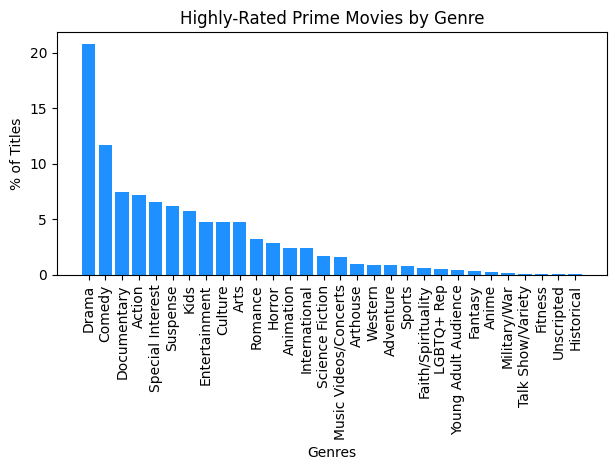

In [139]:
popular_PM=prime_MG.copy()
popular_PM=popular_PM.loc[prime_MG["Vote Average"]>=7]
popular_PM["Genre"]= popular_PM["Genre"].str.replace(" ","")
PMGenres=popular_PM["Genre"].value_counts()
PMGenres
#Total- 2613

PMOOT = []
for count in PMGenres:
    PMOOT.append((count/2613)*100)
    
x_Axis= np.arange(len(PMGenres))
plt.bar(x_Axis, PMOOT, color="dodgerblue",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Drama","Comedy","Documentary","Action","Special Interest","Suspense","Kids","Entertainment","Culture","Arts","Romance","Horror","Animation","International","Science Fiction","Music Videos/Concerts","Arthouse","Western","Adventure","Sports","Faith/Spirituality","LGBTQ+ Rep","Young Adult Audience","Fantasy","Anime","Military/War","Talk Show/Variety","Fitness","Unscripted","Historical"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Prime Movies by Genre")
#To resolve the issue of the X-axis labels being cut off when the image is saved, the following piece of code was sourced from docs.kanaries.net.
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/PM.png")
plt.show()

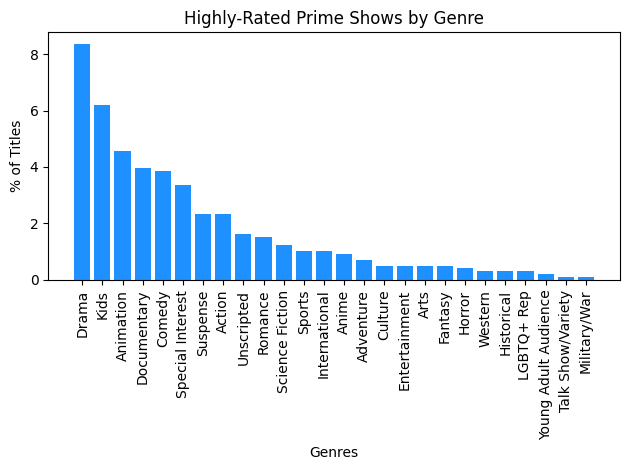

In [140]:
popular_PTV=prime_TVG.copy()
popular_PTV["Genre"]= popular_PTV["Genre"].str.replace(" ","")
popular_PTVG=popular_PTV.loc[(popular_PTV["Vote Average"]>=7)&(popular_PTV["Genre"]!="TVShows")]
PTVGenres=popular_PTVG["Genre"].value_counts()
PTVGenres
#Total- 982

PTVOOT = []
for count in PTVGenres:
    PTVOOT.append((count/982)*100)
    
x_Axis= np.arange(len(PTVGenres))
plt.bar(x_Axis, PTVOOT, color= "dodgerblue",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Drama","Kids","Animation","Documentary","Comedy","Special Interest","Suspense","Action","Unscripted","Romance","Science Fiction","Sports","International","Anime","Adventure","Culture","Entertainment","Arts","Fantasy","Horror","Western","Historical","LGBTQ+ Rep","Young Adult Audience","Talk Show/Variety","Military/War"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Prime Shows by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/PTV.png")
plt.show()

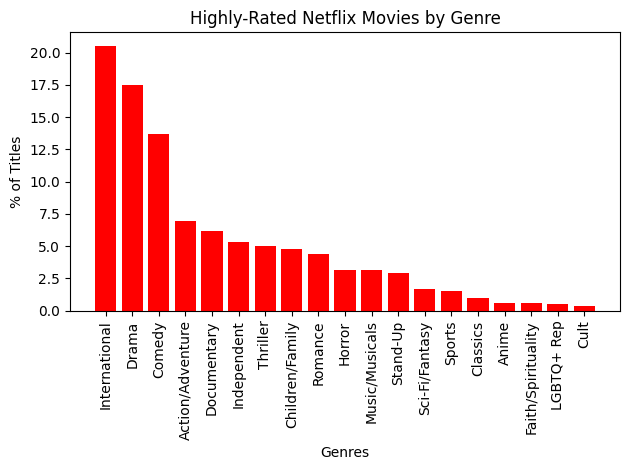

In [141]:
popular_NM=netflix_MG.copy()
popular_NM=popular_NM.loc[(netflix_MG["Vote Average"]>=7) &(netflix_MG["Genre"]!="Movies")]
popular_NM["Genre"]= popular_NM["Genre"].str.replace(" ","")
NMGenres=popular_NM["Genre"].value_counts()
NMGenres
#Total- 2108

NMOOT = []
for count in NMGenres:
    NMOOT.append((count/2108)*100)

x_Axis= np.arange(len(NMGenres))
plt.bar(x_Axis, NMOOT, color="red",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["International","Drama","Comedy","Action/Adventure","Documentary","Independent","Thriller","Children/Family","Romance","Horror","Music/Musicals","Stand-Up","Sci-Fi/Fantasy","Sports","Classics","Anime","Faith/Spirituality","LGBTQ+ Rep","Cult"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Netflix Movies by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/NM.png")
plt.show()

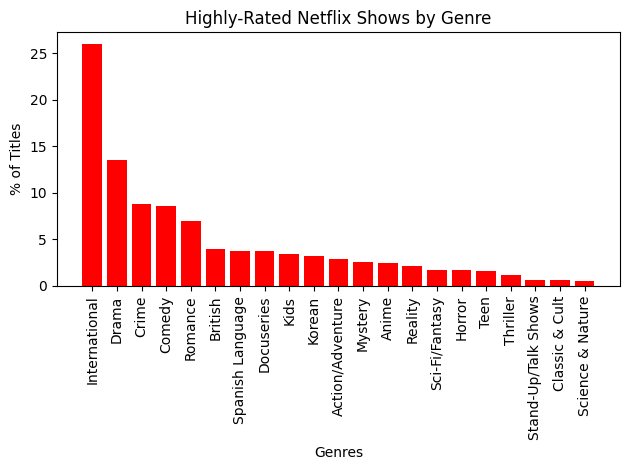

In [142]:
popular_NTV=netflix_TVG.copy()
popular_NTV=popular_NTV.loc[(popular_NTV["Vote Average"]>=7) & (popular_NTV["Genre"]!="TV Shows")]
popular_NTV["Genre"]= popular_NTV["Genre"].str.replace(" ","")
NTVGenres=popular_NTV["Genre"].value_counts()
NTVGenres
#Total- 8347

NTVOOT = []
for count in NTVGenres:
    NTVOOT.append((count/8347)*100)

x_Axis= np.arange(len(NTVGenres))
plt.bar(x_Axis, NTVOOT, color="red",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["International","Drama","Crime","Comedy","Romance","British","Spanish Language","Docuseries","Kids","Korean","Action/Adventure","Mystery","Anime","Reality","Sci-Fi/Fantasy","Horror","Teen","Thriller","Stand-Up/Talk Shows","Classic & Cult","Science & Nature"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Netflix Shows by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/NTV.png")
plt.show()

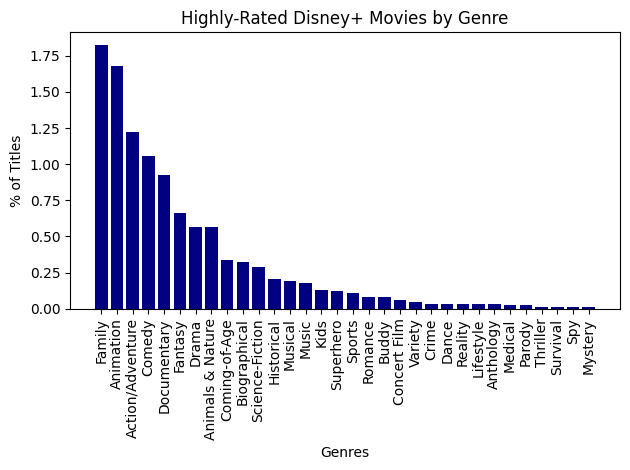

In [143]:
popular_DM=disney_MG.copy()
popular_DM=popular_DM.loc[(disney_MG["Vote Average"]>=7) & (disney_MG["Genre"] != "Movies")]
popular_DM["Genre"]= popular_DM["Genre"].str.replace(" ","")
DMGenres=popular_DM["Genre"].value_counts()
DMGenres
#Total- 911

DMOOT = []
for count in DMGenres:
    DMOOT.append((count/8347)*100)
    
x_Axis= np.arange(len(DMGenres))
plt.bar(x_Axis, DMOOT, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Family","Animation","Action/Adventure","Comedy","Documentary","Fantasy","Drama","Animals & Nature","Coming-of-Age","Biographical","Science-Fiction","Historical","Musical","Music","Kids","Superhero","Sports","Romance","Buddy","Concert Film","Variety","Crime","Dance","Reality","Lifestyle","Anthology","Medical","Parody","Thriller","Survival","Spy","Mystery"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Disney+ Movies by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/DM.png")
plt.show()

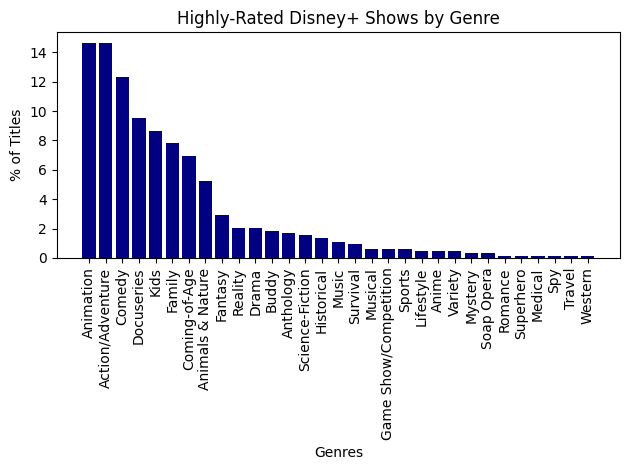

In [144]:
popular_DTV=disney_TVG.copy()
popular_DTV=popular_DTV.loc[(popular_DTV["Vote Average"]>=7) & (popular_DTV["Genre"]!="Series")]
popular_DTV["Genre"]= popular_DTV["Genre"].str.replace(" ","")
DTVGenres=popular_DTV["Genre"].value_counts()
DTVGenres
#Total- 649

DTVOOT = []
for count in DTVGenres:
    DTVOOT.append((count/649)*100)

x_Axis= np.arange(len(DTVGenres))
plt.bar(x_Axis, DTVOOT, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["Animation","Action/Adventure","Comedy","Docuseries","Kids","Family","Coming-of-Age","Animals & Nature","Fantasy","Reality","Drama","Buddy","Anthology","Science-Fiction","Historical","Music","Survival","Musical","Game Show/Competition","Sports","Lifestyle","Anime","Variety","Mystery","Soap Opera","Romance","Superhero","Medical","Spy","Travel","Western"], rotation="vertical")
plt.xlabel("Genres")
plt.ylabel("% of Titles")
plt.title("Highly-Rated Disney+ Shows by Genre")
plt.tight_layout()
plt.savefig("../Charts/Genre Breakdowns/DTV.png")
plt.show()

## Question To Be Answered: Does Netflix have a sustainable competitive advantage in pursuing international content/production?

The following section of data identifies the highest-rated titles for each streaming service's content libraries (for the most part seperated by "Movies" and "Shows"). It then grabs roughly the top 9 countries of origin for Netflix for each category, and populates a pie chart with the ratio of popular titles versus the total titles from each country. Additional graphics were produced for Prime (when possible) and Disney to assess whether they posed any significant threat. 

In [145]:
prime_TVC = pd.read_csv("../Cleanish Data/Prime TV.csv")
netflix_MC = pd.read_csv("../Cleanish Data/By Country/Netflix Movies(C).csv")
netflix_TVC = pd.read_csv("../Cleanish Data/By Country/Netflix TV(C).csv")
disney_MC = pd.read_csv("../Cleanish Data/By Country/Disney Movies(C).csv")
disney_TVC = pd.read_csv("../Cleanish Data/By Country/Disney TV(C).csv")

C:\Users\tobia\AppData\Local\Temp\ipykernel_13796\4174085141.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Countries.append(PTVCountries[i]/PTVTotals[i])


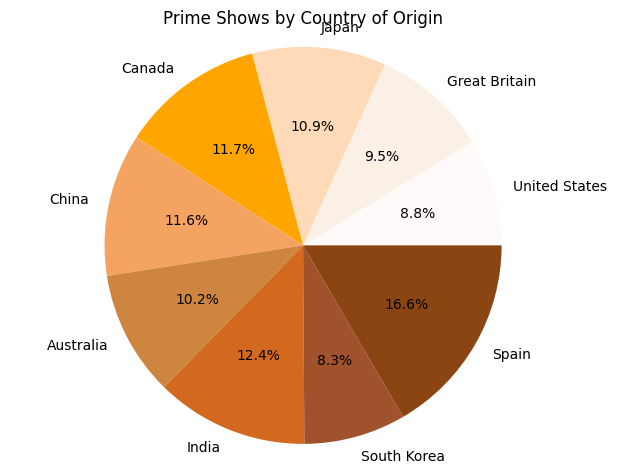

In [146]:
popular_PTV=prime_TVC.copy()
popular_PTV=popular_PTV.loc[(prime_TVC["Vote Average"]>=7) & (prime_TVC["Country"] != "Unknown")]
PTVCountries=popular_PTV["Country"].value_counts()
PTVCountries

#Grabs the total number of titles originating from each country to calculate ratio.
AllPTV = prime_TVC.copy()
AllPTV["Country"]= AllPTV["Country"].str.replace(" ","")
AllPTV = AllPTV.loc[(AllPTV["Country"]!= "Unknown")]
AllPTV["Country"].value_counts()
PTVTotals = [177,104,48,43,40,19,14,14,7]

#Grabs the countries with significant/notable values to declutter graphic.
Countries=[]
for i in range (0,9):
    Countries.append(PTVCountries[i]/PTVTotals[i])
    
Names = ["United States","Great Britain","Japan","Canada","China","Australia","India","South Korea","Spain"]#,"Denmark","Mexico","France","Brazil"]#,"Saudi Arabia","Austria","Ireland","Thailand","Portugal","Russia","Italy","Philippines"]
Colors = ["snow","linen","peachpuff","orange","sandybrown","peru","chocolate","sienna","saddlebrown"]
plt.pie(Countries,labels=Names, colors=Colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Prime Shows by Country of Origin")
plt.tight_layout()
plt.savefig("../Charts/Country ROI/PTV.png")
plt.show()

C:\Users\tobia\AppData\Local\Temp\ipykernel_13796\1711600872.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Countries.append(PTVCountries[i]/MTotals[i])


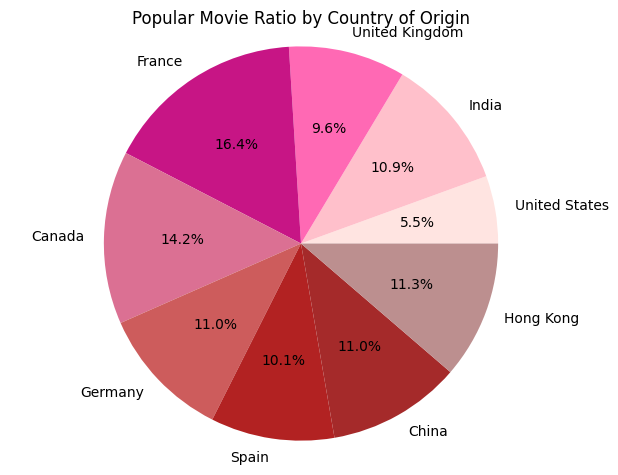

In [147]:
popular_NM=netflix_MC.copy()
popular_NM=popular_NM.loc[netflix_MC["Vote Average"]>=7]
popular_NM["Country"]= popular_NM["Country"].str.replace(" ","")
NMCountries=popular_NM["Country"].value_counts()
NMCountries

AllM = netflix_MC.copy()
AllM["Country"]= AllM["Country"].str.replace(" ","")
AllM = AllM.loc[(AllM["Country"]!= "Unknown")]
AllM["Country"].value_counts()
MTotals = [1740,567,340,191,204,110,107,66,64]

Countries=[]
for i in range (0,9):
    Countries.append(PTVCountries[i]/MTotals[i])
    
Names = ["United States","India","United Kingdom","France","Canada","Germany","Spain","China","Hong Kong"]
Colors= ["mistyrose","pink","hotpink","mediumvioletred","palevioletred","indianred","firebrick","brown","rosybrown"]
plt.pie(Countries,labels=Names,colors=Colors, autopct="%1.1f%%")
plt.axis("equal")
plt.title("Popular Movie Ratio by Country of Origin")
plt.tight_layout()
plt.savefig("../Charts/Country ROI/NM.png")
plt.show()

C:\Users\tobia\AppData\Local\Temp\ipykernel_13796\3884493705.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Countries.append(PTVCountries[i]/TVTotals[i])


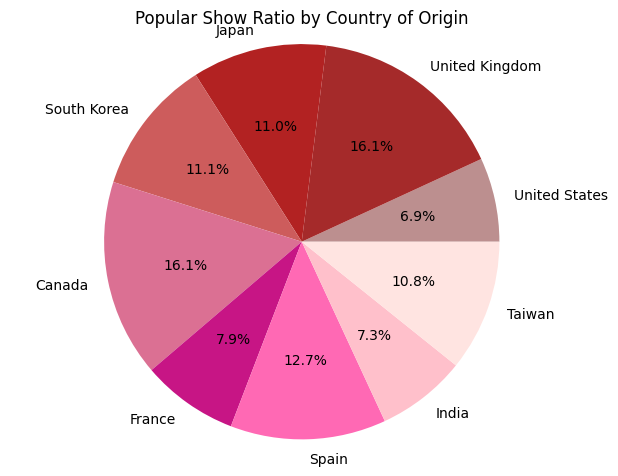

In [148]:
popular_NTV=netflix_TVC.copy()
popular_NTV=popular_NTV.loc[(netflix_TVC["Vote Average"]>=7) & (netflix_TVC["Country"] != "Unknown") & (netflix_TVC["Country"] != "US")]
popular_NTV["Country"]= popular_NTV["Country"].str.replace(" ","")
NTVCountries=popular_NTV["Country"].value_counts()
NTVCountries

AllTV = netflix_TVC.copy()
AllTV["Country"]= AllTV["Country"].str.replace(" ","")
AllTV = AllTV.loc[(AllTV["Country"]!= "Unknown")]
AllTV["Country"].value_counts()
TVTotals = [313,85,66,63,40,34,19,22,15]

Countries=[]
for i in range (0,9):
    Countries.append(PTVCountries[i]/TVTotals[i])
    
Names = ["United States","United Kingdom","Japan","South Korea","Canada","France","Spain","India","Taiwan"]
Colors= ["rosybrown","brown","firebrick","indianred","palevioletred","mediumvioletred","hotpink","pink","mistyrose"]#mistyrose","pink","hotpink","mediumvioletred","palevioletred","indianred","firebrick","brown","rosybrown"]
plt.pie(Countries,labels=Names, colors=Colors,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Popular Show Ratio by Country of Origin")
plt.tight_layout()
plt.savefig("../Charts/Country ROI/NM.png")
plt.show()



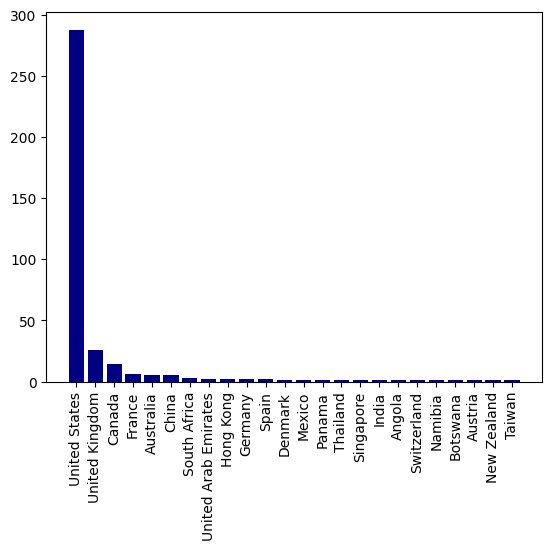

In [149]:
popular_DM=disney_MC.copy()
popular_DM=popular_DM.loc[(disney_MC["Vote Average"]>=7) & (disney_MC["Country"]!= "Unknown")]
popular_DM["Country"]= popular_DM["Country"].str.replace(" ","")
DMCountries=popular_DM["Country"].value_counts()
DMCountries

x_Axis= np.arange(len(DMCountries))
plt.bar(x_Axis, DMCountries, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["United States","United Kingdom","Canada","France","Australia","China","South Africa","United Arab Emirates","Hong Kong","Germany","Spain","Denmark","Mexico","Panama","Thailand","Singapore","India","Angola","Switzerland","Namibia","Botswana","Austria","New Zealand","Taiwan"], rotation="vertical")
plt.show()

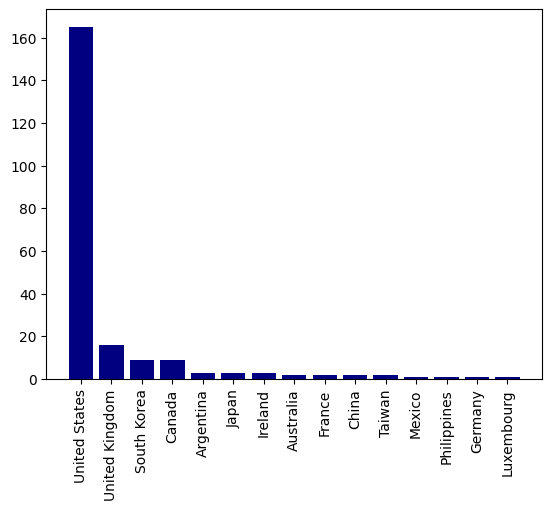

In [150]:
popular_DTV=disney_TVC.copy()
popular_DTV=popular_DTV.loc[(disney_TVC["Vote Average"]>=7) & (disney_TVC["Country"] != "Unknown")]
popular_DTV["Country"]= popular_DTV["Country"].str.replace(" ","")
DTVCountries=popular_DTV["Country"].value_counts()
DTVCountries

x_Axis= np.arange(len(DTVCountries))
plt.bar(x_Axis, DTVCountries, color="navy",align="center")
tickLocations = [value for value in x_Axis]
plt.xticks(tickLocations,["United States","United Kingdom","South Korea","Canada","Argentina","Japan","Ireland","Australia","France","China","Taiwan","Mexico","Philippines","Germany","Luxembourg"], rotation="vertical")
plt.show()

## Question To Be Answered: Is there a correlation between the number of seasons of a show and its average TMDB Score? If not, in general, are platforms effective in identifiying which shows to extend and which to canel relating to audience interests?

The following section of data aims to answer the foregoing question. Upon realising, no correlation existed, bar charts were produced to show the distribution of "# of Seasons" of both the highest and lowest rated to determine whether streaming services are aware of general audience sentiment regarding specific content.

In [151]:
prime_TV = pd.read_csv("../Cleanish Data/Prime TV.csv")
netflix_TV = pd.read_csv("../Cleanish Data/Netflix TV.csv")
disney_TV = pd.read_csv("../Cleanish Data/Disney TV.csv")

The r-value is: 0.0017482089567730699.


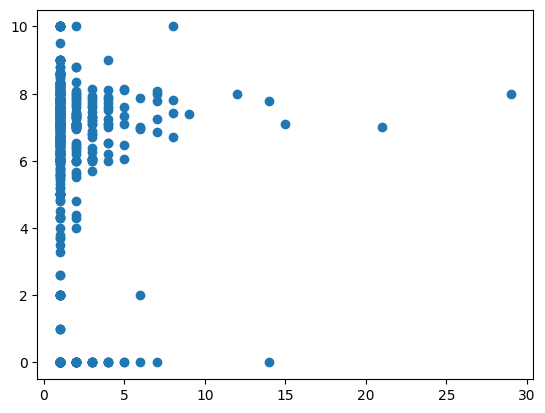

In [152]:
#Is there a correlation between the number of seasons of a show and its average TMDB Score? NO
popular_PTVD= prime_TV.copy()
popular_PTVD["Duration"]= popular_PTVD["Duration"].str.replace("Seasons","")
popular_PTVD["Duration"]= popular_PTVD["Duration"].str.replace("Season","")

C = popular_PTVD.copy()
C["Duration"]= pd.to_numeric(C["Duration"])

plt.scatter(C["Duration"],C["Vote Average"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(C["Duration"], C["Vote Average"])
print(f"The r-value is: {rvalue**2}.")

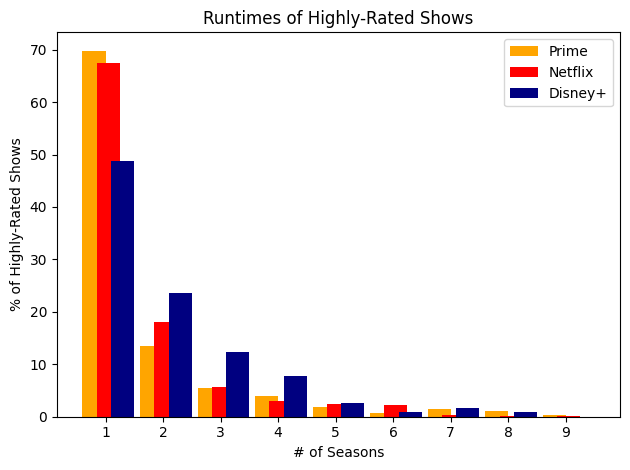

In [153]:
#Distribution of # of seasons compared to highly-rated shows across all platforms.
popular_PTVD = popular_PTVD.loc[(popular_PTVD["Vote Average"]>=7)] 
PTV_Durations=popular_PTVD["Duration"].value_counts()
PTV_Durations
#Total- 275

popular_NTVD= netflix_TV.copy()
popular_NTVD = popular_NTVD.loc[(popular_NTVD["Vote Average"]>=7)]
NTV_Durations=popular_NTVD["Duration"].value_counts()
NTV_Durations
#Total- 543

popular_DTVD= disney_TV.copy()
popular_DTVD = popular_DTVD.loc[(popular_DTVD["Vote Average"]>=7)]
DTV_Durations=popular_DTVD["Duration"].value_counts()
DTV_Durations
#Total- 234

X=[1,2,3,4,5,6,7,8,9]
Prime=[(192/275)*100,(37/275)*100,(15/275)*100,(11/275)*100,(5/275)*100,(2/275)*100,(4/275)*100,(3/275)*100,(1/275)*100]
Netflix = [(366/543)*100,(98/543)*100,(31/543)*100,(16/543)*100,(13/543)*100,(12/543)*100,(2/543)*100,(1/543)*100,(1/543)*100]
Disney =[(114/234)*100,(55/234)*100,(29/234)*100,(18/234)*100,(6/234)*100,(2/234)*100,(4/234)*100,(2/234)*100,0]
x_Axis=np.arange(len(X))
plt.bar(x_Axis,Prime,0.4,label="Prime", color="orange",align="edge")
plt.bar(x_Axis+0.25,Netflix,0.4,label="Netflix", color="red",align="edge")
plt.bar(x_Axis+(0.25*2),Disney,0.4,label="Disney+", color="navy",align="edge")
tickLocations = [value+0.4 for value in x_Axis]
plt.xticks(tickLocations,X)
plt.xlabel("# of Seasons")
plt.ylabel("% of Highly-Rated Shows")
plt.title("Runtimes of Highly-Rated Shows")
plt.legend()
plt.tight_layout()
plt.savefig("../Charts/Runtimes (H).png")
plt.show()

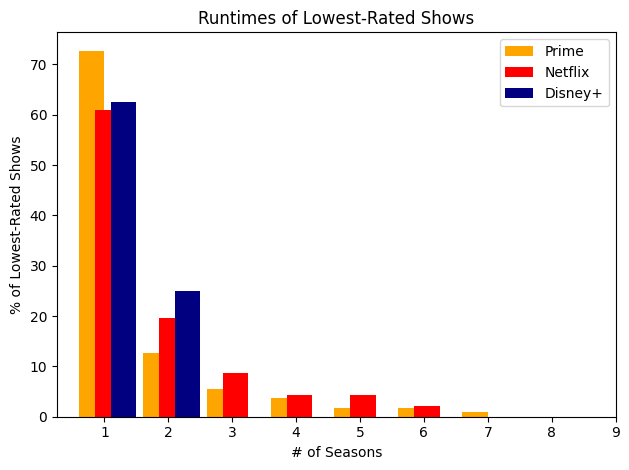

In [154]:
#Distribution of # of seasons compared to lowest-rated shows across all platforms.
unpopular_PTVD = prime_TV.copy()
unpopular_PTVD = unpopular_PTVD.loc[(unpopular_PTVD["Vote Average"]<=3)] 
UPTV_Durations=unpopular_PTVD["Duration"].value_counts()
UPTV_Durations
#Total- 110

unpopular_NTVD = netflix_TV.copy()
unpopular_NTVD = unpopular_NTVD.loc[(unpopular_NTVD["Vote Average"]<=3)] 
NTV_Durations=unpopular_NTVD["Duration"].value_counts()
NTV_Durations

#Total- 46

unpopular_DTVD = disney_TV.copy()
unpopular_DTVD = unpopular_DTVD.loc[(unpopular_DTVD["Vote Average"]<=3)] 
DTV_Durations=unpopular_DTVD["Duration"].value_counts()
DTV_Durations
# Total- 8

XU=[1,2,3,4,5,6,7]
PrimeU=[(80/110)*100,(14/110)*100,(6/110)*100,(4/110)*100,(2/110)*100,(2/110)*100,(1/110)*100]
NetflixU = [(28/46)*100,(9/46)*100,(4/46)*100,(2/46)*100,(2/46)*100,(1/46)*100,0]
DisneyU =[(5/8)*100,(2/8)*100,0,0,0,0,0]
x_AxisU=np.arange(len(XU))
plt.bar(x_AxisU,PrimeU,0.4,label="Prime", color="orange",align="edge")
plt.bar(x_AxisU+0.25,NetflixU,0.4,label="Netflix", color="red",align="edge")
plt.bar(x_AxisU+(0.25*2),DisneyU,0.4,label="Disney+", color="navy",align="edge")
tickLocations = [value+0.4 for value in x_Axis]
plt.xticks(tickLocations,X)
plt.xlabel("# of Seasons")
plt.ylabel("% of Lowest-Rated Shows")
plt.title("Runtimes of Lowest-Rated Shows")
plt.legend()
plt.tight_layout()
plt.savefig("../Charts/Runtimes (L).png")
plt.show()

In [155]:
tv_shows_pd = pd.read_csv("Libraries/tv_shows.csv")
tv_shows_pd.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


Text(0.5, 1.0, 'Age Distribution of TV Shows on Netflix')

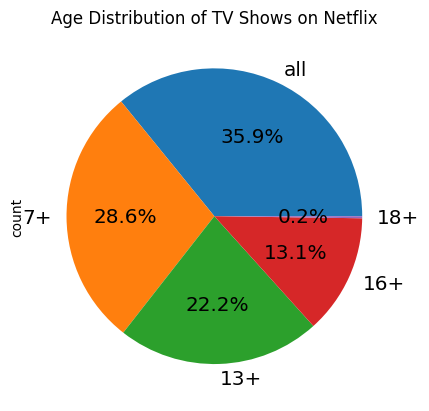

In [156]:
tv_shows_netflix_ID = tv_shows_pd.loc[tv_shows_pd['Netflix'] == 1, :]
tv_shows_netflix_ID
#gets the dataframe for netflix shows that cater to age group of 18+
netflix_over_18_pd = tv_shows_netflix_ID.loc[tv_shows_netflix_ID['Age'] == '18+',:]
netflix_over_18_count = netflix_over_18_pd['ID'].nunique()
netflix_over_18_count
netflix_over_18_pd
labels = ['all','7+','13+','16+','18+']
netflix_age_data = tv_shows_netflix_ID["Age"].value_counts()
netflix_age_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Netflix")

Text(0.5, 1.0, 'Age Distribution of TV Shows on Hulu')

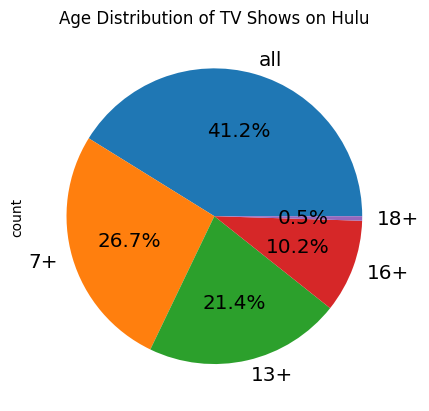

In [157]:
#gets the data for shows 18+ appearing on hulu
tv_shows_hulu_ID = tv_shows_pd.loc[tv_shows_pd['Hulu'] == 1, :]
#gets the dataframe for hulu shows that cater to age group of 18+
hulu_over_18_pd = tv_shows_hulu_ID.loc[tv_shows_hulu_ID['Age'] == '18+',:]
hulu_over_18_count = hulu_over_18_pd['ID'].nunique()
hulu_over_18_count
hulu_over_18_pd
#Pie Chart showing the age distribution on Prime Video shows
Hulu_Video_data = tv_shows_hulu_ID["Age"].value_counts()
Hulu_Video_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Hulu")

Text(0.5, 1.0, 'Age Distribution of TV Shows on Prime Video')

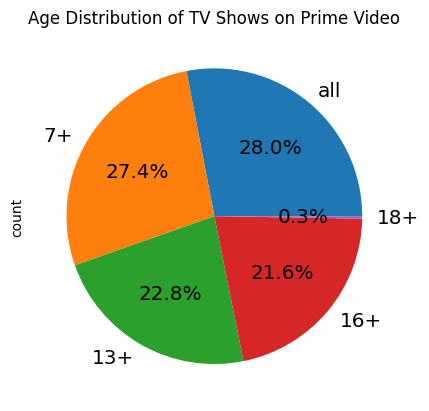

In [158]:
#gets the data for shows 18+ appearing on Prime Video
tv_shows_primevid_ID = tv_shows_pd.loc[tv_shows_pd['Prime Video'] == 1, :]
#gets the dataframe for Prime Video shows that cater to age group of 18+
primevid_over_18_pd = tv_shows_primevid_ID.loc[tv_shows_primevid_ID['Age'] == '18+',:]
primevid_over_18_count = primevid_over_18_pd['ID'].nunique()
primevid_over_18_count
primevid_over_18_pd
#Pie Chart showing the age distribution on Prime Video shows
Prime_Video_data = tv_shows_primevid_ID["Age"].value_counts()
Prime_Video_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Prime Video")

In [159]:
#gets the data for shows 18+ appearing on Disney+
tv_shows_disney_ID = tv_shows_pd.loc[tv_shows_pd['Disney+'] == 1, :]
#gets the dataframe for Disney+ shows that cater to age group of 18+
disney_over_18_pd = tv_shows_disney_ID.loc[tv_shows_disney_ID['Age'] == '18+',:]
disney_over_18_count = disney_over_18_pd['ID'].nunique()
disney_over_18_count
disney_over_18_pd

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
2682,2682,2786,A Christmas Carol,2019,18+,7.2/10,54/100,0,1,0,1,1
3452,3452,3591,Invincible,2021,18+,8.7/10,88/100,0,0,1,1,1


Text(0.5, 1.0, 'Age Distribution of TV Shows on Disney')

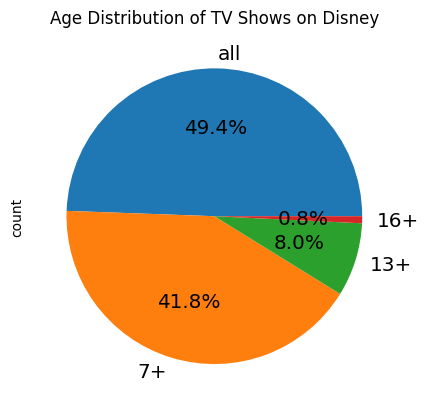

In [160]:
#Pie Chart showing the age distribution on disney shows
Disney_Age_data = tv_shows_disney_ID["Age"].value_counts()

Disney_Age_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of TV Shows on Disney")

In [161]:
#movies
movies_pd = pd.read_csv("Libraries/MoviesOnStreamingPlatforms.csv")
movies_pd.head()
movies_count = movies_pd['ID'].nunique()
movies_count

9515

Text(0.5, 1.0, 'Age Distribution of Movies on Netflix')

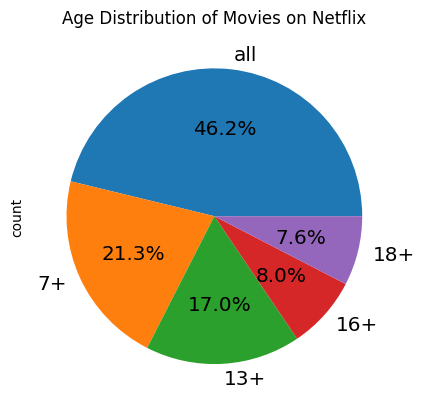

In [162]:
#gets the dataframe for netflix movies and their age

movies_netflix_ID = movies_pd.loc[movies_pd['Netflix'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_netflix_data = movies_netflix_ID["Age"].value_counts()
movies_netflix_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Netflix")

Text(0.5, 1.0, 'Age Distribution of Movies on Hulu')

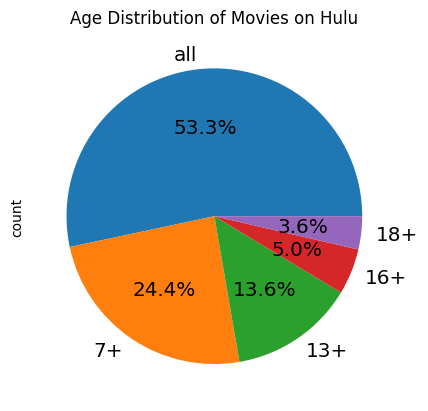

In [163]:
#gets the dataframe for hulu movies and their age

movies_hulu_ID = movies_pd.loc[movies_pd['Hulu'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_hulu_data = movies_hulu_ID["Age"].value_counts()
movies_hulu_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Hulu")


Text(0.5, 1.0, 'Age Distribution of Movies on Prime Video')

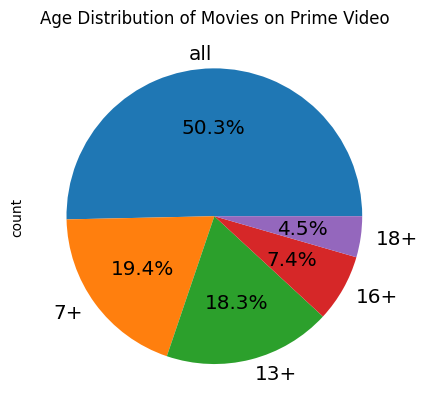

In [164]:
#gets the dataframe for Prime Video movies and their age

movies_primeVid_ID = movies_pd.loc[movies_pd['Prime Video'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_primeVid_data = movies_primeVid_ID["Age"].value_counts()
movies_primeVid_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Prime Video")

Text(0.5, 1.0, 'Age Distribution of Movies on Disney+')

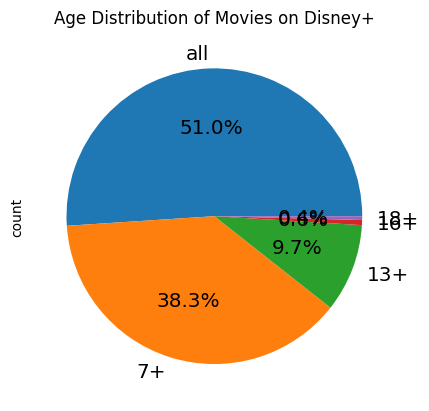

In [165]:
#gets the dataframe for Disney+ movies and their age

movies_Disney_ID = movies_pd.loc[movies_pd['Disney+'] == 1, :]
#Pie Chart showing the age distribution on Prime Video shows
movies_Disney_data = movies_Disney_ID["Age"].value_counts()
movies_Disney_data.plot.pie(labels = labels, autopct= "%1.1f%%", wedgeprops={'linewidth': 3.0},
       textprops={'size': 'x-large'})
plt.title("Age Distribution of Movies on Disney+")

# Hunter Stilwell's Code

In [166]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
# load csv files into dataframes
netflixDF = pd.read_csv("Libraries/netflix_titles.csv")
netflixDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [168]:
# load csv files into dataframes
huluDF = pd.read_csv("Libraries/hulu_titles.csv")
huluDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


In [169]:
# load csv files into dataframes
disneyPlusDF = pd.read_csv("Libraries/disney_plus_titles.csv")
disneyPlusDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [170]:
# load csv files into dataframes
primeVideoDF = pd.read_csv("Libraries/amazon_prime_titles.csv")
primeVideoDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [171]:
# count the number of titles on each streaming service
netflixCount = len(netflixDF['title'])
huluCount = len(huluDF['title'])
disneyPlusCount = len(disneyPlusDF['title'])
primeVideoCount = len(primeVideoDF['title'])
print(f"There are {netflixCount} titles on netflixDF.")
print(f"There are {huluCount} titles on huluDF.")
print(f"There are {disneyPlusCount} titles on disneyPlusDF.")
print(f"There are {primeVideoCount} titles on primeVideoDF.")

There are 8807 titles on netflixDF.
There are 3073 titles on huluDF.
There are 1450 titles on disneyPlusDF.
There are 9668 titles on primeVideoDF.


In [172]:
# create lists for each type of content
seriesCount = [len(netflixDF.loc[netflixDF['type'] == 'TV Show',:]),
               len(huluDF.loc[huluDF['type'] == 'TV Show',:]),
               len(disneyPlusDF.loc[disneyPlusDF['type'] == 'TV Show',:]),
               len(primeVideoDF.loc[primeVideoDF['type'] == 'TV Show',:])]
moviesCount = [len(netflixDF.loc[netflixDF['type'] == 'Movie',:]),
               len(huluDF.loc[huluDF['type'] == 'Movie',:]),
               len(disneyPlusDF.loc[disneyPlusDF['type'] == 'Movie',:]),
               len(primeVideoDF.loc[primeVideoDF['type'] == 'Movie',:])]
streamingServices = ["Netflix", "Hulu", "Disney Plus", "Prime Video"]

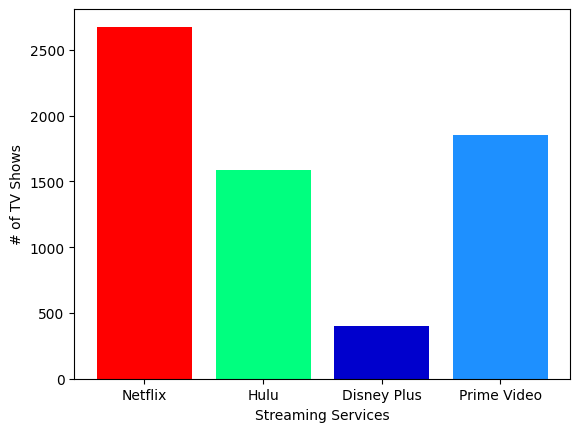

In [173]:
# create a bar chart to show the number of TV shows on each platform
x_axis_series = np.arange(len(seriesCount))
plt.bar(x_axis_series, (seriesCount), color=("red", "springgreen", "mediumblue", "dodgerblue"), align="center")
plt.xticks((0,1,2,3), streamingServices)
plt.xlabel("Streaming Services")
plt.ylabel("# of TV Shows")
plt.savefig('../Charts/BreakdownByType/seriesComparison.png')
plt.show()

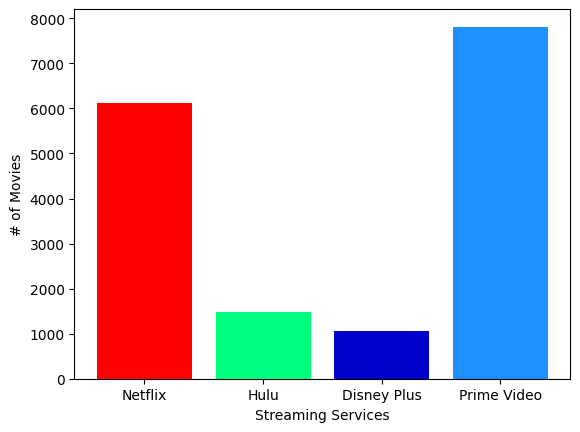

In [174]:
# create a bar chart to show the number of movies on each platform
x_axis_movie = np.arange(len(moviesCount))
plt.bar(x_axis_movie, moviesCount, color=("red", "springgreen", "mediumblue", "dodgerblue"), align="center")
plt.xticks((0,1,2,3), streamingServices)
plt.xlabel("Streaming Services")
plt.ylabel("# of Movies")
plt.savefig('../Charts/BreakdownByType/movieComparison.png')
plt.show()

In [175]:
# create lists to hold the counts of series and movies on each streaming service
streamingServiceInfo= {
    'Series Count': (len(netflixDF.loc[netflixDF['type'] == 'TV Show',:]),
                      len(huluDF.loc[huluDF['type'] == 'TV Show',:]),
                      len(disneyPlusDF.loc[disneyPlusDF['type'] == 'TV Show',:]),
                      len(primeVideoDF.loc[primeVideoDF['type'] == 'TV Show',:])),
    'Movie Count': (len(netflixDF.loc[netflixDF['type'] == 'Movie',:]),
                     len(huluDF.loc[huluDF['type'] == 'Movie',:]),
                     len(disneyPlusDF.loc[disneyPlusDF['type'] == 'Movie',:]),
                     len(primeVideoDF.loc[primeVideoDF['type'] == 'Movie',:]))}


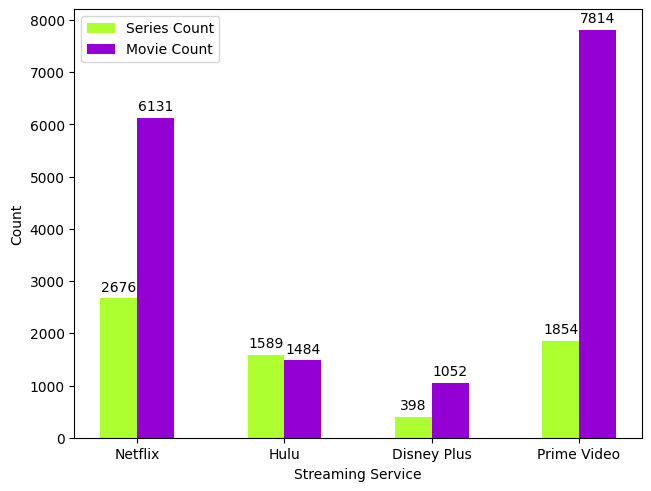

In [176]:
# create a grouped bar chart
xAxisMovieSeries = np.arange(len(streamingServices))
fig, ax = plt.subplots(layout='constrained')
colors =['greenyellow', 'darkviolet']
colorNumber = 0

width = 0.25
multiplier = 0
for attribute, count in streamingServiceInfo.items():
    offset = width * multiplier
    rects = ax.bar(xAxisMovieSeries + offset, count, width, label=attribute, align='edge', color=colors[colorNumber])
    ax.bar_label(rects, padding=3)
    multiplier += 1
    colorNumber += 1
    
plt.xticks((.25,1.25,2.25,3.25), streamingServices)
plt.ylabel('Count')
plt.xlabel('Streaming Service')
plt.legend(loc='best')
plt.savefig("../Charts/BreakdownByType/moviesVsSeries.png")
plt.show()

In [177]:
# get the list of genres from listed_in category on netflix
print(netflixDF['listed_in'].unique())

['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Dramas, International Movies' 'Children & Family Movies, Comedies'
 'British TV Shows, Crime TV Shows, Docuseries' 'TV Comedies, TV Dramas'
 'Documentaries, International Movies'
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas' 'Thrillers'
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure'
 'International TV Shows, TV Action & Adventure, TV Dramas'
 'Comedies, International Movies'
 'Comedies, International Movies, Romantic Movies'
 'Docuseries, International TV Shows, Reality TV'
 'Comedies, International Movies, Music & 

In [178]:
# create a new column called genres and add n/a to make sure each cell has three listed items
netflixDF['genres'] = netflixDF['listed_in']
netflixDF['genres'] = netflixDF['genres'].replace({
    'Documentaries': 'Documentaries, n/a, n/a',
    'Docuseries, Reality TV': 'Docuseries, Reality TV, n/a',
    'Children & Family Movies': 'Children & Family Movies, n/a, n/a',
    'British TV Shows, Reality TV': 'British TV Shows, Reality TV, n/a',
    'Comedies, Dramas': 'Comedies, Dramas, n/a',
    'Dramas, International Movies': 'Dramas, International Movies, n/a',
    'Children & Family Movies, Comedies': 'Children & Family Movies, Comedies, n/a',
    'TV Comedies, TV Dramas': 'TV Comedies, TV Dramas, n/a',
    'Documentaries, International Movies': 'Documentaries, International Movies, n/a',
    'Thrillers': 'Thrillers, n/a, n/a',
    'Comedies, International Movies': 'Comedies, International Movies, n/a',
    'Comedies': 'Comedies, n/a, n/a',
    'Horror Movies, Sci-Fi & Fantasy': 'Horror Movies, Sci-Fi & Fantasy, n/a',
    'TV Comedies': 'TV Comedies, n/a, n/a',
    "Kids' TV": "Kids' TV, n/a, n/a",
    "Kids' TV, TV Comedies": "Kids' TV, TV Comedies, n/a",
    'Action & Adventure, Dramas': 'Action & Adventure, Dramas, n/a',
    "Kids' TV, TV Sci-Fi & Fantasy": "Kids' TV, TV Sci-Fi & Fantasy, n/a",
    'Action & Adventure': 'Action & Adventure, n/a, n/a',
    'Dramas, Thrillers': 'Dramas, Thrillers, n/a',
    'International TV Shows, TV Dramas': 'International TV Shows, TV Dramas, n/a',
    'Reality TV': 'Reality TV, n/a, n/a',
    'Docuseries, International TV Shows': 'Docuseries, International TV Shows, n/a',
    'Anime Series, International TV Shows': 'Anime Series, International TV Shows, n/a',
    "Anime Series, Kids' TV": "Anime Series, Kids' TV, n/a",
    'International Movies, Thrillers': 'International Movies, Thrillers, n/a',
    "Kids' TV, Korean TV Shows": "Kids' TV, Korean TV Shows, n/a",
    'Documentaries, Sports Movies': 'Documentaries, Sports Movies, n/a',
    'Sci-Fi & Fantasy, Thrillers': 'Sci-Fi & Fantasy, Thrillers, n/a',
    'Documentaries, Music & Musicals': 'Documentaries, Music & Musicals, n/a',
    "British TV Shows, Kids' TV": "British TV Shows, Kids' TV, n/a",
    'Docuseries, Science & Nature TV': 'Docuseries, Science & Nature TV, n/a',
    'Children & Family Movies, Dramas': 'Children & Family Movies, Dramas, n/a',
    'Dramas': 'Dramas, n/a, n/a',
    'Comedies, Romantic Movies': 'Comedies, Romantic Movies, n/a',
    'Dramas, Romantic Movies': 'Dramas, Romantic Movies, n/a',
    'Children & Family Movies, Music & Musicals': 'Children & Family Movies, Music & Musicals, n/a',
    'Action & Adventure, Sci-Fi & Fantasy': 'Action & Adventure, Sci-Fi & Fantasy, n/a',
    'Action & Adventure, Comedies': 'Action & Adventure, Comedies, n/a',
    'Comedies, Cult Movies': 'Comedies, Cult Movies, n/a',
    'Comedies, Music & Musicals': 'Comedies, Music & Musicals, n/a',
    'TV Shows': 'TV Shows, n/a, n/a',
    'Action & Adventure, International Movies': 'Action & Adventure, International Movies, n/a',
    'Classic Movies, Dramas': 'Classic Movies, Dramas, n/a',
    'Dramas, Faith & Spirituality': 'Dramas, Faith & Spirituality, n/a',
    'Documentaries, LGBTQ Movies': 'Documentaries, LGBTQ Movies, n/a',
    'Action & Adventure, Classic Movies': 'Action & Adventure, Classic Movies, n/a',
    'Docuseries': 'Docuseries, n/a, n/a',
    'International TV Shows, TV Comedies': 'International TV Shows, TV Comedies, n/a',
    'Dramas, Independent Movies': 'Dramas, Independent Movies, n/a',
    'Horror Movies, International Movies': 'Horror Movies, International Movies, n/a',
    'Reality TV, Teen TV Shows': 'Reality TV, Teen TV Shows, n/a',
    'International TV Shows, Reality TV': 'International TV Shows, Reality TV, n/a',
    'Horror Movies': 'Horror Movies, n/a, n/a',
    'Action & Adventure, Anime Features': 'Action & Adventure, Anime Features, n/a',
    'Comedies, Independent Movies': 'Comedies, Independent Movies, n/a',
    'Stand-Up Comedy': 'Stand-Up Comedy, n/a, n/a',
    'International Movies, Music & Musicals': 'International Movies, Music & Musicals, n/a',
    'Movies': 'Movies, n/a, n/a',
    'Crime TV Shows, Docuseries': 'Crime TV Shows, Docuseries, n/a',
    'TV Dramas, Teen TV Shows': 'TV Dramas, Teen TV Shows, n/a',
    'Dramas, Sports Movies': 'Dramas, Sports Movies, n/a',
    'TV Dramas, TV Sci-Fi & Fantasy': 'TV Dramas, TV Sci-Fi & Fantasy, n/a',
    'Anime Series': 'Anime Series, n/a, n/a',
    'Stand-Up Comedy & Talk Shows, TV Comedies': 'Stand-Up Comedy & Talk Shows, TV Comedies, n/a',
    'Children & Family Movies, Sports Movies': 'Children & Family Movies, Sports Movies, n/a',
    'TV Action & Adventure, TV Sci-Fi & Fantasy': 'TV Action & Adventure, TV Sci-Fi & Fantasy, n/a',
    'Anime Series, Stand-Up Comedy & Talk Shows': 'Anime Series, Stand-Up Comedy & Talk Shows, n/a',
    'TV Dramas': 'TV Dramas, n/a, n/a',
    'Horror Movies, LGBTQ Movies': 'Horror Movies, LGBTQ Movies, n/a',
    'Romantic TV Shows, TV Dramas': 'Romantic TV Shows, TV Dramas, n/a',
    'International Movies, Romantic Movies': 'International Movies, Romantic Movies, n/a',
    'Action & Adventure, Thrillers': 'Action & Adventure, Thrillers, n/a',
    'Horror Movies, Thrillers': 'Horror Movies, Thrillers, n/a',
    'Action & Adventure, Romantic Movies': 'Action & Adventure, Romantic Movies, n/a',
    'Reality TV, Romantic TV Shows': 'Reality TV, Romantic TV Shows, n/a',
    'Crime TV Shows, TV Dramas': 'Crime TV Shows, TV Dramas, n/a',
    'British TV Shows, Docuseries': 'British TV Shows, Docuseries, n/a',
    'Anime Features, Documentaries': 'Anime Features, Documentaries, n/a',
    'Comedies, Horror Movies': 'Comedies, Horror Movies, n/a',
    'Cult Movies, Horror Movies': 'Cult Movies, Horror Movies, n/a',
    'Action & Adventure, Horror Movies': 'Action & Adventure, Horror Movies, n/a',
    'Independent Movies, Thrillers': 'Independent Movies, Thrillers, n/a',
    'Documentaries, Dramas': 'Documentaries, Dramas, n/a',
    'Action & Adventure, Sports Movies': 'Action & Adventure, Sports Movies, n/a',
    'International TV Shows, Stand-Up Comedy & Talk Shows': 'International TV Shows, Stand-Up Comedy & Talk Shows, n/a',
    'TV Dramas, TV Thrillers': 'TV Dramas, TV Thrillers, n/a',
    'Classic Movies, Music & Musicals': 'Classic Movies, Music & Musicals, n/a',
    'Dramas, Music & Musicals': 'Dramas, Music & Musicals, n/a',
    'Horror Movies, Independent Movies': 'Horror Movies, Independent Movies, n/a',
    'TV Horror, Teen TV Shows': 'TV Horror, Teen TV Shows, n/a',
    'Romantic TV Shows, Teen TV Shows': 'Romantic TV Shows, Teen TV Shows, n/a',
    'TV Comedies, Teen TV Shows': 'TV Comedies, Teen TV Shows, n/a',
    'Children & Family Movies, Sci-Fi & Fantasy': 'Children & Family Movies, Sci-Fi & Fantasy, n/a',
    'Dramas, Sci-Fi & Fantasy': 'Dramas, Sci-Fi & Fantasy, n/a',
    "Kids' TV, TV Thrillers": "Kids' TV, TV Thrillers, n/a",
    'Docuseries, TV Comedies': 'Docuseries, TV Comedies, n/a',
    'Spanish-Language TV Shows, TV Dramas': 'Spanish-Language TV Shows, TV Dramas, n/a',
    'Dramas, LGBTQ Movies': 'Dramas, LGBTQ Movies, n/a',
    'Music & Musicals': 'Music & Musicals, n/a, n/a',
    'Docuseries, Spanish-Language TV Shows': 'Docuseries, Spanish-Language TV Shows, n/a',
    'Children & Family Movies, Documentaries': 'Children & Family Movies, Documentaries, n/a',
    'Music & Musicals, Romantic Movies': 'Music & Musicals, Romantic Movies, n/a',
    'Romantic Movies': 'Romantic Movies, n/a, n/a',
    'TV Action & Adventure, TV Dramas': 'TV Action & Adventure, TV Dramas, n/a',
    'Comedies, Sports Movies': 'Comedies, Sports Movies, n/a',
    'International Movies': 'International Movies, n/a, n/a',
    'Stand-Up Comedy & Talk Shows': 'Stand-Up Comedy & Talk Shows, n/a, n/a',
    'Reality TV, TV Comedies': 'Reality TV, TV Comedies, n/a',
    "Kids' TV, TV Dramas": "Kids' TV, TV Dramas, n/a",
    'Docuseries, TV Sci-Fi & Fantasy': 'Docuseries, TV Sci-Fi & Fantasy, n/a',
    'Anime Features, International Movies': 'Anime Features, International Movies, n/a',
    'LGBTQ Movies, Thrillers': 'LGBTQ Movies, Thrillers, n/a',
    'Reality TV, Science & Nature TV': 'Reality TV, Science & Nature TV, n/a',
    'Anime Features, Children & Family Movies': 'Anime Features, Children & Family Movies, n/a',
    'International Movies, Sci-Fi & Fantasy': 'International Movies, Sci-Fi & Fantasy, n/a',
    'Anime Series, Romantic TV Shows': 'Anime Series, Romantic TV Shows, n/a',
    'Crime TV Shows, TV Action & Adventure': 'Crime TV Shows, TV Action & Adventure, n/a',
    "Kids' TV, TV Action & Adventure": "Kids' TV, TV Action & Adventure, n/a",
    'Action & Adventure, Independent Movies': 'Action & Adventure, Independent Movies, n/a',
    'Anime Series, Teen TV Shows': 'Anime Series, Teen TV Shows, n/a',
    'Anime Features, Romantic Movies': 'Anime Features, Romantic Movies, n/a',
    'International TV Shows, Romantic TV Shows': 'International TV Shows, Romantic TV Shows, n/a',
    'Anime Features, Music & Musicals': 'Anime Features, Music & Musicals, n/a',
    'Docuseries, Stand-Up Comedy & Talk Shows': 'Docuseries, Stand-Up Comedy & Talk Shows, n/a',
    'Documentaries, Stand-Up Comedy': 'Documentaries, Stand-Up Comedy, n/a',
    "Kids' TV, Spanish-Language TV Shows": "Kids' TV, Spanish-Language TV Shows, n/a",
    'Anime Series, Crime TV Shows': 'Anime Series, Crime TV Shows, n/a',
    'Docuseries, TV Dramas': 'Docuseries, TV Dramas, n/a',
    'Romantic TV Shows, TV Comedies': 'Romantic TV Shows, TV Comedies, n/a',
    'TV Action & Adventure': 'TV Action & Adventure, n/a, n/a',
    'Music & Musicals, Stand-Up Comedy': 'Music & Musicals, Stand-Up Comedy, n/a',
    'British TV Shows, TV Comedies': 'British TV Shows, TV Comedies, n/a',
    'TV Comedies, TV Sci-Fi & Fantasy': 'TV Comedies, TV Sci-Fi & Fantasy, n/a',
    "Crime TV Shows, Kids' TV": "Crime TV Shows, Kids' TV, n/a",
    'TV Comedies, TV Mysteries':'TV Comedies, TV Mysteries, n/a',
    'Comedies, Documentaries': 'Comedies, Documentaries, n/a',
    'Reality TV, Spanish-Language TV Shows': 'Reality TV, Spanish-Language TV Shows, n/a',
    'Documentaries, Faith & Spirituality': 'Documentaries, Faith & Spirituality, n/a',
    'Classic & Cult TV, TV Comedies': 'Classic & Cult TV, TV Comedies, n/a',
    'TV Sci-Fi & Fantasy, TV Thrillers': 'TV Sci-Fi & Fantasy, TV Thrillers, n/a',
    'Sports Movies': 'Sports Movies, n/a, n/a',
    'Sci-Fi & Fantasy': 'Sci-Fi & Fantasy, n/a, n/a',
    'Comedies, LGBTQ Movies': 'Comedies, LGBTQ Movies, n/a',
    'Children & Family Movies, Independent Movies': 'Children & Family Movies, Independent Movies, n/a',
    'Classic Movies, Thrillers': 'Classic Movies, Thrillers, n/a',
    'Children & Family Movies, Classic Movies': 'Children & Family Movies, Classic Movies, n/a',
    'Comedies, Sci-Fi & Fantasy': 'Comedies, Sci-Fi & Fantasy, n/a',
    'International Movies, Sports Movies': 'International Movies, Sports Movies, n/a',
    'International TV Shows': 'International TV Shows, n/a',
    'TV Action & Adventure, TV Comedies': 'TV Action & Adventure, TV Comedies, n/a',
    'Independent Movies': 'Independent Movies, n/a, n/a',
    'Documentaries, Horror Movies': 'Documentaries, Horror Movies, n/a',
    'Classic Movies, Documentaries': 'Classic Movies, Documentaries, n/a',
    'Action & Adventure, Children & Family Movies': 'Action & Adventure, Children & Family Movies, n/a',
    'Anime Features': 'Anime Features, n/a, n/a',
    'Crime TV Shows, TV Comedies': 'Crime TV Shows, TV Comedies, n/a',
    'Action & Adventure, Cult Movies': 'Action & Adventure, Cult Movies, n/a',
    'Children & Family Movies, Faith & Spirituality': 'Children & Family Movies, Faith & Spirituality, n/a',
    'Classic & Cult TV, TV Sci-Fi & Fantasy': 'Classic & Cult TV, TV Sci-Fi & Fantasy, n/a'
})

In [179]:
# split the genres column into three columns with one genre present in each column
netflixDF[['genre_1', 'genre_2', 'genre_3']] = netflixDF['genres'].str.split(', ', expand=True)
netflixDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,genre_1,genre_2,genre_3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...","Documentaries, n/a, n/a",Documentaries,n/a,n/a
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries",International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV, n/a",Docuseries,Reality TV,n/a
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Comedies


In [180]:
# export new dataframe as a csv file
netflixDF.to_csv("Libraries/netflix.csv", index_label="show_id")

In [181]:
# create a list that holds every genre present in each column
netflixDuplicateGenres = [netflixDF['genre_1'].unique(), netflixDF['genre_2'].unique(), netflixDF['genre_3'].unique()]
netflixDuplicateGenres

[array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
        'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
        'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
        'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
        'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
        'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
        'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
        'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
        'Cult Movies', 'Independent Movies', 'TV Horror',
        'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
        'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies'],
       dtype=object),
 array(['n/a', 'TV Dramas', 'International TV Shows', 'Reality TV',
        'Romantic TV Shows', 'TV Horror', 'Independent Movies', 'Dramas',
        'Docuseries', 'International Movies', 'Comedies', 'Crime TV Shows',
        'S

In [182]:
# replace tv show and movie specific genres with more general genres
netflixDF['genre_1'] = netflixDF['genre_1'].replace({
    'International TV Shows': 'International',
    'Crime TV Shows': 'Crime',
    'TV Dramas': 'Dramas',
    'TV Comedies': 'Comedies',
    'International Movies': 'International',
    'Horror Movies': 'Horror',
    'TV Action & Adventure': 'Action & Adventure',
    'TV Horror': 'Horror',
    'Anime Series': 'Anime',
    'Anime Features': 'Anime',
    'Romantic Movies': 'Romantic',
    'Romantic TV Shows': 'Romantic',
    'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Stand-Up Comedy': 'Stand-Up Comedy & Talk Shows',
    'Classic Movies': 'Classic & Cult',
    'Classic & Cult TV': 'Classic & Cult',
    'Cult Movies': 'Classic & Cult',
    'Children & Family Movies': 'Children & Family',
    'British TV Shows': 'British',
    "Kids' TV": 'Kids',
    'Reality TV': 'Reality',
    'Independent Movies': 'Independent',
    'Spanish-Language TV Shows': 'Spanish-Language',
    'LGBTQ Movies': 'LGBTQ',
    'Sports Movies': 'Sports'
})
netflixDF['genre_2'] = netflixDF['genre_2'].replace({
    'TV Dramas': 'Dramas',
    'International TV Shows': 'International',
    'Reality TV': 'Reality',
    'Romantic TV Shows': 'Romantic',
    'TV Horror': 'Horror',
    'Independent Movies': 'Independent',
    'International Movies': 'International',
    'Crime TV Shows': 'Crime',
    'Spanish-Language TV Shows': 'Spanish-Language',
    'TV Action & Adventure': 'Action & Adventure',
    'TV Comedies': 'Comedies',
    'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Classic Movies': 'Classic & Cult',
    'Horror Movies': 'Horror',
    'Anime Features': 'Anime',
    "Kids' TV": 'Kids',
    'Korean TV Shows': 'Korean',
    'Sports Movies': 'Sports',
    'Science & Nature TV': 'Science & Nature',
    'Romantic Movies': 'Romantic',
    'Cult Movies': 'Classic & Cult',
    'Children & Family Movies': 'Children & Family',
    'LGBTQ Movies': 'LGBTQ',
    'Teen TV Shows': 'Teen',
    'TV Mysteries': 'Mysteries',
    'TV Thrillers': 'Thrillers',
    'Classic & Cult TV': 'Classic & Cult',
    'Stand-Up Comedy': 'Stand-Up Comedy & Talk Shows'
})
netflixDF['genre_2'] = netflixDF['genre_2'].replace({
    'TV Mysteries': 'Mysteries',
    'TV Action & Adventure': 'Action & Adventure',
    'TV Comedies': 'Comedies',
    'International Movies': 'International',
    'International TV Shows': 'International',
    'TV Dramas': 'Dramas',
    'Romantic Movies': 'Romantic',
    'Reality TV': 'Reality',
    'TV Thrillers': 'Thrillers',
    'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
    'Sports Movies': 'Sports',
    'Romantic TV Shows': 'Romantic',
    'Teen TV Shows': 'Teen',
    'Spanish-Language TV Shows': 'Spanish-Language',
    'Independent Movies': 'Independent',
    'Cult Movies': 'Classic & Cult',
    'Children & Family Movies': 'Children & Family',
    'Science & Nature TV': 'Science & Nature',
    'Classic Movies': 'Classic & Cult',
    'TV Horror': 'Horror',
    'LGBTQ Movies': 'LGBTQ',
    'Horror Movies': 'Horror',
    'Korean TV Shows': 'Korean',
    "Kids' TV": 'Kids'
})

In [183]:
# create a list of genres, removing any duplicates from the original genre list
netflixGenres = [
    'Action & Adventure',
    'Anime',
    'British',
    'Children & Family',
    'Classic & Cult',
    'Comedies',
    'Crime',
    'Documentaries',
    'Docuseries',
    'Dramas',
    'Faith & Spirituality',
    'Horror',
    'Independent',
    'International',
    'Kids',
    'Korean',
    'LGBTQ',
    'Movies',
    'Music & Musicals',
    'Mysteries',
    'Reality',
    'Romantic',
    'Science & Nature',
    'Sci-Fi & Fantasy',
    'Stand-Up Comedy & Talk Shows',
    'Spanish-Language',
    'Sports'
    'Teen',
    'Thrillers',
    'TV Shows',
    None
]

In [184]:
# create empty lists to hold the top genres and genre counts
netflixTopGenres = []
netflixTopGenreTotalCounts = []
netflixTopGenreCountPercentage = []

# start the misc. count to count smaller genres at 0
netflixMiscCounts = 0
netflixMiscGenreCount = 0

# create a for loop to go through each genre in the list of total genres
for genre in netflixGenres:
    
    # create a for loop to go through each row in the netflix dataframe
    for row in netflixDF:
        
        # set the running total of counts of occurences of genres to 0
        topGenreTotal=0
        
        # add one each time the genre appears in any column
        topGenreTotal += netflixDF.loc[netflixDF['genre_1'] == genre,'title'].count()
        topGenreTotal += netflixDF.loc[netflixDF['genre_2'] == genre,'title'].count()
        topGenreTotal += netflixDF.loc[netflixDF['genre_3'] == genre,'title'].count()
        
    # create a conditional statement to check if the running total accounts for 5% or more of the total titles
    if topGenreTotal >= 440:
        
        # if it does, add the genre to the top genre list and add the total to the total count list
        netflixTopGenres.append(genre)
        netflixTopGenreTotalCounts.append(topGenreTotal)
        topGenrePercent = round((topGenreTotal / 8807) * 100, 2)
        netflixTopGenreCountPercentage.append(topGenrePercent)
        
    # if it does not, add it to a running total of genres that do not include 5% of the total titles
    elif topGenreTotal < 440:
        netflixMiscCounts += topGenreTotal
        netflixMiscGenreCount += 1
        
# print out statements that tell the top genres, the counts of those genres,
# and the counts of genres not in the top genre list
print(f'The top genres are: {netflixTopGenres}')
print(netflixTopGenreTotalCounts)
print(netflixMiscCounts)
print(netflixMiscGenreCount)
print(netflixTopGenreCountPercentage)

The top genres are: ['Action & Adventure', 'Children & Family', 'Comedies', 'Crime', 'Documentaries', 'Dramas', 'Independent', 'International', 'Kids', 'Romantic', 'Thrillers']
[982, 637, 2063, 470, 869, 2814, 596, 3100, 450, 445, 588]
3185
19
[11.15, 7.23, 23.42, 5.34, 9.87, 31.95, 6.77, 35.2, 5.11, 5.05, 6.68]


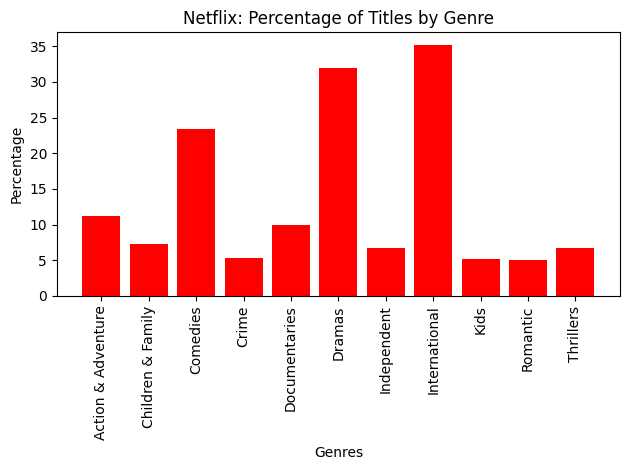

In [185]:
# create a bar chart that represents genre data for netflix
x_axis_netflix = np.arange(len(netflixTopGenreCountPercentage))
plt.bar(x_axis_netflix, netflixTopGenreCountPercentage, align="center", color='red')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,), netflixTopGenres,  rotation="vertical")
plt.title('Netflix: Percentage of Titles by Genre')
plt.xlabel("Genres")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("../Charts/BreakdownByGenre/netflixPercentageGenre.png")
plt.show()

In [186]:
# append the top genre list with the misc. combination of smaller genres
netflixTopGenresWithMisc = netflixTopGenres
netflixTopGenresWithMisc.append(f'Misc. ({netflixMiscGenreCount})')

# append the total counts list with the combined total counts of the smaller genres
netflixTopGenresWithMiscCounts = netflixTopGenreTotalCounts
netflixTopGenresWithMiscCounts.append(netflixMiscCounts)

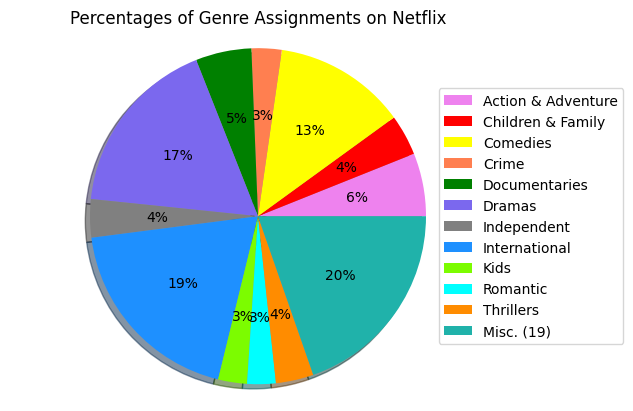

In [187]:
# create a pie chart that represents how many times a genre was assigned to a title
plt.pie(netflixTopGenresWithMiscCounts, autopct="%1.0f%%",
        colors=("violet", "red", "yellow", "coral", "green", "mediumslateblue", "grey", "dodgerblue",
                "lawngreen", "cyan", "darkorange", "lightseagreen"), shadow=True, startangle=0)
plt.axis("equal")
plt.legend(labels=netflixTopGenresWithMisc, loc="center left", bbox_to_anchor=(.85, 0, 0.5, 1))
plt.title("Percentages of Genre Assignments on Netflix")
plt.savefig('../Charts/BreakdownByGenre/netflixGenrePie.png')
plt.show()

In [188]:
# get the list of genres from listed_in category on hulu
print(huluDF['listed_in'].unique())

['Comedy, Stand Up' 'Crime, Drama, Thriller' 'Action, Thriller' 'Horror'
 'Science Fiction, Thriller' 'Family, Kids' 'Horror, Thriller'
 'Cooking & Food, Documentaries, Lifestyle & Culture' 'Drama, Music'
 'Reality, Romance' 'Music, News' 'Comedy, Drama' 'News' 'Drama, Mystery'
 'Reality' 'Sports' 'Documentaries, History' 'History, Reality'
 'Documentaries, Reality, Teen' 'Thriller'
 'Health & Wellness, Lifestyle & Culture, Reality'
 'Black Stories, Reality' 'Documentaries, Reality, Romance'
 'Documentaries, Drama, Mystery' 'Documentaries, Reality'
 'Documentaries, News' 'Latino, Reality'
 'Latino, Mystery, Science Fiction' 'Comedy, Latino'
 'Documentaries, Sports' 'Action, Adventure, Comedy' 'Drama' 'Comedy'
 'Documentaries' 'Crime, Documentaries' 'Action, Adventure, Anime'
 'Action, Adventure' 'Anime'
 'Cooking & Food, Lifestyle & Culture, Reality' 'Comedy, Crime, Drama'
 'Reality, Teen' 'Comedy, Family' 'Comedy, Drama, Romance'
 'Action, Adventure, Drama' 'Drama, Romance, Thriller'


In [189]:
# create a new column called genres and add N/A to make sure each cell has three listed items
huluDF['genres'] = huluDF['listed_in']
huluDF['genres'] = huluDF['genres'].replace({
    'Comedy, Stand Up': 'Comedy, Stand Up, N/A', 
    'Action, Thriller': 'Action, Thriller, N/A',
    'Horror': 'Horror, N/A, N/A',
    'Science Fiction, Thriller': 'Science Fiction, Thriller, N/A',
    'Family, Kids': 'Family, Kids, N/A',
    'Horror, Thriller': 'Horror, Thriller, N/A',
    'Drama, Music': 'Drama, Music, N/A',
    'Reality, Romance': 'Reality, Romance, N/A',
    'Music, News': 'Music, News, N/A',
    'Comedy, Drama': 'Comedy, Drama, N/A',
    'News': 'News, N/A, N/A',
    'Drama, Mystery': 'Drama, Mystery, N/A',
    'Reality': 'Reality, N/A, N/A',
    'Sports': 'Sports, N/A, N/A',
    'Documentaries, History': 'Documentaries, History, N/A',
    'History, Reality': 'History, Reality, N/A',
    'Thriller': 'Thriller, N/A, N/A',
    'Black Stories, Reality': 'Black Stories, Reality, N/A',
    'Documentaries, Reality': 'Documentaries, Reality, N/A',
    'Documentaries, News': 'Documentaries, News, N/A',
    'Latino, Reality': 'Latino, Reality, N/A',
    'Comedy, Latino': 'Comedy, Latino, N/A',
    'Documentaries, Sports': 'Documentaries, Sports, N/A',
    'Drama': 'Drama, N/A, N/A',
    'Comedy': 'Comedy, N/A, N/A',
    'Documentaries': 'Documentaries, N/A, N/A',   
    'Crime, Documentaries': 'Crime, Documentaries, N/A',
    'Action, Adventure': 'Action, Adventure, N/A',
    'Anime': 'Anime, N/A, N/A',
    'Reality, Teen': 'Reality, Teen, N/A',
    'Comedy, Family': 'Comedy, Family, N/A',
    'Crime, Drama': 'Crime, Drama, N/A',
    'Kids': 'Kids, N/A, N/A',
    'Drama, Romance': 'Drama, Romance, N/A',
    'Comedy, Romance': 'Comedy, Romance, N/A',
    'Comedy, Teen': 'Comedy, Teen, N/A',
    'Action, Drama': 'Action, Drama, N/A',
    'Drama, Teen': 'Drama, Teen, N/A',
    'Comedy, Music': 'Comedy, Music, N/A',
    'Drama, Thriller': 'Drama, Thriller, N/A',
    'Drama, Horror': 'Drama, Horror, N/A',
    'Crime, Mystery': 'Crime, Mystery, N/A',
    'Documentaries, LGBTQ+': 'Documentaries, LGBTQ+, N/A',
    'Drama, Science Fiction': 'Drama, Science Fiction, N/A',
    'Kids, Latino': 'Kids, Latino, N/A',
    'Music, Reality': 'Music, Reality, N/A',
    'Comedy, Sitcom': 'Comedy, Sitcom, N/A',
    'Health & Wellness, News': 'Health & Wellness, News, N/A',
    'Comedy, Late Night': 'Comedy, Late Night, N/A',
    'Comedy, Reality': 'Comedy, Reality, N/A',
    'Cooking & Food, Lifestyle & Culture': 'Cooking & Food, Lifestyle & Culture, N/A',
    'Drama, Kids': 'Drama, Kids, N/A',
    'Crime': 'Crime, N/A, N/A',
    'Family, Latino': 'Family, Latino, N/A',
    'Drama, History': 'Drama, History, N/A',
    'Game Shows, Reality': 'Game Shows, Reality, N/A',
    'Lifestyle & Culture, Reality': 'Lifestyle & Culture, Reality, N/A',
    'Black Stories, Drama': 'Black Stories, Drama, N/A',
    'Music': 'Music, N/A, N/A',
    'Cartoons': 'Cartoons, N/A, N/A',
    'Adventure, Kids': 'Adventure, Kids, N/A',
    'Drama, Sports': 'Drama, Sports, N/A',
    'Drama, International': 'Drama, International, N/A',
    'Comedy, Mystery': 'Comedy, Mystery, N/A',
    'Lifestyle & Culture': 'Lifestyle & Culture, N/A, N/A',
    'Adventure, Science Fiction': 'Adventure, Science Fiction, N/A',
    'Adventure, Comedy': 'Adventure, Comedy, N/A',
    'Reality, Sports': 'Reality, Sports, N/A',
    'Black Stories, Documentaries': 'Black Stories, Documentaries, N/A',
    'Documentaries, Drama': 'Documentaries, Drama, N/A',
    'Comedy, Horror': 'Comedy, Horror, N/A',
    'Documentaries, Music': 'Documentaries, Music, N/A',
    'Romance': 'Romance, N/A, N/A',
    'News, Science & Technology': 'News, Science & Technology, N/A',
    'Comedy, Thriller': 'Comedy, Thriller, N/A',
    'Anime, International': 'Anime, International, N/A',
    'Science Fiction': 'Science Fiction, N/A, N/A',
    'Documentaries, International': 'Documentaries, International, N/A',
    'Documentaries, Thriller': 'Documentaries, Thriller, N/A',
    'Horror, Science Fiction': 'Horror, Science Fiction, N/A',
    'Comedy, International': 'Comedy, International, N/A',
    'Comedy, Kids': 'Comedy, Kids, N/A',
    'Lifestyle & Culture, News': 'Lifestyle & Culture, News, N/A',
    'Action, Horror': 'Action, Horror, N/A',
    'International, Reality': 'International, Reality, N/A',
    'Adventure, Drama': 'Adventure, Drama, N/A',
    'History, News': 'History, News, N/A',
    'Action, Comedy': 'Action, Comedy, N/A',
    'Action, Sports': 'Action, Sports, N/A',
    'Mystery, Thriller': 'Mystery, Thriller, N/A',
    'Documentaries, Science & Technology': 'Documentaries, Science & Technology, N/A',
    'Comedy, Documentaries': 'Comedy, Documentaries, N/A',
    'Comedy, LGBTQ+': 'Comedy, LGBTQ+, N/A',
    'Latino, Sports': 'Latino, Sports, N/A',
    'Drama, Lifestyle & Culture': 'Drama, Lifestyle & Culture, N/A',
    'Comedy, News': 'Comedy, News, N/A',
    'History': 'History, N/A, N/A',
    'Documentaries, Science Fiction': 'Documentaries, Science Fiction, N/A',
    'Documentaries, Lifestyle & Culture': 'Documentaries, Lifestyle & Culture, N/A',
    'Drama, LGBTQ+': 'Drama, LGBTQ+, N/A',
    'Black Stories, Thriller': 'Black Stories, Thriller, N/A',
    'Comedy, Lifestyle & Culture': 'Comedy, Lifestyle & Culture, N/A',
    'Game Shows': 'Game Shows, N/A, N/A',
    'Comedy, Science Fiction': 'Comedy, Science Fiction, N/A',
    'Drama, Family': 'Drama, Family, N/A',
    'News, Reality': 'News, Reality, N/A',
    'Action': 'Action, N/A, N/A',
    'Kids, Teen': 'Kids, Teen, N/A',
    'Black Stories, Horror': 'Black Stories, Horror, N/A',
    'Drama, Latino': 'Drama, Latino, N/A',
    'Action, Science Fiction': 'Action, Science Fiction, N/A',
    'Black Stories, Comedy': 'Black Stories, Comedy, N/A',
    'International, Kids': 'International, Kids, N/A',
    'Science & Technology': 'Science & Technology, N/A, N/A',
    'Adult Animation, Comedy': 'Adult Animation, Comedy, N/A',
    'Action, Kids': 'Action, Kids, N/A',
    'Drama, Health & Wellness': 'Drama, Health & Wellness, N/A',
    'Documentaries, Kids': 'Documentaries, Kids, N/A',
    'Adventure, Documentaries': 'Adventure, Documentaries, N/A',
    'Classics, News': 'Classics, News, N/A',
    'Drama, Reality': 'Drama, Reality, N/A',
    'Anime, Science Fiction': 'Anime, Science Fiction, N/A',
    'Anime, Kids': 'Anime, Kids, N/A',
    'Family, Lifestyle & Culture': 'Family, Lifestyle & Culture, N/A',
    'Crime, Horror': 'Crime, Horror, N/A',
    'Anime, Drama': 'Anime, Drama, N/A',
    'Documentaries, Family': 'Documentaries, Family, N/A',
    'Anime, Crime': 'Anime, Crime, N/A',
    'Crime, Reality': 'Crime, Reality, N/A',
    'Kids, LGBTQ+': 'Kids, LGBTQ+, N/A',
    'Comedy, History': 'Comedy, History, N/A',
    'Cooking & Food': 'Cooking & Food, N/A, N/A',
    'Documentaries, Latino': 'Documentaries, Latino, N/A',
    'Family, Science Fiction': 'Family, Science Fiction, N/A',
    'Latino': 'Latino, N/A, N/A',
    'Family': 'Family, N/A, N/A',
    'Cartoons, Kids': 'Cartoons, Kids, N/A',
    'Science Fiction, Teen': 'Science Fiction, Teen, N/A',
    'Adventure, Anime': 'Adventure, Anime, N/A',
    'Action, Anime': 'Action, Anime, N/A',
    'Family, Reality': 'Family, Reality, N/A',
    'Adventure, Reality': 'Adventure, Reality, N/A',
    'Anime, Comedy': 'Anime, Comedy, N/A',
    'Action, Adult Animation': 'Action, Adult Animation, N/A',
})

In [190]:
# split the genres column into three columns with one genre present in each column
huluDF[['genre_1', 'genre_2', 'genre_3']] = huluDF['genres'].str.split(', ', expand=True)
huluDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,genre_1,genre_2,genre_3
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...,"Comedy, Stand Up, N/A",Comedy,Stand Up,N/A
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r...","Crime, Drama, Thriller",Crime,Drama,Thriller
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...,"Action, Thriller, N/A",Action,Thriller,N/A
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...,"Horror, N/A, N/A",Horror,N/A,N/A
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...,"Science Fiction, Thriller, N/A",Science Fiction,Thriller,N/A


In [191]:
# export new dataframe as a csv file
huluDF.to_csv("Libraries/hulu.csv", index_label="show_id")

In [192]:
# create a list that holds every genre present in each column
huluDuplicateGenres = [huluDF['genre_1'].unique(), huluDF['genre_2'].unique(), huluDF['genre_3'].unique()]
huluDuplicateGenres

[array(['Comedy', 'Crime', 'Action', 'Horror', 'Science Fiction', 'Family',
        'Cooking & Food', 'Drama', 'Reality', 'Music', 'News', 'Sports',
        'Documentaries', 'History', 'Thriller', 'Health & Wellness',
        'Black Stories', 'Latino', 'Anime', 'Adventure', 'Kids',
        'Classics', 'Adult Animation', 'Game Shows', 'Lifestyle & Culture',
        'Cartoons', 'International', 'Romance', 'Mystery',
        'Science & Technology'], dtype=object),
 array(['Stand Up', 'Drama', 'Thriller', 'N/A', 'Kids', 'Documentaries',
        'Music', 'Romance', 'News', 'Mystery', 'History', 'Reality',
        'Lifestyle & Culture', 'Latino', 'Sports', 'Adventure', 'Crime',
        'Teen', 'Family', 'Late Night', 'Horror', 'Comedy',
        'Science Fiction', 'LGBTQ+', 'Sitcom', 'International',
        'Adult Animation', 'Cartoons', 'Black Stories', 'Game Shows',
        'Science & Technology', 'Health & Wellness', 'Anime', 'Classics'],
       dtype=object),
 array(['N/A', 'Thriller', '

In [193]:
# create a list of genres, removing any duplicates from the original genre list
huluGenres = [
    'Action',
    'Adult Animation',
    'Adventure',
    'Anime',
    'Black Stories',
    'Cartoons',
    'Classics',
    'Comedy',
    'Cooking & Food',
    'Crime',
    'Documentaries',
    'Drama',
    'Family',
    'Game Shows',
    'Health & Wellness',
    'History',
    'Horror',
    'International',
    'Kids',
    'Late Night',
    'Latino',
    'LGBTQ+',
    'Lifestyle & Culture',
    'Music',
    'Mystery',
    'News',
    'Reality',
    'Romance',
    'Science Fiction',
    'Science & Technology',
    'Sitcom',
    'Sketch Comedy',
    'Sports',
    'Stand Up',
    'Teen',
    'Thriller'
]

In [194]:
# create empty lists to hold the top genres and genre counts
huluTopGenres = []
huluTopGenreTotalCounts = []
huluTopGenreCountPercentage = []

# start the misc. count to count smaller genres at 0
huluMiscCounts = 0
huluMiscGenreCount = 0

# create a for loop to go through each genre in the list of total genres
for genre in huluGenres:
    
    # create a for loop to go through each row in the netflix dataframe
    for row in huluDF:
        
        # set the running total of counts of occurences of genres to 0
        topGenreTotal=0
        
        # add one each time the genre appears in any column
        topGenreTotal += huluDF.loc[huluDF['genre_1'] == genre,'title'].count()
        topGenreTotal += huluDF.loc[huluDF['genre_2'] == genre,'title'].count()
        topGenreTotal += huluDF.loc[huluDF['genre_3'] == genre,'title'].count()
        
    # create a conditional statement to check if the running total accounts for 5% or more of the total titles
    if topGenreTotal >= 155:
        
        # if it does, add the genre to the top genre list and add the total to the total count list
        huluTopGenres.append(genre)
        huluTopGenreTotalCounts.append(topGenreTotal)
        topGenrePercent = round((topGenreTotal / 3073) * 100, 2)
        huluTopGenreCountPercentage.append(topGenrePercent)
        
        
    # if it does not, add it to a running total of genres that do not include 5% of the total titles
    elif topGenreTotal < 155:
        huluMiscCounts += topGenreTotal
        huluMiscGenreCount += 1
        
# print out statements that tell the top genres, the counts of those genres,
# and the counts of genres not in the top genre list
print(f'The top genres are: {huluTopGenres}')
print(huluTopGenreTotalCounts)
print(huluMiscCounts)
print(huluMiscGenreCount)
print(huluTopGenreCountPercentage)

The top genres are: ['Action', 'Adventure', 'Anime', 'Comedy', 'Crime', 'Documentaries', 'Drama', 'Family', 'Horror', 'International', 'Kids', 'Lifestyle & Culture', 'Reality', 'Romance', 'Thriller']
[555, 556, 329, 667, 217, 524, 907, 205, 304, 216, 162, 155, 247, 186, 231]
1300
21
[18.06, 18.09, 10.71, 21.71, 7.06, 17.05, 29.52, 6.67, 9.89, 7.03, 5.27, 5.04, 8.04, 6.05, 7.52]


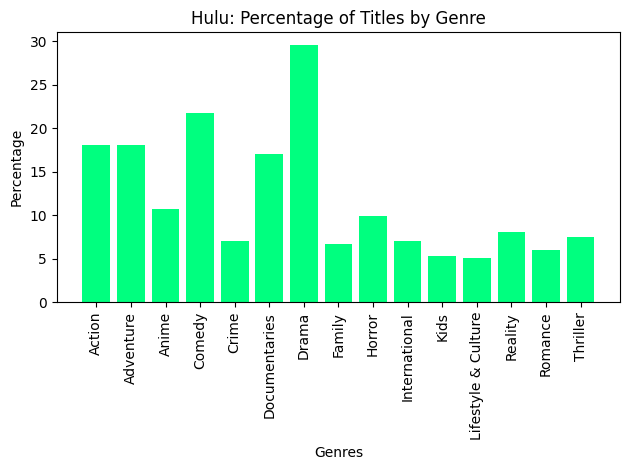

In [195]:
# create a bar chart that represents genre data for hulu
x_axis_hulu = np.arange(len(huluTopGenreCountPercentage))
plt.bar(x_axis_hulu, huluTopGenreCountPercentage, align="center", color='springgreen')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14), huluTopGenres,  rotation="vertical")
plt.title('Hulu: Percentage of Titles by Genre')
plt.xlabel("Genres")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("../Charts/BreakdownByGenre/huluPercentageGenre.png")
plt.show()

In [196]:
# append the top genre list with the misc. combination of smaller genres
huluTopGenresWithMisc = huluTopGenres
huluTopGenresWithMisc.append(f'Misc. ({huluMiscGenreCount})')

# append the total counts list with the combined total counts of the smaller genres
huluTopGenresWithMiscCounts = huluTopGenreTotalCounts
huluTopGenresWithMiscCounts.append(huluMiscCounts)

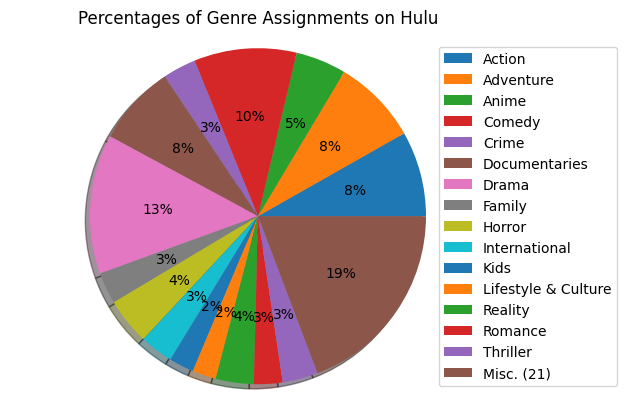

In [197]:
# create a pie chart that represents how many times a genre was assigned to a title
plt.pie(huluTopGenresWithMiscCounts,
        autopct="%1.0f%%", shadow=True, startangle=0)
plt.legend(labels=huluTopGenresWithMisc, loc="center left", bbox_to_anchor=(.85, 0, 0.5, 1))
plt.axis("equal")
plt.title("Percentages of Genre Assignments on Hulu")
plt.savefig("../Charts/BreakdownByGenre/huluGenrePie.png")
plt.show()

In [198]:
# get the list of genres from listed_in category on disney plus
disneyPlusDF['listed_in'].unique()

array(['Animation, Family', 'Comedy', 'Animation, Comedy, Family',
       'Musical', 'Docuseries, Historical, Music',
       'Biographical, Documentary', 'Action-Adventure, Superhero',
       'Docuseries, Reality, Survival',
       'Animals & Nature, Docuseries, Family', 'Comedy, Family, Musical',
       'Documentary', 'Comedy, Family, Music', 'Documentary, Family',
       'Action-Adventure, Animals & Nature, Docuseries',
       'Animals & Nature', 'Animation', 'Animation, Kids',
       'Comedy, Coming of Age, Drama', 'Comedy, Family, Fantasy',
       'Animation, Comedy, Drama', 'Animation, Family, Fantasy',
       'Action-Adventure, Animation, Comedy', 'Comedy, Family',
       'Action-Adventure, Comedy, Family', 'Lifestyle', 'Movies',
       'Action-Adventure, Science Fiction',
       'Action-Adventure, Fantasy, Superhero', 'Coming of Age, Music',
       'Animation, Drama', 'Concert Film, Music',
       'Animation, Comedy, Coming of Age', 'Animation, Comedy',
       'Animation, Crime,

In [63]:
# create a new column called genres and add N/A to make sure each cell has three listed items
disneyPlusDF['genres'] = disneyPlusDF['listed_in']
disneyPlusDF['genres'] = disneyPlusDF['genres'].replace({
    'Animation, Family': 'Animation, Family, N/A',
    'Comedy': 'Comedy, N/A, N/A',
    'Musical': 'Musical, N/A, N/A',
    'Biographical, Documentary': 'Biographical, Documentary, N/A',
    'Action-Adventure, Superhero': 'Action-Adventure, Superhero, N/A',
    'Documentary': 'Documentary, N/A, N/A',
    'Documentary, Family': 'Documentary, Family, N/A',
    'Animals & Nature': 'Animals & Nature, N/A, N/A',
    'Animation': 'Animation, N/A, N/A',
    'Animation, Kids': 'Animation, Kids, N/A',
    'Comedy, Family': 'Comedy, Family, N/A',
    'Lifestyle': 'Lifestyle, N/A, N/A', 
    'Movies': 'Movies, N/A, N/A',
    'Action-Adventure, Science Fiction': 'Action-Adventure, Science Fiction, N/A',
    'Coming of Age, Music': 'Coming of Age, Music, N/A',
    'Animation, Drama': 'Animation, Drama, N/A', 
    'Concert Film, Music': 'Concert Film, Music, N/A',
    'Animation, Comedy': 'Animation, Comedy, N/A',
    'Science Fiction': 'Science Fiction, N/A, N/A',
    'Action-Adventure, Fantasy': 'Action-Adventure, Fantasy, N/A',
    'Drama, Sports': 'Drama, Sports, N/A',
    'Animals & Nature, Reality': 'Animals & Nature, Reality, N/A',
    'Documentary, Historical': 'Documentary, Historical, N/A',
    'Docuseries, Historical': 'Docuseries, Historical, N/A',
    'Reality': 'Reality, N/A, N/A',
    'Family, Variety': 'Family, Variety, N/A',
    'Docuseries': 'Docuseries, N/A, N/A',
    'Family, Game Show / Competition': 'Family, Game Show / Competition, N/A',
    'Animals & Nature, Docuseries': 'Animals & Nature, Docuseries, N/A',
    'Kids, Music': 'Kids, Music, N/A',
    'Animation, Science Fiction': 'Animation, Science Fiction, N/A',
    'Animals & Nature, Documentary': 'Animals & Nature, Documentary, N/A',
    'Crime, Drama': 'Crime, Drama, N/A',
    'Comedy, Drama': 'Comedy, Drama, N/A',
    'Talk Show': 'Talk Show, N/A, N/A',
    'Docuseries, Family': 'Docuseries, Family, N/A',
    'Comedy, Coming of Age': 'Comedy, Coming of Age, N/A',
    'Animation, Fantasy': 'Animation, Fantasy, N/A',
    'Comedy, Sports': 'Comedy, Sports, N/A',
    'Action-Adventure, Family': 'Action-Adventure, Family, N/A',
    'Drama': 'Drama, N/A, N/A',
    'Coming of Age, Drama': 'Coming of Age, Drama, N/A',
    'Coming of Age, Fantasy': 'Coming of Age, Fantasy, N/A',
    'Fantasy': 'Fantasy, N/A, N/A',
    'Animation, Superhero': 'Animation, Superhero, N/A',
    'Biographical, Drama': 'Biographical, Drama, N/A',
    'Anthology, Science Fiction': 'Anthology, Science Fiction, N/A',
    'Fantasy, Musical': 'Fantasy, Musical, N/A',
    'Animals & Nature, Anthology': 'Animals & Nature, Anthology, N/A',
    'Family, Kids': 'Family, Kids, N/A',
    'Action-Adventure, Animation': 'Action-Adventure, Animation, N/A',
    'Series': 'Series, N/A, N/A',
    'Animals & Nature, Comedy': 'Animals & Nature, Comedy, N/A',
    'Comedy, Reality': 'Comedy, Reality, N/A',
    'Anthology, Docuseries': 'Anthology, Docuseries, N/A',
    'Comedy, Fantasy': 'Comedy, Fantasy, N/A',
    'Variety': 'Variety, N/A, N/A',
    'Anthology, Documentary': 'Anthology, Documentary, N/A',
    'Fantasy, Variety': 'Fantasy, Variety, N/A',
    'Documentary, Music': 'Documentary, Music, N/A',
    'Comedy, Variety': 'Comedy, Variety, N/A',
    'Docuseries, Reality': 'Docuseries, Reality, N/A',
    'Drama, Historical': 'Drama, Historical, N/A',
    'Drama, Music': 'Drama, Music, N/A',
    'Drama, Romance': 'Drama, Romance, N/A',
    'Documentary, Sports': 'Documentary, Sports, N/A',
    'Docuseries, Kids': 'Docuseries, Kids, N/A',
    'Buddy, Docuseries': 'Buddy, Docuseries, N/A',
    'Historical, Musical': 'Historical, Musical, N/A',
    'Comedy, Kids': 'Comedy, Kids, N/A',
    'Animals & Nature, Family': 'Animals & Nature, Family, N/A',
    'Docuseries, Science Fiction': 'Docuseries, Science Fiction, N/A',
    'Drama, Family': 'Drama, Family, N/A',
    'Sports': 'Sports, N/A, N/A',
    'Comedy, Mystery': 'Comedy, Mystery, N/A',  
    'Biographical, Sports': 'Biographical, Sports, N/A',
    'Music, Reality': 'Music, Reality, N/A',
    'Drama, Mystery': 'Drama, Mystery, N/A',
    'Coming of Age, Sports': 'Coming of Age, Sports, N/A',
    'Coming of Age, Musical': 'Coming of Age, Musical, N/A',
    'Comedy, Science Fiction': 'Comedy, Science Fiction, N/A',
    'Action-Adventure, Coming of Age': 'Action-Adventure, Coming of Age, N/A',
    'Buddy, Comedy': 'Buddy, Comedy, N/A',
    'Action-Adventure, Documentary': 'Action-Adventure, Documentary, N/A',
    'Drama, Fantasy': 'Drama, Fantasy, N/A',
    'Kids': 'Kids, N/A, N/A',
    'Family, Fantasy': 'Family, Fantasy, N/A',
    'Action-Adventure, Western': 'Action-Adventure, Western, N/A',
    'Comedy, Music': 'Comedy, Music, N/A',
    'Action-Adventure, Comedy': 'Action-Adventure, Comedy, N/A',
})

In [64]:
# split the genres column into three columns with one genre present in each column
disneyPlusDF[['genre_1', 'genre_2', 'genre_3']] = disneyPlusDF['genres'].str.split(', ', expand=True)
disneyPlusDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,genre_1,genre_2,genre_3
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,"Animation, Family, N/A",Animation,Family,N/A
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,"Comedy, N/A, N/A",Comedy,N/A,N/A
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,"Animation, Comedy, Family",Animation,Comedy,Family
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!","Musical, N/A, N/A",Musical,N/A,N/A
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,"Docuseries, Historical, Music",Docuseries,Historical,Music


In [65]:
# export new dataframe as a csv file
disneyPlusDF.to_csv("Libraries/disneyPlus.csv", index_label="show_id")

In [66]:
# create a list that holds every genre present in each column
disneyPlusDuplicateGenres = [disneyPlusDF['genre_1'].unique(), disneyPlusDF['genre_2'].unique(), disneyPlusDF['genre_3'].unique()]
disneyPlusDuplicateGenres

[array(['Animation', 'Comedy', 'Musical', 'Docuseries', 'Biographical',
        'Action-Adventure', 'Animals & Nature', 'Documentary', 'Lifestyle',
        'Movies', 'Coming of Age', 'Concert Film', 'Science Fiction',
        'Drama', 'Anthology', 'Reality', 'Family', 'Kids', 'Crime',
        'Talk Show', 'Fantasy', 'Series', 'Buddy',
        'Game Show / Competition', 'Variety', 'Dance', 'Historical',
        'Sports', 'Music'], dtype=object),
 array(['Family', 'N/A', 'Comedy', 'Historical', 'Documentary',
        'Superhero', 'Reality', 'Docuseries', 'Animals & Nature', 'Kids',
        'Coming of Age', 'Animation', 'Science Fiction', 'Fantasy',
        'Music', 'Drama', 'Crime', 'Sports', 'Variety', 'Buddy',
        'Game Show / Competition', 'Anthology', 'Romance', 'Biographical',
        'Dance', 'Musical', 'Parody', 'Mystery', 'Disaster', 'Lifestyle',
        'Western'], dtype=object),
 array(['N/A', 'Family', 'Music', 'Survival', 'Musical', 'Docuseries',
        'Drama', 'Fantasy

In [67]:
# create a list of genres, removing any duplicates from the original genre list
disneyPlusGenres = ['Action-Adventure',
                    'Animals & Nature',
                    'Animation',
                    'Anime',
                    'Anthology',
                    'Biographical',
                    'Buddy',
                    'Comedy',
                    'Coming of Age',
                    'Concert Film',
                    'Crime',
                    'Dance',
                    'Documentary',
                    'Docuseries',
                    'Disaster',
                    'Drama',
                    'Family',
                    'Fantasy',
                    'Game Show / Competition',
                    'Historical',
                    'Kids',
                    'Lifestyle',
                    'Medical',
                    'Movies',
                    'Music',
                    'Musical',
                    'Mystery',
                    'Parody',
                    'Police/Cop',
                    'Reality',
                    'Romance',
                    'Romantic Comedy',
                    'Science Fiction',
                    'Series',
                    'Soap Opera / Melodrama',
                    'Sports',
                    'Spy/Espionage',
                    'Superhero',
                    'Survival',
                    'Talk Show',
                    'Thriller',
                    'Travel',
                    'Variety',
                    'Western']

In [68]:
# create empty lists to hold the top genres and genre counts
disneyPlusTopGenres = []
disneyPlusTopGenreTotalCounts = []
disneyPlusTopGenreCountPercentage = []

# start the misc. count to count smaller genres at 0
disneyPlusMiscCounts = 0
disneyPlusMiscGenreCount = 0

# create a for loop to go through each genre in the list of total genres
for genre in disneyPlusGenres:
    
    # create a for loop to go through each row in the netflix dataframe
    for row in disneyPlusDF:
        
        # set the running total of counts of occurences of genres to 0
        topGenreTotal=0
        
        # add one each time the genre appears in any column
        topGenreTotal += disneyPlusDF.loc[disneyPlusDF['genre_1'] == genre,'title'].count()
        topGenreTotal += disneyPlusDF.loc[disneyPlusDF['genre_2'] == genre,'title'].count()
        topGenreTotal += disneyPlusDF.loc[disneyPlusDF['genre_3'] == genre,'title'].count()
        
    # create a conditional statement to check if the running total accounts for 5% or more of the total titles
    if topGenreTotal >= 72:
        
        # if it does, add the genre to the top genre list and add the total to the total count list
        disneyPlusTopGenres.append(genre)
        disneyPlusTopGenreTotalCounts.append(topGenreTotal)
        topGenrePercent = round((topGenreTotal / 1450) * 100, 2)
        disneyPlusTopGenreCountPercentage.append(topGenrePercent)
        
    # if it does not, add it to a running total of genres that do not include 5% of the total titles
    elif topGenreTotal < 72:
        disneyPlusMiscCounts += topGenreTotal
        disneyPlusMiscGenreCount += 1
        
# print out statements that tell the top genres, the counts of those genres,
# and the counts of genres not in the top genre list
print(f'The top genres are: {disneyPlusTopGenres}')
print(disneyPlusTopGenreTotalCounts)
print(disneyPlusMiscCounts)
print(disneyPlusMiscGenreCount)
print(disneyPlusTopGenreCountPercentage)

The top genres are: ['Action-Adventure', 'Animals & Nature', 'Animation', 'Comedy', 'Coming of Age', 'Documentary', 'Docuseries', 'Drama', 'Family', 'Fantasy', 'Kids', 'Science Fiction']
[452, 208, 542, 526, 205, 174, 122, 134, 632, 192, 141, 91]
491
32
[31.17, 14.34, 37.38, 36.28, 14.14, 12.0, 8.41, 9.24, 43.59, 13.24, 9.72, 6.28]


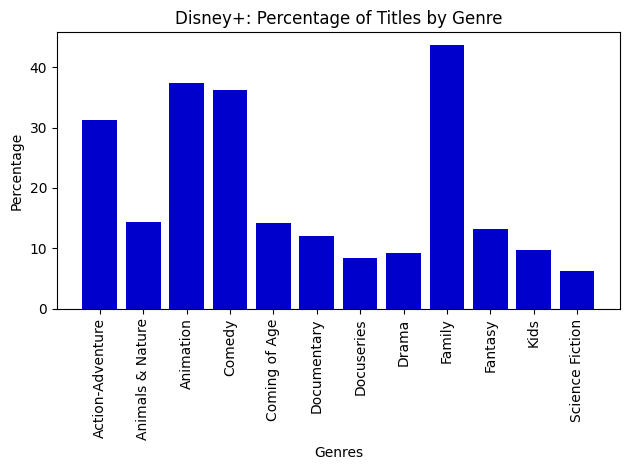

In [69]:
# create a bar chart that represents genre data for disney+
x_axis_disneyPlus = np.arange(len(disneyPlusTopGenreCountPercentage))
plt.bar(x_axis_disneyPlus, disneyPlusTopGenreCountPercentage, align="center", color='mediumblue')
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11), disneyPlusTopGenres,  rotation="vertical")
plt.title('Disney+: Percentage of Titles by Genre')
plt.xlabel("Genres")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("../Charts/BreakdownByGenre/disneyPlusPercentageGenre.png")
plt.show()

In [70]:
# append the top genre list with the misc. combination of smaller genres
disneyPlusTopGenresWithMisc = disneyPlusTopGenres
disneyPlusTopGenresWithMisc.append(f'Misc. ({disneyPlusMiscGenreCount})')

# append the total counts list with the combined total counts of the smaller genres
disneyPlusTopGenresWithMiscCounts = disneyPlusTopGenreTotalCounts
disneyPlusTopGenresWithMiscCounts.append(disneyPlusMiscCounts)

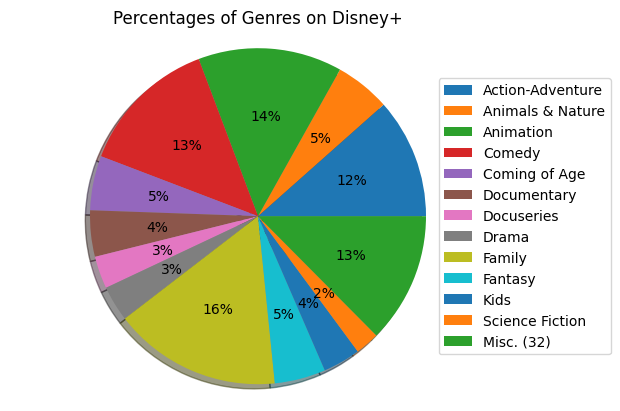

In [71]:
# create a pie chart that represents how many times a genre was assigned to a title
plt.pie(disneyPlusTopGenresWithMiscCounts, autopct="%1.0f%%", shadow=True, startangle=0)
plt.legend(labels=disneyPlusTopGenresWithMisc, loc="center left", bbox_to_anchor=(.85, 0, 0.5, 1))
plt.axis("equal")
plt.title("Percentages of Genres on Disney+")
plt.savefig("../Charts/BreakdownByGenre/disneyPlusGenrePie.png")
plt.show()

In [72]:
# get the list of genres from listed_in category on prime video
print(primeVideoDF['listed_in'].unique())

['Comedy, Drama' 'Drama, International' 'Action, Drama, Suspense'
 'Documentary' 'Drama, Fantasy' 'Fantasy, Kids'
 'Documentary, Special Interest' 'Comedy'
 'Action, Science Fiction, Suspense' 'Drama' 'Adventure, Kids'
 'Horror, Suspense' 'Documentary, Sports' 'Horror, Science Fiction'
 'Kids, Special Interest' 'Comedy, Talk Show and Variety'
 'Science Fiction' 'Kids' 'Action, Anime, Comedy'
 'Arts, Entertainment, and Culture, Comedy, Drama' 'TV Shows'
 'Animation, Anime, Fantasy' 'Action, Adventure, Animation' 'Anime, Kids'
 'Music Videos and Concerts' 'Drama, Suspense' 'Fitness, Special Interest'
 'Faith and Spirituality, Special Interest' 'Special Interest' 'Fitness'
 'Action, Military and War, Western'
 'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety'
 'Action, Western' 'Documentary, Science Fiction'
 'Adventure, Animation, Kids' 'Fantasy, Science Fiction, Suspense'
 'Suspense' 'Action' 'Documentary, LGBTQ' 'Drama, Romance, Suspense'
 'Comedy, Special Interest, Uns

In [73]:
# create a new column called genres and add n/a
# and delete ',' on 'Arts, Entertainment, and Culture 
# to make sure each cell has three listed items
primeVideoDF['genres'] = primeVideoDF['listed_in']
primeVideoDF['genres'] = primeVideoDF['genres'].replace({
    'Comedy, Drama': 'Comedy, Drama, n/a',
    'Drama, International': 'Drama, International, n/a',
    'Documentary': 'Documentary, n/a, n/a',
    'Drama, Fantasy': 'Drama, Fantasy, n/a',
    'Fantasy, Kids': 'Fantasy, Kids, n/a',
    'Documentary, Special Interest': 'Documentary, Special Interest, n/a',
    'Comedy': 'Comedy, n/a, n/a',
    'Drama': 'Drama, n/a, n/a',
    'Adventure, Kids': 'Adventure, Kids, n/a',
    'Horror, Suspense': 'Horror, Suspense, n/a',
    'Documentary, Sports': 'Documentary, Sports, n/a',
    'Horror, Science Fiction': 'Horror, Science Fiction, n/a',
    'Kids, Special Interest': 'Kids, Special Interest, n/a',
    'Comedy, Talk Show and Variety': 'Comedy, Talk Show and Variety, n/a',
    'Science Fiction': 'Science Fiction, n/a, n/a',
    'Kids': 'Kids, n/a, n/a',
    'Arts, Entertainment, and Culture, Comedy, Drama': 'Arts Entertainment and Culture, Comedy, Drama',
    'TV Shows': 'TV Shows, n/a, n/a',
    'Anime, Kids': 'Anime, Kids, n/a',
    'Music Videos and Concerts': 'Music Videos and Concerts, n/a, n/a',
    'Drama, Suspense': 'Drama, Suspense, n/a',
    'Fitness, Special Interest': 'Fitness, Special Interest, n/a',
    'Faith and Spirituality, Special Interest': 'Faith and Spirituality, Special Interest, n/a',
    'Special Interest': 'Special Interest, n/a, n/a',
    'Fitness': 'Fitness, n/a, n/a',
    'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety': 'Arts Entertainment and Culture, Comedy, Talk Show and Variety',
    'Action, Western': 'Action, Western, n/a',
    'Documentary, Science Fiction': 'Documentary, Science Fiction, n/a',
    'Suspense': 'Suspense, n/a, n/a',
    'Action': 'Action, n/a, n/a',
    'Documentary, LGBTQ': 'Documentary, LGBTQ, n/a',
    'Unscripted': 'Unscripted, n/a, n/a,',
    'Documentary, Military and War': 'Documentary, Military and War, n/a',
    'Animation, Kids': 'Animation, Kids, n/a',
    'Action, Drama': 'Action, Drama, n/a',
    'Western': 'Western, n/a, n/a',
    'Arts, Entertainment, and Culture, Comedy': 'Arts Entertainment and Culture, Comedy, n/a',
    'Arts, Entertainment, and Culture, Comedy, Special Interest': 'Arts Entertainment and Culture, Comedy, Special Interest',
    'Comedy, Science Fiction': 'Comedy, Science Fiction, n/a',
    'Drama, Western': 'Drama, Western, n/a',
    'Arts, Entertainment, and Culture': 'Arts Entertainment and Culture, n/a, n/a',
    'Drama, Special Interest': 'Drama, Special Interest, n/a',
    'Action, Science Fiction': 'Action, Science Fiction, n/a',
    'Drama, Young Adult Audience': 'Drama, Young Adult Audience, n/a',
    'Drama, Military and War': 'Drama, Military and War, n/a',
    'Arthouse, Drama': 'Arthouse, Drama, n/a',
    'Sports': 'Sports, n/a, n/a',
    'Military and War, Western': 'Military and War, Western, n/a',
    'Anime': 'Anime, n/a, n/a',
    'Comedy, International': 'Comedy, International, n/a',
    'Drama, Romance': 'Drama, Romance, n/a',
    'Action, Suspense': 'Action, Suspense, n/a',
    'Arts, Entertainment, and Culture, Documentary': 'Arts Entertainment and Culture, Documentary, n/a',
    'International, Suspense': 'International, Suspense, n/a',
    'Action, International': 'Action, International, n/a',
    'Comedy, Horror': 'Comedy, Horror, n/a',
    'Animation, Drama': 'Animation, Drama, n/a',
    'Special Interest, Sports': 'Special Interest, Sports, n/a',
    'Horror': 'Horror, n/a, n/a',
    'Action, Comedy': 'Action, Comedy, n/a',
    'Arts, Entertainment, and Culture, Documentary, Special Interest': 'Arts Entertainment and Culture, Documentary, Special Interest',
    'Action, Adventure': 'Action, Adventure, n/a',
    'Comedy, Romance': 'Comedy, Romance, n/a',
    'Documentary, International': 'Documentary, International, n/a',
    'Adventure, Fantasy': 'Adventure, Fantasy, n/a',
    'Documentary, Talk Show and Variety': 'Documentary, Talk Show and Variety, n/a',
    'Comedy, Kids': 'Comedy, Kids, n/a',
    'Arts, Entertainment, and Culture, Drama': 'Arts Entertainment and Culture, Drama, n/a',
    'Music Videos and Concerts, Special Interest': 'Music Videos and Concerts, Special Interest, n/a',
    'Documentary, Music Videos and Concerts': 'Documentary, Music Videos and Concerts, n/a',
    'Drama, Faith and Spirituality': 'Drama, Faith and Spirituality, n/a',
    'Special Interest, Unscripted': 'Special Interest, Unscripted, n/a',
    'Action, Fantasy': 'Action, Fantasy, n/a',
    'Action, Kids': 'Action, Kids, n/a',
    'Drama, Sports': 'Drama, Sports, n/a',
    'Adventure, Drama': 'Adventure, Drama, n/a',
    'Comedy, Western': 'Comedy, Western, n/a',
    'Drama, Kids': 'Drama, Kids, n/a',
    'Documentary, Horror': 'Documentary, Horror, n/a',
    'Comedy, Suspense': 'Comedy, Suspense, n/a',
    'Drama, Historical': 'Drama, Historical, n/a',
    'Drama, Science Fiction': 'Drama, Science Fiction, n/a',
    'Romance, Science Fiction': 'Romance, Science Fiction, n/a',
    'Arthouse, Arts, Entertainment, and Culture, Drama': 'Arthouse, Arts Entertainment and Culture, Drama',
    'Adventure': 'Adventure, n/a, n/a',
    'Comedy, Young Adult Audience': 'Comedy, Young Adult Audience, n/a',
    'Action, Special Interest': 'Action, Special Interest, n/a',
    'Arts, Entertainment, and Culture, Documentary, Music Videos and Concerts': 'Arts Entertainment and Culture, Documentary, Music Videos and Concerts',
    'Horror, Unscripted': 'Horror, Unscripted, n/a',
    'Documentary, Drama': 'Documentary, Drama, n/a',
    'Suspense, Western': 'Suspense, Western, n/a',
    'Arts, Entertainment, and Culture, Comedy, Romance': 'Arts Entertainment and Culture, Comedy, Romance',
    'Arthouse, Arts, Entertainment, and Culture, Comedy': 'Arthouse, Arts Entertainment and Culture, Comedy',
    'Faith and Spirituality': 'Faith and Spirituality, n/a, n/a',
    'Action, Military and War': 'Action, Military and War, n/a',
    'Action, Horror': 'Action, Horror, n/a',
    'Young Adult Audience': 'Young Adult Audience, n/a, n/a',
    'Horror, Young Adult Audience': 'Horror, Young Adult Audience, n/a',
    'Arts, Entertainment, and Culture, Drama, Romance': 'Arts Entertainment and Culture, Drama, Romance',
    'Documentary, Faith and Spirituality': 'Documentary, Faith and Spirituality, n/a',
    'Arthouse, Arts, Entertainment, and Culture, Documentary': 'Arthouse, Arts Entertainment and Culture, Documentary',
    'Documentary, Unscripted': 'Documentary, Unscripted, n/a',
    'Documentary, Kids': 'Documentary, Kids, n/a',
    'Military and War, Special Interest': 'Military and War, Special Interest, n/a',
    'Action, Young Adult Audience': 'Action, Young Adult Audience, n/a',
    'Arts, Entertainment, and Culture, Comedy, Military and War': 'Arts Entertainment and Culture, Comedy, Military and War',
    'Drama, Horror': 'Drama, Horror, n/a',
    'Arts, Entertainment, and Culture, Drama, Western': 'Arts Entertainment and Culture, Drama, Western',
    'Animation, Comedy': 'Animation, Comedy, n/a',
    'Kids, Science Fiction': 'Kids, Science Fiction, n/a',
    'Drama, LGBTQ': 'Drama, LGBTQ, n/a',
    'Fantasy, Science Fiction': 'Fantasy, Science Fiction, n/a',
    'International, Unscripted': 'International, Unscripted, n/a',
    'Arthouse, Comedy': 'Arthouse, Comedy, n/a',
    'Sports, Unscripted': 'Sports, Unscripted, n/a',
    'Arts, Entertainment, and Culture, Comedy, Documentary': 'Arts Entertainment and Culture, Comedy, Documentary',
    'Animation': 'Animation, n/a, n/a',
    'International, Special Interest': 'International, Special Interest, n/a',
    'Anime, Drama': 'Anime, Drama, n/a',
    'Arts, Entertainment, and Culture, Drama, Kids': 'Arts Entertainment and Culture, Drama, Kids',
    'Arthouse, Special Interest': 'Arthouse, Special Interest, n/a',
    'Action, Sports': 'Action, Sports, n/a',
    'Animation, Anime': 'Animation, Anime, n/a',
    'Talk Show and Variety': 'Talk Show and Variety, n/a, n/a',
    'Romance': 'Romance, n/a, n/a',
    'Drama, Unscripted': 'Drama, Unscripted, n/a',
    'LGBTQ, Special Interest': 'LGBTQ, Special Interest, n/a',
    'Action, Romance': 'Action, Romance, n/a',
    'LGBTQ, Romance': 'LGBTQ, Romance, n/a',
    'Horror, International': 'Horror, International, n/a',
    'Romance, Suspense': 'Romance, Suspense, n/a',
    'Arts, Entertainment, and Culture, Comedy, International': 'Arts Entertainment and Culture, Comedy, International',
    'Action, Documentary': 'Action, Documentary, n/a',
    'Kids, Music Videos and Concerts': 'Kids, Music Videos and Concerts, n/a',
    'Documentary, Suspense': 'Documentary, Suspense, n/a',
    'International': 'International, n/a, n/a',
    'Arts, Entertainment, and Culture, Music Videos and Concerts': 'Arts Entertainment and Culture, Music Videos and Concerts, n/a',
    'Action, Arthouse, Arts, Entertainment, and Culture': 'Action, Arthouse, Arts Entertainment and Culture',
    'Comedy, LGBTQ': 'Comedy, LGBTQ, n/a',
    'Comedy, Sports': 'Comedy, Sports, n/a',
    'Arts, Entertainment, and Culture, Comedy, Unscripted': 'Arts Entertainment and Culture, Comedy, Unscripted',
    'Action, Animation': 'Action, Animation, n/a',
    'International, Sports': 'International, Sports, n/a',
    'Science Fiction, Suspense': 'Science Fiction, Suspense, n/a',
    'Comedy, Unscripted': 'Comedy, Unscripted, n/a',
    'LGBTQ, Suspense': 'LGBTQ, Suspense, n/a',
    'Arts, Entertainment, and Culture, Comedy, LGBTQ': 'Arts Entertainment and Culture, Comedy, LGBTQ',
    'Special Interest, Western': 'Special Interest, Western, n/a',
    'Kids, Western': 'Kids, Western, n/a',
    'Comedy, Special Interest': 'Comedy, Special Interest, n/a',
    'International, Romance': 'International, Romance, n/a',
    'Arts, Entertainment, and Culture, Drama, Young Adult Audience': 'Arts Entertainment and Culture, Drama, Young Adult Audience',
    'Adventure, Comedy': 'Adventure, Comedy, n/a',
    'Arthouse, Documentary': 'Arthouse, Documentary, n/a',
    'Arts, Entertainment, and Culture, Drama, International': 'Arts Entertainment and Culture, Drama, International',
    'Action, Unscripted': 'Action, Unscripted, n/a',
    'LGBTQ': 'LGBTQ, n/a, n/a',
    'Action, Arts, Entertainment, and Culture, Comedy': 'Action, Arts Entertainment and Culture, Comedy',
    'Adventure, Sports': 'Adventure, Sports, n/a',
    'Action, Arts, Entertainment, and Culture, Drama': 'Action, Arts Entertainment and Culture, Drama',
    'Comedy, Historical': 'Comedy, Historical, n/a',
    'Fitness, Kids': 'Fitness, Kids, n/a',
    'Arts, Entertainment, and Culture, International, Unscripted': 'Arts Entertainment and Culture, International, Unscripted',
    'Kids, Sports': 'Kids, Sports, n/a',
    'Arts, Entertainment, and Culture, Comedy, Young Adult Audience': 'Arts Entertainment and Culture, Comedy, Young Adult Audience',
    'Arts, Entertainment, and Culture, Romance': 'Arts Entertainment and Culture, Romance, n/a',
    'Arts, Entertainment, and Culture, Documentary, LGBTQ': 'Arts Entertainment and Culture, Documentary, LGBTQ',
    'Animation, Arts, Entertainment, and Culture, Comedy': 'Animation, Arts Entertainment and Culture, Comedy',
    'Arts, Entertainment, and Culture, Comedy, Science Fiction': 'Arts Entertainment and Culture, Comedy, Science Fiction',
    'Arts, Entertainment, and Culture, International': 'Arts Entertainment and Culture, International, n/a',
    'Arts, Entertainment, and Culture, Music Videos and Concerts, Special Interest': 'Arts Entertainment and Culture, Music Videos and Concerts, Special Interest',
    'Historical': 'Historical, n/a, n/a',
    'Arts, Entertainment, and Culture, Horror, Suspense': 'Arts Entertainment and Culture, Horror, Suspense',
    'Drama, Music Videos and Concerts': 'Drama, Music Videos and Concerts, n/a',
    'Fantasy, Suspense': 'Fantasy, Suspense, n/a',
    'Arts, Entertainment, and Culture, Fantasy, Kids': 'Arts Entertainment and Culture, Fantasy, Kids',   
    'Arts, Entertainment, and Culture, Fantasy, Horror': 'Arts Entertainment and Culture, Fantasy, Horror',
    'Adventure, Suspense': 'Adventure, Suspense, n/a',
    'Animation, Suspense': 'Animation, Suspense, n/a',
    'Adventure, Western': 'Adventure, Western, n/a',
    'Animation, Music Videos and Concerts': 'Animation, Music Videos and Concerts, n/a',
    'Arts, Entertainment, and Culture, LGBTQ, Romance': 'Arts Entertainment and Culture, LGBTQ, Romance',
    'Special Interest, Suspense': 'Special Interest, Suspense, n/a',
    'Arts, Entertainment, and Culture, Fantasy, Science Fiction': 'Arts Entertainment and Culture, Fantasy, Science Fiction',
    'Fantasy, Horror': 'Fantasy, Horror, n/a',
    'Animation, Science Fiction': 'Animation, Science Fiction, n/a',
    'Faith and Spirituality, Music Videos and Concerts': 'Faith and Spirituality, Music Videos and Concerts, n/a',
    'Kids, Young Adult Audience': 'Kids, Young Adult Audience, n/a',
    'Action, Anime': 'Action, Anime, n/a',
    'Comedy, Documentary': 'Comedy, Documentary, n/a',
    'Action, Arts, Entertainment, and Culture, Music Videos and Concerts': 'Action, Arts Entertainment and Culture, Music Videos and Concerts',
    'Arts, Entertainment, and Culture, Kids': 'Arts Entertainment and Culture, Kids, n/a',
    'Arts, Entertainment, and Culture, Drama, Science Fiction': 'Arts Entertainment and Culture, Drama, Science Fiction',
    'Arts, Entertainment, and Culture, Drama, Music Videos and Concerts': 'Arts Entertainment and Culture, Drama, Music Videos and Concerts',
    'Arts, Entertainment, and Culture, Kids, Science Fiction': 'Arts Entertainment and Culture, Kids, Science Fiction',
    'Animation, Young Adult Audience': 'Animation, Young Adult Audience, n/a',
    'Animation, Romance': 'Animation, Romance, n/a',
    'Arts, Entertainment, and Culture, Comedy, Suspense': 'Arts Entertainment and Culture, Comedy, Suspense',
    'Arts, Entertainment, and Culture, LGBTQ': 'Arts Entertainment and Culture, LGBTQ, n/a',
    'Arts, Entertainment, and Culture, Documentary, International': 'Arts Entertainment and Culture, Documentary, International',
    'Arthouse, Young Adult Audience': 'Arthouse, Young Adult Audience, n/a',
    'Action, Arts, Entertainment, and Culture': 'Action, Arts Entertainment and Culture, n/a',
    'Arthouse': 'Arthouse, n/a, n/a',
    'Animation, Horror': 'Animation, Horror, n/a',
    'Arts, Entertainment, and Culture, Special Interest, Unscripted': 'Arts Entertainment and Culture, Special Interest, Unscripted',
    'Arts, Entertainment, and Culture, Comedy, Horror': 'Arts Entertainment and Culture, Comedy, Horror',
    'Arts, Entertainment, and Culture, Young Adult Audience': 'Arts Entertainment and Culture, Young Adult Audience, n/a',
    'Horror, Romance': 'Horror, Romance, n/a',
    'Arthouse, Horror': 'Arthouse, Horror, n/a',
    'Arts, Entertainment, and Culture, Drama, Suspense': 'Arts Entertainment and Culture, Drama, Suspense',
    'Arts, Entertainment, and Culture, Drama, LGBTQ': 'Arts Entertainment and Culture, Drama, LGBTQ',
    'Animation, Special Interest': 'Animation, Special Interest, n/a',
    'Arts, Entertainment, and Culture, Comedy, Kids': 'Arts Entertainment and Culture, Comedy, Kids',
    'Arts, Entertainment, and Culture, Comedy, Faith and Spirituality': 'Arts Entertainment and Culture, Comedy, Faith and Spirituality',
    'Arthouse, Arts, Entertainment, and Culture': 'Arthouse, Arts Entertainment and Culture, n/a',
    'Arts, Entertainment, and Culture, Drama, Horror': 'Arts Entertainment and Culture, Drama, Horror',
    'Horror, Western': 'Horror, Western, n/a',
    'Romance, Western': 'Romance, Western, n/a',
    'Comedy, Fantasy': 'Comedy, Fantasy, n/a',
    'Arthouse, Arts, Entertainment, and Culture, Horror': 'Arthouse, Arts Entertainment and Culture, Horror',
    'Action, Arts, Entertainment, and Culture, Suspense': 'Action, Arts Entertainment and Culture, Suspense',
    'Military and War': 'Military and War, n/a, n/a',
    'Arthouse, Romance': 'Arthouse, Romance, n/a',
})

In [74]:
# split the genres column into three columns with one genre present in each column
primeVideoDF[['genre_1', 'genre_2', 'genre_3']] = primeVideoDF['genres'].str.split(', ', expand=True)
primeVideoDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,genre_1,genre_2,genre_3
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,"Comedy, Drama, n/a",Comedy,Drama,n/a
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,"Drama, International, n/a",Drama,International,n/a
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,"Action, Drama, Suspense",Action,Drama,Suspense
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...","Documentary, n/a, n/a",Documentary,n/a,n/a
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,"Drama, Fantasy, n/a",Drama,Fantasy,n/a


In [75]:
# export new dataframe as a csv file
primeVideoDF.to_csv("Libraries/primeVideo.csv", index_label="show_id")

In [76]:
# create a list that holds every genre present in each column
primeVideoDuplicateGenres = [primeVideoDF['genre_1'].unique(), primeVideoDF['genre_2'].unique(), primeVideoDF['genre_3'].unique()]
primeVideoDuplicateGenres

[array(['Comedy', 'Drama', 'Action', 'Documentary', 'Fantasy', 'Adventure',
        'Horror', 'Kids', 'Science Fiction',
        'Arts Entertainment and Culture', 'TV Shows', 'Animation', 'Anime',
        'Music Videos and Concerts', 'Fitness', 'Faith and Spirituality',
        'Special Interest', 'Suspense', 'Unscripted', 'Western',
        'Arthouse', 'Sports', 'Military and War', 'International',
        'Romance', 'Young Adult Audience', 'Talk Show and Variety',
        'LGBTQ', 'Historical'], dtype=object),
 array(['Drama', 'International', 'n/a', 'Fantasy', 'Kids',
        'Special Interest', 'Science Fiction', 'Suspense', 'Sports',
        'Talk Show and Variety', 'Anime', 'Comedy', 'Adventure',
        'Military and War', 'Western', 'Animation', 'LGBTQ', 'Romance',
        'Documentary', 'Faith and Spirituality', 'Young Adult Audience',
        'Horror', 'Music Videos and Concerts', 'Unscripted', 'Historical',
        'Arts Entertainment and Culture', 'Arthouse'], dtype=object)

In [77]:
# create a list of genres, removing any duplicates from the original genre list
primeVideoGenres = [
    'Action',
    'Adventure',
    'Animation',
    'Anime',
    'Arthouse',
    'Arts Entertainment and Culture',
    'Comedy',
    'Drama',
    'Documentary',
    'Faith and Spirituality',
    'Fantasy',
    'Fitness',
    'Historical'
    'Horror',
    'International',
    'Kids',
    'LGBTQ',
    'Military and War',
    'Music Videos and Concerts',
    'Romance',
    'Science Fiction',
    'Special Interest',
    'Sports',
    'Suspense',
    'Talk Show and Variety',
    'TV Shows',
    'Unscripted',
    'Western',
    'Young Adult Audience', 
    None
]

In [78]:
# create empty lists to hold the top genres and genre counts
primeVideoTopGenres = []
primeVideoTopGenreTotalCounts = []
primeVideoTopGenreCountPercentage = []

# start the misc. count to count smaller genres at 0
primeVideoMiscCounts = 0
primeVideoMiscGenreCount = 0

# create a for loop to go through each genre in the list of total genres
for genre in primeVideoGenres:
    
    # create a for loop to go through each row in the netflix dataframe
    for row in primeVideoDF:
        
        # set the running total of counts of occurences of genres to 0
        topGenreTotal=0
        
        # add one each time the genre appears in any column
        topGenreTotal += primeVideoDF.loc[primeVideoDF['genre_1'] == genre,'title'].count()
        topGenreTotal += primeVideoDF.loc[primeVideoDF['genre_2'] == genre,'title'].count()
        topGenreTotal += primeVideoDF.loc[primeVideoDF['genre_3'] == genre,'title'].count()
        
    # create a conditional statement to check if the running total accounts for 5% or more of the total titles
    if topGenreTotal >= 484:
        
        # if it does, add the genre to the top genre list and add the total to the total count list
        primeVideoTopGenres.append(genre)
        primeVideoTopGenreTotalCounts.append(topGenreTotal)
        topGenrePercent = round((topGenreTotal / 9668) * 100, 2)
        primeVideoTopGenreCountPercentage.append(topGenrePercent)
        
    # if it does not, add it to a running total of genres that do not include 5% of the total titles
    elif topGenreTotal < 484:
        primeVideoMiscCounts += topGenreTotal
        primeVideoMiscGenreCount += 1
        
# print out statements that tell the top genres, the counts of those genres,
# and the counts of genres not in the top genre list
print(f'The top genres are: {primeVideoTopGenres}')
print(primeVideoTopGenreTotalCounts)
print(primeVideoMiscCounts)
print(primeVideoMiscGenreCount)
print(primeVideoTopGenreCountPercentage)

The top genres are: ['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Kids', 'Romance', 'Special Interest', 'Suspense']
[1657, 547, 2099, 3687, 993, 1085, 674, 980, 1501]
3214
20
[17.14, 5.66, 21.71, 38.14, 10.27, 11.22, 6.97, 10.14, 15.53]


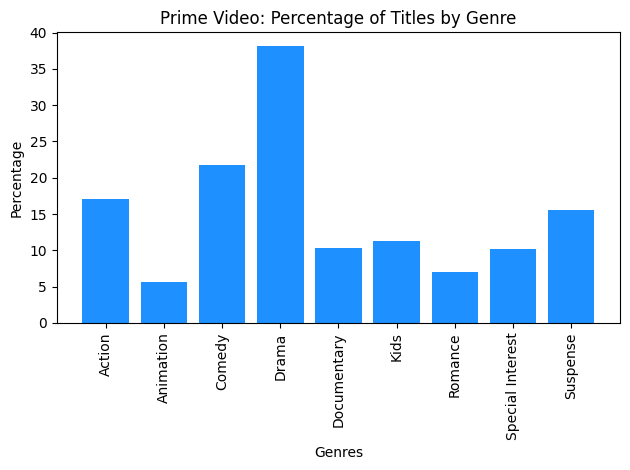

In [79]:
# create a bar chart that represents genre data for prime video
x_axis_primeVideo = np.arange(len(primeVideoTopGenreCountPercentage))
plt.bar(x_axis_primeVideo, primeVideoTopGenreCountPercentage, align="center", color='dodgerblue')
plt.xticks((0,1,2,3,4,5,6,7,8), primeVideoTopGenres,  rotation="vertical")
plt.title('Prime Video: Percentage of Titles by Genre')
plt.xlabel("Genres")
plt.ylabel("Percentage")
plt.tight_layout()
plt.savefig("../Charts/BreakdownByGenre/primeVideoPercentageGenre.png")
plt.show()

In [80]:
# append the top genre list with the misc. combination of smaller genres
primeVideoTopGenresWithMisc = primeVideoTopGenres
primeVideoTopGenresWithMisc.append(f'Misc. ({primeVideoMiscGenreCount})')

# append the total counts list with the combined total counts of the smaller genres
primeVideoTopGenresWithMiscCounts = primeVideoTopGenreTotalCounts
primeVideoTopGenresWithMiscCounts.append(primeVideoMiscCounts)

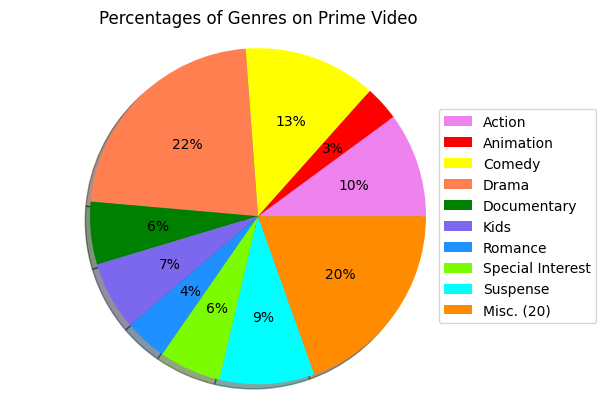

In [81]:
# create a pie chart that represents how many times a genre was assigned to a title
plt.pie(primeVideoTopGenresWithMiscCounts, colors=("violet", "red", "yellow", "coral", "green", "mediumslateblue",
                                               "dodgerblue","lawngreen", "cyan", "darkorange", "lightseagreen"),
        autopct="%1.0f%%", shadow=True, startangle=0)
plt.legend(labels=primeVideoTopGenresWithMisc, loc="center left", bbox_to_anchor=(.85, 0, 0.5, 1))
plt.title("Percentages of Genres on Prime Video")
plt.axis("equal")
plt.savefig("../Charts/BreakdownByGenre/primeVideoGenrePie.png")
plt.show()

# Question To Be Answered: What is the overall quality of content on the streaming service based on viewer ratings (Vote Average)?

The following sections of code is used to obtain the relevant streaming services' (i.e., Prime, Disney, and Netflix) datasets for movies and TV shows content and convert them into DataFrames and visualizations for analysis of the above question.  

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import json
import time

# Movie and TV show data files
PrimeMovie_metadata_path = "../Cleanish Data/Prime Movies.csv"
PrimeTV_metadata_path = "../Cleanish Data/Prime TV.csv"
DisneyMovie_metadata_path = "../Cleanish Data/Disney Movies.csv"
DisneyTV_metadata_path = "../Cleanish Data/Disney TV.csv"
NetflixMovie_metadata_path = "../Cleanish Data/Netflix Movies.csv"
NetflixTV_metadata_path = "../Cleanish Data/Netflix TV.csv"

# Read the csv files into DataFrames
prime_Movies_df = pd.read_csv(PrimeMovie_metadata_path)
prime_TV_df = pd.read_csv(PrimeTV_metadata_path)
disney_Movies_df = pd.read_csv(DisneyMovie_metadata_path)
disney_TV_df = pd.read_csv(DisneyTV_metadata_path)
netflix_Movies_df = pd.read_csv(NetflixMovie_metadata_path)
netflix_TV_df = pd.read_csv(NetflixTV_metadata_path)

# Prime Movies and TV Shows

In [83]:
# Filter the DataFrame for movies with Vote Average of <= 3.0 (Unpopular) and >= 7.0 (Popular) to create subset
# of popular and unpopular movies
prime_PopUnpop_Movies = prime_Movies_df[(prime_Movies_df["Vote Average"] <= 3.0) | (prime_Movies_df["Vote Average"] 
                        >= 7.0)]
prime_PopUnpop_Movies.head()

,Unnamed: 0,Type,Title,Director,Cast,Release Year,Rating,Duration,Genres,Vote Average
0,4701,Movie,Party With Me,Robyn August,"Allison Flanagan, Michael J. Henderson, Noah J...",2021,16+,93 min,"Comedy, Drama",10.0
1,1884,Movie,Alonzo Bodden: Who's Paying Attention?,Manny Rodriguez,Alonzo Bodden,2011,18+,60 min,"Arts, Entertainment, and Culture, Comedy, Spec...",10.0
2,3223,Movie,Cut The Rope: Om Nom Stories - Sweet Adventures,"Arthur Merkulov, Nikita Yurov, Vladimir Gerasimov","Cut The Rope, Om Nom",2021,ALL,49 min,"Animation, Kids",10.0
3,4376,Movie,The Terrible Adventure,Kel Thompson,"Olivia Thompson, Jackson Thompson, Ciro Dobric...",2021,ALL,94 min,"Comedy, Kids",10.0
4,806,Movie,Nursery Rhymes by KiiYii Vol 3 - Learning (Mad...,"Derek Holder, Cannis Holder",Unknown,2018,ALL,50 min,Kids,10.0


In [84]:
# Filter the DataFrame for movies with Vote Average >= 7.0 and <= 3.0
prime_PopMovies = prime_PopUnpop_Movies[prime_PopUnpop_Movies["Vote Average"] >= 7.0]
prime_UnpopMovies = prime_PopUnpop_Movies[prime_PopUnpop_Movies["Vote Average"] <= 3.0]

# Group the filtered data by "Type" to determine the concentration of popular and unpopular vote averages
prime_Grp_PopMovies = prime_PopMovies.groupby("Type").size().reset_index(name="Popular Count")
prime_Grp_UnpopMovies = prime_UnpopMovies.groupby("Type").size().reset_index(name="Unpopular Count")

# Merge the two DataFrames to have a comparative view
prime_Grp_AllMovies = prime_Grp_PopMovies.merge(prime_Grp_UnpopMovies, on="Type", how="outer")

# Display the first few rows of each DataFrame
#prime_Grp_PopMovies.head()
#prime_Grp_UnpopMovies.head()
prime_Grp_AllMovies.head()

,Type,Popular Count,Unpopular Count
0,Movie,1292,239


In [85]:
# Obtain total number of movies and calculate popularity and unpopularity percentages to give better sense of 
# impact relative to total number of movies

# Obtain the total movie count
total_Prime_Movies = prime_Movies_df.groupby("Type").size().reset_index(name="Total Count")
#total_Prime_Movies.head()

# Merge the total movie count DataFrame with the popular-unpopular movie count DataFrame
prime_AllMovies_Merged = prime_Grp_AllMovies.merge(total_Prime_Movies, on="Type", how="outer")
#prime_AllMovies_Merged.head()

# Calculate popularity count percentages and add it as a new column
prime_AllMovies_Merged["Popularity Count %"] = ((prime_AllMovies_Merged["Popular Count"] / 
                                                 prime_AllMovies_Merged["Total Count"]) * 100).round(2)
# Calculate unpopularity count percentages and add it as a new column
prime_AllMovies_Merged["Unpopularity Count %"] = ((prime_AllMovies_Merged["Unpopular Count"] / 
                                                 prime_AllMovies_Merged["Total Count"]) * 100).round(2)

# Display DataFrame
prime_AllMovies_Merged.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %
0,Movie,1292,239,6571,19.66,3.64


In [86]:
# Filter the DataFrame for TV shows with Vote Average of <= 3.0 (Unpopular) and >= 7.0 (Popular) to create subset
# of popular and unpopular TV shows
prime_PopUnpop_TV = prime_TV_df[(prime_TV_df["Vote Average"] <= 3.0) | (prime_TV_df["Vote Average"] 
                        >= 7.0)]
prime_PopUnpop_TV.head()

,Unnamed: 0,Type,Title,Country,Director,Cast,Release Year,Rating,Duration,Genres,Vote Average
0,1064,TV Show,DOM,BR,Unknown,"Gabriel Leone, Flávio Tolezani, Filipe Braganç...",2021,NR,1 Season,Drama,10.0
1,98,TV Show,The World Wars,US,Unknown,Unknown,2014,TV-14,1 Season,Special Interest,10.0
2,377,TV Show,Pocket.watch Onyx Family Ultimate mishmash,GB,Unknown,"Mirthell Mitchell, Rita Mitchell, Shalom Mitch...",2020,TV-Y7,1 Season,Kids,10.0
3,1264,TV Show,Pete the Cat,Unknown,Unknown,"Jacob Tremblay, Jeff “Swampy” Marsh, KT Tunsta...",2021,ALL,8 Seasons,Kids,10.0
4,1369,TV Show,Act 6 - Series 2,CN,Unknown,1,2021,ALL,1 Season,TV Shows,10.0


In [87]:
# Filter the DataFrame for TV shows with Vote Average >= 7.0 and <= 3.0
prime_PopTV = prime_PopUnpop_TV[prime_PopUnpop_TV["Vote Average"] >= 7.0]
prime_UnpopTV = prime_PopUnpop_TV[prime_PopUnpop_TV["Vote Average"] <= 3.0]

# Group the filtered data by "Type" to determine the concentration of popular and unpopular vote averages
prime_Grp_PopTV = prime_PopTV.groupby("Type").size().reset_index(name="Popular Count")
prime_Grp_UnpopTV = prime_UnpopTV.groupby("Type").size().reset_index(name="Unpopular Count")

# Merge the two DataFrames to have a comparative view
prime_Grp_AllTV = prime_Grp_PopTV.merge(prime_Grp_UnpopTV, on="Type", how="outer")

# Display the first few rows of each DataFrame
#prime_Grp_PopTV.head()
#prime_Grp_UnpopTV.head()
prime_Grp_AllTV.head()

,Type,Popular Count,Unpopular Count
0,TV Show,275,110


In [88]:
# Obtain total number of TV shows and calculate popularity and unpopularity percentages to give better sense of 
# impact relative to total number of TV shows

# Obtain the total TV shows count
total_Prime_TV = prime_TV_df.groupby("Type").size().reset_index(name="Total Count")
#total_Prime_TV.head()

# Merge the total TV shows count DataFrame with the popular-unpopular TV shows count DataFrame
prime_AllTV_Merged = prime_Grp_AllTV.merge(total_Prime_TV, on="Type", how="outer")
#prime_AllTV_Merged.head()

# Calculate popularity count percentages and add it as a new column
prime_AllTV_Merged["Popularity Count %"] = ((prime_AllTV_Merged["Popular Count"] / 
                                           prime_AllTV_Merged["Total Count"]) * 100).round(2)
# Calculate unpopularity count percentages and add it as a new column
prime_AllTV_Merged["Unpopularity Count %"] = ((prime_AllTV_Merged["Unpopular Count"] / 
                                           prime_AllTV_Merged["Total Count"]) * 100).round(2)

# Display DataFrame
prime_AllTV_Merged.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %
0,TV Show,275,110,547,50.27,20.11


In [89]:
# Calculate the Overall Vote Average
prime_Movies_VoteAvg = prime_Movies_df["Vote Average"].mean()
prime_TV_VoteAvg = prime_TV_df["Vote Average"].mean()

#print(f"Prime movies overall vote average: {prime_Movies_VoteAvg}\nPrime TV shows overall vote average: {prime_TV_VoteAvg}")

# Create a dictionary of for the Overall Vote Average for movies and TV shows
prime_AllContent_VoteAvg = {
    "Type": ["Prime Movie", "Prime TV Show"],
    "Overall Vote Average": [prime_Movies_VoteAvg, prime_TV_VoteAvg]
}

# Convert dictionary into a DataFrame
prime_AllContent_VoteAvg = pd.DataFrame(prime_AllContent_VoteAvg)
prime_AllContent_VoteAvg.head()

,Type,Overall Vote Average
0,Prime Movie,5.911152
1,Prime TV Show,5.738009


In [90]:
# Use .concat() function to stack the movies and TV Shows DataFrames (i.e., append the rows of the TV Shows 
# DataFrame under the movies one)
prime_AllContent = pd.concat([prime_AllMovies_Merged, prime_AllTV_Merged]).reset_index(drop=True)

# Update the values in "Type" column to include "Prime"
prime_AllContent["Type"] = prime_AllContent["Type"].replace({"Movie": "Prime Movie", "TV Show": "Prime TV Show"})

# Merge the _AllContent_VoteAvg DataFrame with the _AllContent DataFrame
prime_AllContent = prime_AllContent.merge(prime_AllContent_VoteAvg, on="Type", how="left")

# Display DataFrame
prime_AllContent.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %,Overall Vote Average
0,Prime Movie,1292,239,6571,19.66,3.64,5.911152
1,Prime TV Show,275,110,547,50.27,20.11,5.738009


In [91]:
# Assess the distribtuion
prime_Movies_Qrt = prime_Movies_df["Vote Average"].quantile([.25, .5, .75])
prime_Movies_LowQ = prime_Movies_Qrt[.25]
prime_Movies_MedQ = prime_Movies_Qrt[.50]
prime_Movies_UpQ = prime_Movies_Qrt[.75]
prime_Movies_IQR = prime_Movies_UpQ - prime_Movies_LowQ
prime_Movies_LowBnd = prime_Movies_LowQ - (1.5 * prime_Movies_IQR)
prime_Movies_UpBnd = prime_Movies_UpQ + (1.5 * prime_Movies_IQR)
prime_Movies_min = prime_Movies_df["Vote Average"].min()
prime_Movies_max = prime_Movies_df["Vote Average"].max()
prime_Movies_med = prime_Movies_df["Vote Average"].median()
prime_Movies_std = prime_Movies_df["Vote Average"].std()

print(f"Prime movies lower quartile: {prime_Movies_LowQ}")
print(f"Prime movies median quartile: {prime_Movies_MedQ}")
print(f"Prime movies upper quartile: {prime_Movies_UpQ}")
print(f"Prime movies IQR: {prime_Movies_IQR}")
print(f"Prime movies lower bound: {prime_Movies_LowBnd}")
print(f"Prime movies upper bound: {prime_Movies_UpBnd}")
print(f"Prime movies minimum vote score: {prime_Movies_min}")
print(f"Prime movies maximum vote score: {prime_Movies_max}")
print(f"Prime movies median vote score: {prime_Movies_med}")
print(f"Prime movies standard deviation vote score: {prime_Movies_std}\n")

prime_TV_Qrt = prime_TV_df["Vote Average"].quantile([.25, .5, .75])
prime_TV_LowQ = prime_TV_Qrt[.25]
prime_TV_MedQ = prime_TV_Qrt[.50]
prime_TV_UpQ = prime_TV_Qrt[.75]
prime_TV_IQR = prime_TV_UpQ - prime_TV_LowQ
prime_TV_LowBnd = prime_TV_LowQ - (1.5 * prime_TV_IQR)
prime_TV_UpBnd = prime_TV_UpQ + (1.5 * prime_TV_IQR)
prime_TV_min = prime_TV_df["Vote Average"].min()
prime_TV_max = prime_TV_df["Vote Average"].max()
prime_TV_med = prime_TV_df["Vote Average"].median()
prime_TV_std = prime_TV_df["Vote Average"].std()

print(f"Prime TV shows lower quartile: {prime_TV_LowQ}")
print(f"Prime TV shows median quartile: {prime_TV_MedQ}")
print(f"Prime TV shows upper quartile: {prime_TV_UpQ}")
print(f"Prime TV shows IQR: {prime_TV_IQR}")
print(f"Prime TV shows lower bound: {prime_TV_LowBnd}")
print(f"Prime TV shows upper bound: {prime_TV_UpBnd}")
print(f"Prime TV shows minimum vote score: {prime_TV_min}")
print(f"Prime TV shows maximum vote score: {prime_TV_max}")
print(f"Prime TV shows median vote score: {prime_TV_med}")
print(f"Prime TV shows standard deviation vote score: {prime_TV_std}")

Prime movies lower quartile: 5.134
Prime movies median quartile: 6.0
Prime movies upper quartile: 6.7669999999999995
Prime movies IQR: 1.6329999999999991
Prime movies lower bound: 2.6845000000000017
Prime movies upper bound: 9.216499999999998
Prime movies minimum vote score: 1.0
Prime movies maximum vote score: 10.0
Prime movies median vote score: 6.0
Prime movies standard deviation vote score: 1.401283865499

Prime TV shows lower quartile: 5.1
Prime TV shows median quartile: 7.0
Prime TV shows upper quartile: 7.6225000000000005
Prime TV shows IQR: 2.522500000000001
Prime TV shows lower bound: 1.3162499999999984
Prime TV shows upper bound: 11.406250000000002
Prime TV shows minimum vote score: 0.0
Prime TV shows maximum vote score: 10.0
Prime TV shows median vote score: 7.0
Prime TV shows standard deviation vote score: 2.9615906975176793


# Disney Movies and TV Shows

In [92]:
# Filter the DataFrame for movies with Vote Average of <= 3.0 (Unpopular) and >= 7.0 (Popular) to create subset
# of popular and unpopular movies
disney_PopUnpop_Movies = disney_Movies_df[(disney_Movies_df["Vote Average"] <= 3.0) | (disney_Movies_df["Vote Average"] 
                        >= 7.0)]
disney_PopUnpop_Movies.head()

,Unnamed: 0,Type,Title,Country,Director,Cast,Release Year,Date Added,Rating,Duration,Genres,Vote Average
0,67,Movie,Far Away From Raven’s Home,Unknown,Unknown,"Raven-Symoné, Issac Ryan Brown, Navia Robinson...",2021,"September 10, 2021",TV-G,11 min,Comedy,10.0
1,547,Movie,Earth Live,United States,Glenn Weiss,"Jane Lynch, Phil Keoghan, Chris Packham",2017,"November 12, 2019",TV-PG,94 min,"Animals & Nature, Documentary, Family",10.0
2,295,Movie,Women Of Impact: Changing The World,United States,Unknown,Julianna Margulies,2019,"June 5, 2020",TV-PG,44 min,"Documentary, Historical",9.5
3,215,Movie,Prep & Landing: Naughty vs. Nice,United States,"Kevin Deters, Stevie Wermers-Skelton","Dave Foley, Derek Richardson, Sarah Chalke, Ro...",2011,"November 6, 2020",TV-G,23 min,"Animation, Family, Fantasy",9.2
4,36,Movie,Prep & Landing: Operation Secret Santa,Unknown,"Kevin Deters, Stevie Wermers-Skelton","Betty White, Dave Foley, Derek Richardson, Sar...",2010,"November 5, 2021",TV-G,8 min,"Animation, Family, Fantasy",9.2


In [93]:
# Filter the DataFrame for movies with Vote Average >= 7.0 and <= 3.0
disney_PopMovies = disney_PopUnpop_Movies[disney_PopUnpop_Movies["Vote Average"] >= 7.0]
disney_UnpopMovies = disney_PopUnpop_Movies[disney_PopUnpop_Movies["Vote Average"] <= 3.0]

# Group the filtered data by "Type" to determine the concentration of popular and unpopular vote averages
disney_Grp_PopMovies = disney_PopMovies.groupby("Type").size().reset_index(name="Popular Count")
disney_Grp_UnpopMovies = disney_UnpopMovies.groupby("Type").size().reset_index(name="Unpopular Count")

# Merge the two DataFrames to have a comparative view
disney_Grp_AllMovies = disney_Grp_PopMovies.merge(disney_Grp_UnpopMovies, on="Type", how="outer")

# Display the first few rows of each DataFrame
#disney_Grp_PopMovies.head()
#disney_Grp_UnpopMovies.head()
disney_Grp_AllMovies.head()

,Type,Popular Count,Unpopular Count
0,Movie,339,7


In [94]:
# Obtain total number of movies and calculate popularity and unpopularity percentages to give better sense of 
# impact relative to total number of movies

# Obtain the total movie count
total_Disney_Movies = disney_Movies_df.groupby("Type").size().reset_index(name="Total Count")
#total_Disney_Movies.head()

# Merge the total movie count DataFrame with the popular-unpopular movie count DataFrame
disney_AllMovies_Merged = disney_Grp_AllMovies.merge(total_Disney_Movies, on="Type", how="outer")
#disney_AllMovies_Merged.head()

# Calculate popularity count percentages and add it as a new column
disney_AllMovies_Merged["Popularity Count %"] = ((disney_AllMovies_Merged["Popular Count"] / 
                                                 disney_AllMovies_Merged["Total Count"]) * 100).round(2)
# Calculate unpopularity count percentages and add it as a new column
disney_AllMovies_Merged["Unpopularity Count %"] = ((disney_AllMovies_Merged["Unpopular Count"] / 
                                                 disney_AllMovies_Merged["Total Count"]) * 100).round(2)

# Display DataFrame
disney_AllMovies_Merged.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %
0,Movie,339,7,1033,32.82,0.68


In [95]:
# Filter the DataFrame for TV shows with Vote Average of <= 3.0 (Unpopular) and >= 7.0 (Popular) to create subset
# of popular and unpopular TV shows
disney_PopUnpop_TV = disney_TV_df[(disney_TV_df["Vote Average"] <= 3.0) | (disney_TV_df["Vote Average"] 
                        >= 7.0)]
disney_PopUnpop_TV.head()

,Unnamed: 0,Type,Title,Country,Cast,Release Year,Date Added,Rating,Duration,Genres,Vote Average
0,120,TV Show,Disney Roll It Back (Shorts),Unknown,"Ramon Reed, Kaylin Hayman, Suzi Barrett, Tobie...",2019,"February 26, 2021",TV-Y7,1 Season,"Comedy, Docuseries, Family",10.0
1,65,TV Show,When Sharks Attack,United States,Eric Meyers,2013,"July 9, 2021",TV-14,7 Seasons,Reality,10.0
2,175,TV Show,Disney Junior Music Lullabies,Unknown,Unknown,2018,"July 17, 2020",TV-Y,1 Season,"Animation, Kids, Music",10.0
3,54,TV Show,Disney Junior T.O.T.S.,United States,"Vanessa Williams, Megan Hilty, Jet Jurgensmeye...",2018,"July 28, 2021",TV-Y,2 Seasons,"Animation, Buddy, Kids",10.0
4,156,TV Show,Ancient China from Above,United States,Dr. Allan Maca,2020,"September 18, 2020",TV-14,1 Season,"Docuseries, Historical",10.0


In [96]:
# Filter the DataFrame for TV shows with Vote Average >= 7.0 and <= 3.0
disney_PopTV = disney_PopUnpop_TV[disney_PopUnpop_TV["Vote Average"] >= 7.0]
disney_UnpopTV = disney_PopUnpop_TV[disney_PopUnpop_TV["Vote Average"] <= 3.0]

# Group the filtered data by "Type" to determine the concentration of popular and unpopular vote averages
disney_Grp_PopTV = disney_PopTV.groupby("Type").size().reset_index(name="Popular Count")
disney_Grp_UnpopTV = disney_UnpopTV.groupby("Type").size().reset_index(name="Unpopular Count")

# Merge the two DataFrames to have a comparative view
disney_Grp_AllTV = disney_Grp_PopTV.merge(disney_Grp_UnpopTV, on="Type", how="outer")

# Display the first few rows of each DataFrame
#disney_Grp_PopTV.head()
#disney_Grp_UnpopTV.head()
disney_Grp_AllTV.head()

,Type,Popular Count,Unpopular Count
0,TV Show,234,8


In [97]:
# Obtain total number of TV shows and calculate popularity and unpopularity percentages to give better sense of 
# impact relative to total number of TV shows

# Obtain the total TV shows count
total_Disney_TV = disney_TV_df.groupby("Type").size().reset_index(name="Total Count")
#total_Disney_TV.head()

# Merge the total TV shows count DataFrame with the popular-unpopular TV shows count DataFrame
disney_AllTV_Merged = disney_Grp_AllTV.merge(total_Disney_TV, on="Type", how="outer")
#disney_AllTV_Merged.head()

# Calculate popularity count percentages and add it as a new column
disney_AllTV_Merged["Popularity Count %"] = ((disney_AllTV_Merged["Popular Count"] / 
                                           disney_AllTV_Merged["Total Count"]) * 100).round(2)
# Calculate unpopularity count percentages and add it as a new column
disney_AllTV_Merged["Unpopularity Count %"] = ((disney_AllTV_Merged["Unpopular Count"] / 
                                           disney_AllTV_Merged["Total Count"]) * 100).round(2)

# Display DataFrame
disney_AllTV_Merged.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %
0,TV Show,234,8,374,62.57,2.14


In [98]:
# Calculate the Overall Vote Average
disney_Movies_VoteAvg = disney_Movies_df["Vote Average"].mean()
disney_TV_VoteAvg = disney_TV_df["Vote Average"].mean()

#print(f"Disney movies overall vote average: {disney_Movies_VoteAvg}\nPrime TV shows overall vote average: {disney_TV_VoteAvg}")

# Create a dictionary of for the Overall Vote Average for movies and TV shows
disney_AllContent_VoteAvg = {
    "Type": ["Disney Movie", "Disney TV Show"],
    "Overall Vote Average": [disney_Movies_VoteAvg, disney_TV_VoteAvg]
}

# Convert dictionary into a DataFrame
disney_AllContent_VoteAvg = pd.DataFrame(disney_AllContent_VoteAvg)
disney_AllContent_VoteAvg.head()

,Type,Overall Vote Average
0,Disney Movie,6.631720
1,Disney TV Show,7.033741


In [99]:
# Use .concat() function to stack the movies and TV Shows DataFrames (i.e., append the rows of the TV Shows 
# DataFrame under the movies one)
disney_AllContent = pd.concat([disney_AllMovies_Merged, disney_AllTV_Merged]).reset_index(drop=True)

# Update the values in "Type" column to include "Prime"
disney_AllContent["Type"] = disney_AllContent["Type"].replace({"Movie": "Disney Movie", "TV Show": "Disney TV Show"})

# Merge the _AllContent_VoteAvg DataFrame with the _AllContent DataFrame
disney_AllContent = disney_AllContent.merge(disney_AllContent_VoteAvg, on="Type", how="left")

# Display DataFrame
disney_AllContent.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %,Overall Vote Average
0,Disney Movie,339,7,1033,32.82,0.68,6.631720
1,Disney TV Show,234,8,374,62.57,2.14,7.033741


In [100]:
# Assess the distribtuion
disney_Movies_Qrt = disney_Movies_df["Vote Average"].quantile([.25, .5, .75])
disney_Movies_LowQ = disney_Movies_Qrt[.25]
disney_Movies_MedQ = disney_Movies_Qrt[.50]
disney_Movies_UpQ = disney_Movies_Qrt[.75]
disney_Movies_IQR = disney_Movies_UpQ - disney_Movies_LowQ
disney_Movies_LowBnd = disney_Movies_LowQ - (1.5 * disney_Movies_IQR)
disney_Movies_UpBnd = disney_Movies_UpQ + (1.5 * disney_Movies_IQR)
disney_Movies_min = disney_Movies_df["Vote Average"].min()
disney_Movies_max = disney_Movies_df["Vote Average"].max()
disney_Movies_med = disney_Movies_df["Vote Average"].median()
disney_Movies_std = disney_Movies_df["Vote Average"].std()

print(f"Disney movies lower quartile: {disney_Movies_LowQ}")
print(f"Disney movies median quartile: {disney_Movies_MedQ}")
print(f"Disney movies upper quartile: {disney_Movies_UpQ}")
print(f"Disney movies IQR: {disney_Movies_IQR}")
print(f"Disney movies lower bound: {disney_Movies_LowBnd}")
print(f"Disney movies upper bound: {disney_Movies_UpBnd}")
print(f"Disney movies minimum vote score: {disney_Movies_min}")
print(f"Disney movies maximum vote score: {disney_Movies_max}")
print(f"Disney movies median vote score: {disney_Movies_med}")
print(f"Disney movies standard deviation vote score: {disney_Movies_std}\n")

disney_TV_Qrt = disney_TV_df["Vote Average"].quantile([.25, .5, .75])
disney_TV_LowQ = disney_TV_Qrt[.25]
disney_TV_MedQ = disney_TV_Qrt[.50]
disney_TV_UpQ = disney_TV_Qrt[.75]
disney_TV_IQR = disney_TV_UpQ - disney_TV_LowQ
disney_TV_LowBnd = disney_TV_LowQ - (1.5 * disney_TV_IQR)
disney_TV_UpBnd = disney_TV_UpQ + (1.5 * disney_TV_IQR)
disney_TV_min = disney_TV_df["Vote Average"].min()
disney_TV_max = disney_TV_df["Vote Average"].max()
disney_TV_med = disney_TV_df["Vote Average"].median()
disney_TV_std = disney_TV_df["Vote Average"].std()

print(f"Disney TV shows lower quartile: {disney_TV_LowQ}")
print(f"Disney TV shows median quartile: {disney_TV_MedQ}")
print(f"Disney TV shows upper quartile: {disney_TV_UpQ}")
print(f"Disney TV shows IQR: {disney_TV_IQR}")
print(f"Disney TV shows lower bound: {disney_TV_LowBnd}")
print(f"Disney TV shows upper bound: {disney_TV_UpBnd}")
print(f"Disney TV shows minimum vote score: {disney_TV_min}")
print(f"Disney TV shows maximum vote score: {disney_TV_max}")
print(f"Disney TV shows median vote score: {disney_TV_med}")
print(f"Disney TV shows standard deviation vote score: {disney_TV_std}")

Disney movies lower quartile: 6.134
Disney movies median quartile: 6.631
Disney movies upper quartile: 7.188
Disney movies IQR: 1.0539999999999994
Disney movies lower bound: 4.553000000000001
Disney movies upper bound: 8.768999999999998
Disney movies minimum vote score: 2.0
Disney movies maximum vote score: 10.0
Disney movies median vote score: 6.631
Disney movies standard deviation vote score: 0.8890802462382734

Disney TV shows lower quartile: 6.5
Disney TV shows median quartile: 7.2615
Disney TV shows upper quartile: 7.7490000000000006
Disney TV shows IQR: 1.2490000000000006
Disney TV shows lower bound: 4.626499999999999
Disney TV shows upper bound: 9.622500000000002
Disney TV shows minimum vote score: 2.0
Disney TV shows maximum vote score: 10.0
Disney TV shows median vote score: 7.2615
Disney TV shows standard deviation vote score: 1.2833083061728965


# Netflix Movies and TV Shows

In [101]:
# Filter the DataFrame for movies with Vote Average of <= 3.0 (Unpopular) and >= 7.0 (Popular) to create subset
# of popular and unpopular movies
netflix_PopUnpop_Movies = netflix_Movies_df[(netflix_Movies_df["Vote Average"] <= 3.0) | (netflix_Movies_df["Vote Average"] 
                        >= 7.0)]
netflix_PopUnpop_Movies.head()

,Unnamed: 0,Type,Title,Country,Director,Cast,Release Year,Date Added,Rating,Duration,Genres,Vote Average
0,909,Movie,AK vs AK,India,Vikramaditya Motwane,"Anil Kapoor, Anurag Kashyap",2020,"December 25, 2020",TV-MA,109 min,"Comedies, Dramas, International Movies",10.0
1,1927,Movie,Talaash,India,Reema Kagti,"Aamir Khan, Rani Mukerji, Kareena Kapoor, Nawa...",2012,"December 15, 2019",TV-14,140 min,"Dramas, International Movies, Thrillers",10.0
2,406,Movie,Fatherhood,United States,Paul Weitz,"Kevin Hart, Alfre Woodard, Lil Rel Howery, DeW...",2021,"June 18, 2021",PG-13,111 min,Dramas,10.0
3,4564,Movie,Janaan,Pakistan,Azfar Jafri,"Armeena Rana Khan, Bilal Ashraf, Ali Rehman Kh...",2016,"September 15, 2017",TV-14,132 min,"Comedies, Dramas, International Movies",10.0
4,3545,Movie,Much Ado About Nothing,"Chile, United States, France",Alejandro Fernández Almendras,"Agustín Silva, Paulina García, Daniel Alcaíno,...",2016,"October 1, 2016",TV-MA,96 min,"Dramas, Independent Movies, International Movies",10.0


In [102]:
# Filter the DataFrame for movies with Vote Average >= 7.0 and <= 3.0
netflix_PopMovies = netflix_PopUnpop_Movies[netflix_PopUnpop_Movies["Vote Average"] >= 7.0]
netflix_UnpopMovies = netflix_PopUnpop_Movies[netflix_PopUnpop_Movies["Vote Average"] <= 3.0]

# Group the filtered data by "Type" to determine the concentration of popular and unpopular vote averages
netflix_Grp_PopMovies = netflix_PopMovies.groupby("Type").size().reset_index(name="Popular Count")
netflix_Grp_UnpopMovies = netflix_UnpopMovies.groupby("Type").size().reset_index(name="Unpopular Count")

# Merge the two DataFrames to have a comparative view
netflix_Grp_AllMovies = netflix_Grp_PopMovies.merge(netflix_Grp_UnpopMovies, on="Type", how="outer")

# Display the first few rows of each DataFrame
#netflix_Grp_PopMovies.head()
#netflix_Grp_UnpopMovies.head()
netflix_Grp_AllMovies.head()

,Type,Popular Count,Unpopular Count
0,Movie,995,244


In [103]:
# Obtain total number of movies and calculate popularity and unpopularity percentages to give better sense of 
# impact relative to total number of movies

# Obtain the total movie count
total_Netflix_Movies = netflix_Movies_df.groupby("Type").size().reset_index(name="Total Count")
#total_Netflix_Movies.head()

# Merge the total movie count DataFrame with the popular-unpopular movie count DataFrame
netflix_AllMovies_Merged = netflix_Grp_AllMovies.merge(total_Netflix_Movies, on="Type", how="outer")
#netflix_AllMovies_Merged.head()

# Calculate popularity count percentages and add it as a new column
netflix_AllMovies_Merged["Popularity Count %"] = ((netflix_AllMovies_Merged["Popular Count"] / 
                                                 netflix_AllMovies_Merged["Total Count"]) * 100).round(2)
# Calculate unpopularity count percentages and add it as a new column
netflix_AllMovies_Merged["Unpopularity Count %"] = ((netflix_AllMovies_Merged["Unpopular Count"] / 
                                                 netflix_AllMovies_Merged["Total Count"]) * 100).round(2)

# Display DataFrame
netflix_AllMovies_Merged.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %
0,Movie,995,244,3775,26.36,6.46


In [104]:
# Filter the DataFrame for TV shows with Vote Average of <= 3.0 (Unpopular) and >= 7.0 (Popular) to create subset
# of popular and unpopular TV shows
netflix_PopUnpop_TV = netflix_TV_df[(netflix_TV_df["Vote Average"] <= 3.0) | (netflix_TV_df["Vote Average"] 
                        >= 7.0)]
netflix_PopUnpop_TV.head()

,Unnamed: 0,Type,Title,Country,Director,Cast,Release Year,Date Added,Rating,Duration,Genres,Vote Average
0,1082,TV Show,Levius,Japan,Unknown,"Nobunaga Shimazaki, Junichi Suwabe, Takahiro S...",2019,"November 28, 2019",TV-14,1 Season,"Anime Series, International TV Shows",10.0
1,2136,TV Show,Fear Files... Har Mod Pe Darr,India,Unknown,Unknown,2015,"June 1, 2017",TV-MA,1 Season,"International TV Shows, TV Horror, TV Thrillers",10.0
2,1990,TV Show,Hemlock Grove,United States,Eli Roth,"Famke Janssen, Landon Liboiron, Dougray Scott,...",2015,"October 23, 2015",TV-MA,3 Seasons,"TV Horror, TV Mysteries, TV Thrillers",10.0
3,1668,TV Show,True: Magical Friends,Unknown,Unknown,"Michela Luci, Jamie Watson, Anna Claire Bartla...",2018,"June 15, 2018",TV-Y,1 Season,Kids' TV,9.3
4,1535,TV Show,Silvana Sin Lana,United States,Unknown,"Maritza Rodríguez, Carlos Ponce, Marimar Vega,...",2016,"November 17, 2018",TV-14,1 Season,"Romantic TV Shows, Spanish-Language TV Shows, ...",9.1


In [105]:
# Filter the DataFrame for TV shows with Vote Average >= 7.0 and <= 3.0
netflix_PopTV = netflix_PopUnpop_TV[netflix_PopUnpop_TV["Vote Average"] >= 7.0]
netflix_UnpopTV = netflix_PopUnpop_TV[netflix_PopUnpop_TV["Vote Average"] <= 3.0]

# Group the filtered data by "Type" to determine the concentration of popular and unpopular vote averages
netflix_Grp_PopTV = netflix_PopTV.groupby("Type").size().reset_index(name="Popular Count")
netflix_Grp_UnpopTV = netflix_UnpopTV.groupby("Type").size().reset_index(name="Unpopular Count")

# Merge the two DataFrames to have a comparative view
netflix_Grp_AllTV = netflix_Grp_PopTV.merge(netflix_Grp_UnpopTV, on="Type", how="outer")

# Display the first few rows of each DataFrame
#netflix_Grp_PopTV.head()
#netflix_Grp_UnpopTV.head()
netflix_Grp_AllTV.head()

,Type,Popular Count,Unpopular Count
0,TV Show,543,46


In [106]:
# Obtain total number of TV shows and calculate popularity and unpopularity percentages to give better sense of 
# impact relative to total number of TV shows

# Obtain the total TV shows count
total_Netflix_TV = netflix_TV_df.groupby("Type").size().reset_index(name="Total Count")
#total_Netflix_TV.head()

# Merge the total TV shows count DataFrame with the popular-unpopular TV shows count DataFrame
netflix_AllTV_Merged = netflix_Grp_AllTV.merge(total_Netflix_TV, on="Type", how="outer")
#netflix_AllTV_Merged.head()

# Calculate popularity count percentages and add it as a new column
netflix_AllTV_Merged["Popularity Count %"] = ((netflix_AllTV_Merged["Popular Count"] / 
                                           netflix_AllTV_Merged["Total Count"]) * 100).round(2)
# Calculate unpopularity count percentages and add it as a new column
netflix_AllTV_Merged["Unpopularity Count %"] = ((netflix_AllTV_Merged["Unpopular Count"] / 
                                           netflix_AllTV_Merged["Total Count"]) * 100).round(2)

# Display DataFrame
netflix_AllTV_Merged.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %
0,TV Show,543,46,865,62.77,5.32


In [107]:
# Calculate the Overall Vote Average
netflix_Movies_VoteAvg = netflix_Movies_df["Vote Average"].mean()
netflix_TV_VoteAvg = netflix_TV_df["Vote Average"].mean()

#print(f"Netflix movies overall vote average: {netflix_Movies_VoteAvg}\nNetflix TV shows overall vote average: {netflix_TV_VoteAvg}")

netflix_AllContent_VoteAvg = {
    "Type": ["Netflix Movie", "Netflix TV Show"],
    "Overall Vote Average": [netflix_Movies_VoteAvg, netflix_TV_VoteAvg]
}

# Convert dictionary into a DataFrame
netflix_AllContent_VoteAvg = pd.DataFrame(netflix_AllContent_VoteAvg)
netflix_AllContent_VoteAvg.head()

,Type,Overall Vote Average
0,Netflix Movie,6.015155
1,Netflix TV Show,6.838901


In [108]:
# Use .concat() function to stack the movies and TV Shows DataFrames (i.e., append the rows of the TV Shows 
# DataFrame under the movies one)
netflix_AllContent = pd.concat([netflix_AllMovies_Merged, netflix_AllTV_Merged]).reset_index(drop=True)

# Update the values in "Type" column to include "Prime"
netflix_AllContent["Type"] = netflix_AllContent["Type"].replace({"Movie": "Netflix Movie", "TV Show": "Netflix TV Show"})

# Merge the _AllContent_VoteAvg DataFrame with the _AllContent DataFrame
netflix_AllContent = netflix_AllContent.merge(netflix_AllContent_VoteAvg, on="Type", how="left")

# Display DataFrame
netflix_AllContent.head()

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %,Overall Vote Average
0,Netflix Movie,995,244,3775,26.36,6.46,6.015155
1,Netflix TV Show,543,46,865,62.77,5.32,6.838901


In [109]:
# Assess the distribtuion
netflix_Movies_Qrt = netflix_Movies_df["Vote Average"].quantile([.25, .5, .75])
netflix_Movies_LowQ = netflix_Movies_Qrt[.25]
netflix_Movies_MedQ = netflix_Movies_Qrt[.50]
netflix_Movies_UpQ = netflix_Movies_Qrt[.75]
netflix_Movies_IQR = netflix_Movies_UpQ - netflix_Movies_LowQ
netflix_Movies_LowBnd = netflix_Movies_LowQ - (1.5 * netflix_Movies_IQR)
netflix_Movies_UpBnd = netflix_Movies_UpQ + (1.5 * netflix_Movies_IQR)
netflix_Movies_min = netflix_Movies_df["Vote Average"].min()
netflix_Movies_max = netflix_Movies_df["Vote Average"].max()
netflix_Movies_med = netflix_Movies_df["Vote Average"].median()
netflix_Movies_std = netflix_Movies_df["Vote Average"].std()

print(f"Netflix movies lower quartile: {netflix_Movies_LowQ}")
print(f"Netflix movies median quartile: {netflix_Movies_MedQ}")
print(f"Netflix movies upper quartile: {netflix_Movies_UpQ}")
print(f"Netflix movies IQR: {netflix_Movies_IQR}")
print(f"Netflix movies lower bound: {netflix_Movies_LowBnd}")
print(f"Netflix movies upper bound: {netflix_Movies_UpBnd}")
print(f"Netflix movies minimum vote score: {netflix_Movies_min}")
print(f"Netflix movies maximum vote score: {netflix_Movies_max}")
print(f"Netflix movies median vote score: {netflix_Movies_med}")
print(f"Netflix movies standard deviation vote score: {netflix_Movies_std}\n")

netflix_TV_Qrt = netflix_TV_df["Vote Average"].quantile([.25, .5, .75])
netflix_TV_LowQ = netflix_TV_Qrt[.25]
netflix_TV_MedQ = netflix_TV_Qrt[.50]
netflix_TV_UpQ = netflix_TV_Qrt[.75]
netflix_TV_IQR = netflix_TV_UpQ - netflix_TV_LowQ
netflix_TV_LowBnd = netflix_TV_LowQ - (1.5 * netflix_TV_IQR)
netflix_TV_UpBnd = netflix_TV_UpQ + (1.5 * netflix_TV_IQR)
netflix_TV_min = netflix_TV_df["Vote Average"].min()
netflix_TV_max = netflix_TV_df["Vote Average"].max()
netflix_TV_med = netflix_TV_df["Vote Average"].median()
netflix_TV_std = netflix_TV_df["Vote Average"].std()

print(f"Netflix TV shows lower quartile: {netflix_TV_LowQ}")
print(f"Netflix TV shows median quartile: {netflix_TV_MedQ}")
print(f"Netflix TV shows upper quartile: {netflix_TV_UpQ}")
print(f"Netflix TV shows IQR: {netflix_TV_IQR}")
print(f"Netflix TV shows lower bound: {netflix_TV_LowBnd}")
print(f"Netflix TV shows upper bound: {netflix_TV_UpBnd}")
print(f"Netflix TV shows minimum vote score: {netflix_TV_min}")
print(f"Netflix TV shows maximum vote score: {netflix_TV_max}")
print(f"Netflix TV shows median vote score: {netflix_TV_med}")
print(f"Netflix TV shows standard deviation vote score: {netflix_TV_std}")

Netflix movies lower quartile: 5.6
Netflix movies median quartile: 6.343
Netflix movies upper quartile: 7.0
Netflix movies IQR: 1.4000000000000004
Netflix movies lower bound: 3.499999999999999
Netflix movies upper bound: 9.100000000000001
Netflix movies minimum vote score: 0.0
Netflix movies maximum vote score: 10.0
Netflix movies median vote score: 6.343
Netflix movies standard deviation vote score: 1.7373348328928846

Netflix TV shows lower quartile: 6.621
Netflix TV shows median quartile: 7.2
Netflix TV shows upper quartile: 7.781
Netflix TV shows IQR: 1.1599999999999993
Netflix TV shows lower bound: 4.881000000000002
Netflix TV shows upper bound: 9.520999999999999
Netflix TV shows minimum vote score: 0.0
Netflix TV shows maximum vote score: 10.0
Netflix TV shows median vote score: 7.2
Netflix TV shows standard deviation vote score: 1.7388369461479178


# Combined: Prime, Disney, and Netflix - Movies and TV Shows

In [110]:
# Combined Popularity and Unpopularity Counts, Percentages, Total Count, and Overall Vote Average

# Use .concat() function to stack the movies and TV Shows DataFrames (i.e., append the rows of the TV Shows 
# DataFrame under the movies one)
all_AllContent = pd.concat([prime_AllContent, disney_AllContent, netflix_AllContent]).reset_index(drop=True)

# Display DataFrame
all_AllContent.head(10)

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %,Overall Vote Average
0,Prime Movie,1292,239,6571,19.66,3.64,5.911152
1,Prime TV Show,275,110,547,50.27,20.11,5.738009
2,Disney Movie,339,7,1033,32.82,0.68,6.631720
3,Disney TV Show,234,8,374,62.57,2.14,7.033741
4,Netflix Movie,995,244,3775,26.36,6.46,6.015155
5,Netflix TV Show,543,46,865,62.77,5.32,6.838901


In [111]:
# Use scatter plot to show relationship between popularity and quality of content
# Create a scatter plot
#plt.figure(figsize=(9, 5))

# Plotting the scatter plot with Popularity Count % on the x-axis and Overall Vote Average on the y-axis.
#plt.scatter(all_AllContent["Popularity Count %"], all_AllContent["Overall Vote Average"])

# Providing labels for each point can be helpful to identify them.
#for i, txt in enumerate(all_AllContent["Type"]):
    #plt.annotate(txt, (all_AllContent["Popularity Count %"][i], all_AllContent["Overall Vote Average"][i]))

# Setting the title and labels for the axes.
#plt.title("Scatter Plot of Content Popularity vs. Viewer Ratings")
#plt.xlabel("Popularity Count %")
#plt.ylabel("Overall Vote Average")

# Optionally, set the range for better visualization if needed.
#plt.xlim(0, 70)
#plt.ylim(all_AllContent["Overall Vote Average"].min() - 0.5, all_AllContent["Overall Vote Average"].max() + 0.5)

# Displaying the plot.
#plt.show()

# Display DataFrame
#all_AllContent.head(10)

# Combination Chart (Bars and Line) - All Content

The following code takes the "all_AllContent" DataFrame and creates a combination chart of bars and a line to
present the overall quality of content of each streaming service content based on viewer ratings. The bars represent the popularity and unpopularity count percentages, while the line represents the overal vote average per streaming service content.

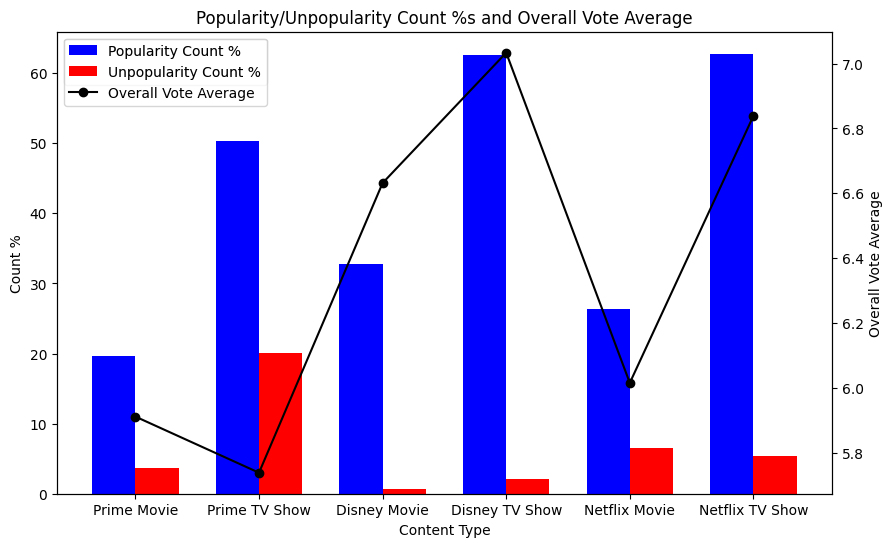

,Type,Popular Count,Unpopular Count,Total Count,Popularity Count %,Unpopularity Count %,Overall Vote Average
0,Prime Movie,1292,239,6571,19.66,3.64,5.911152
1,Prime TV Show,275,110,547,50.27,20.11,5.738009
2,Disney Movie,339,7,1033,32.82,0.68,6.631720
3,Disney TV Show,234,8,374,62.57,2.14,7.033741
4,Netflix Movie,995,244,3775,26.36,6.46,6.015155
5,Netflix TV Show,543,46,865,62.77,5.32,6.838901


In [112]:
# Use combination chart with bars for popularity and unpopularity count percentages and a line to indicate
# the overall vote average to provide a comprehensive view of the data in a single chart

# Create a new figure and a set of subplots.
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for popularity/unpopularity counts.
# Calculate the width of the bars and positions.
bar_width = 0.35
index = np.arange(len(all_AllContent["Type"]))

# Plot popularity count as a bar chart.
pop_Bars = ax1.bar(index, all_AllContent["Popularity Count %"], bar_width, label="Popularity Count %", color="b")

# Plot unpopularity count as a bar chart.
unpop_Bars = ax1.bar(index + bar_width, all_AllContent["Unpopularity Count %"], bar_width, label="Unpopularity Count %", color="r")

# Label the bars with the type of content.
ax1.set_xlabel("Content Type")
ax1.set_ylabel("Count %", color="black")
ax1.set_title("Popularity/Unpopularity Count %s and Overall Vote Average")
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(all_AllContent["Type"])
ax1.legend()

# Line chart for overall vote average.
# Create a second y-axis for the overall vote average.
ax2 = ax1.twinx()
line1 = ax2.plot(index + bar_width / 2, all_AllContent["Overall Vote Average"], "o-", color="k", label="Overall Vote Average")

# Label the line plot.
ax2.set_ylabel("Overall Vote Average", color="black")

# Combine the legends from both plots.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

# Show the plot.
plt.show()

# Display DataFrame
all_AllContent.head(10)

# Statistics Summary - All Content

The following section of code is used to prepare the statistics for the streaming services' content data - lower quartile, upper quartile, IQR, lower bound, upper bound, min, max, median, and standard deviation, including lower and upper bound outlier counts.

In [113]:
# Combined streaming services data distribution

#Create a dictionary for each streaming service category with its statistics
prime_Movie_stats = {
    "Category": "Prime Movie",
    "LowerQ": prime_Movies_LowQ,
    "UpperQ": prime_Movies_UpQ,
    "IQR": prime_Movies_IQR,
    "LowBnd": prime_Movies_LowBnd,
    "UpBnd": prime_Movies_UpBnd,
    "Min": prime_Movies_min,
    "Max": prime_Movies_max,
    "Median": prime_Movies_med,
    "Std Dev": prime_Movies_std
}

prime_TV_stats = {
    "Category": "Prime TV Show",
    "LowerQ": prime_TV_LowQ,
    "UpperQ": prime_TV_UpQ,
    "IQR": prime_TV_IQR,
    "LowBnd": prime_TV_LowBnd,
    "UpBnd": prime_TV_UpBnd,
    "Min": prime_TV_min,
    "Max": prime_TV_max,
    "Median": prime_TV_med,
    "Std Dev": prime_TV_std
}

disney_Movie_stats = {
    "Category": "Disney Movie",
    "LowerQ": disney_Movies_LowQ,
    "UpperQ": disney_Movies_UpQ,
    "IQR": disney_Movies_IQR,
    "LowBnd": disney_Movies_LowBnd,
    "UpBnd": disney_Movies_UpBnd,
    "Min": disney_Movies_min,
    "Max": disney_Movies_max,
    "Median": disney_Movies_med,
    "Std Dev": disney_Movies_std
}

disney_TV_stats = {
    "Category": "Disney TV Show",
    "LowerQ": disney_TV_LowQ,
    "UpperQ": disney_TV_UpQ,
    "IQR": disney_TV_IQR,
    "LowBnd": disney_TV_LowBnd,
    "UpBnd": disney_TV_UpBnd,
    "Min": disney_TV_min,
    "Max": disney_TV_max,
    "Median": disney_TV_med,
    "Std Dev": disney_TV_std
}

netflix_Movie_stats = {
    "Category": "Netflix Movie",
    "LowerQ": netflix_Movies_LowQ,
    "UpperQ": netflix_Movies_UpQ,
    "IQR": netflix_Movies_IQR,
    "LowBnd": netflix_Movies_LowBnd,
    "UpBnd": netflix_Movies_UpBnd,
    "Min": netflix_Movies_min,
    "Max": netflix_Movies_max,
    "Median": netflix_Movies_med,
    "Std Dev": netflix_Movies_std
}

netflix_TV_stats = {
    "Category": "Netflix TV Show",
    "LowerQ": netflix_TV_LowQ,
    "UpperQ": netflix_TV_UpQ,
    "IQR": netflix_TV_IQR,
    "LowBnd": netflix_TV_LowBnd,
    "UpBnd": netflix_TV_UpBnd,
    "Min": netflix_TV_min,
    "Max": netflix_TV_max,
    "Median": netflix_TV_med,
    "Std Dev": netflix_TV_std
}

# Combine the dictionaries into a list
all_stats_list = [
    prime_Movie_stats,
    prime_TV_stats,
    disney_Movie_stats,
    disney_TV_stats,
    netflix_Movie_stats,
    netflix_TV_stats
]

# Convert the list into a DataFrame
all_stats_df = pd.DataFrame(all_stats_list)
all_stats_df.head(10)

,Category,LowerQ,UpperQ,IQR,LowBnd,UpBnd,Min,Max,Median,Std Dev
0,Prime Movie,5.134,6.7670,1.6330,2.68450,9.21650,1.0,10.0,6.0000,1.401284
1,Prime TV Show,5.100,7.6225,2.5225,1.31625,11.40625,0.0,10.0,7.0000,2.961591
2,Disney Movie,6.134,7.1880,1.0540,4.55300,8.76900,2.0,10.0,6.6310,0.889080
3,Disney TV Show,6.500,7.7490,1.2490,4.62650,9.62250,2.0,10.0,7.2615,1.283308
4,Netflix Movie,5.600,7.0000,1.4000,3.50000,9.10000,0.0,10.0,6.3430,1.737335
5,Netflix TV Show,6.621,7.7810,1.1600,4.88100,9.52100,0.0,10.0,7.2000,1.738837


In [114]:
# Filter the respective movie and TV show DataFrames for the upper and lower bounds of each streaming service
# to determine outliers count (see next 5 cells for Prime TV Shows, Disney Movies and TV Shows, and Netflix Movies and 
# TV Shows):

# Prime Movies: Lower and Upper Bound (will comment out if no outliers noted)
prime_MoviesOutlr_LowBnd = prime_Movies_df["Vote Average"] < 2.68450
prime_MoviesOutlr_UpBnd = prime_Movies_df["Vote Average"] > 9.21650

# Use len to obtain the count of outliers
prime_MoviesOutlr_Cnt_LowBnd = len(prime_Movies_df[prime_MoviesOutlr_LowBnd])
prime_MoviesOutlr_Cnt_UpBnd = len(prime_Movies_df[prime_MoviesOutlr_UpBnd])

# Create a dictionary  to include the Category column
prime_MoviesOutlr_CountLB = {
    "Category": ["Prime Movie"],
    "LB Outlier Count": [prime_MoviesOutlr_Cnt_LowBnd],
}

prime_MoviesOutlr_CountUB = {
    "Category": ["Prime Movie"],
    "UB Outlier Count": [prime_MoviesOutlr_Cnt_UpBnd],
}

# Convert the dictionary into DataFrame
prime_MoviesOutlr_CountLB = pd.DataFrame(prime_MoviesOutlr_CountLB)
prime_MoviesOutlr_CountUB = pd.DataFrame(prime_MoviesOutlr_CountUB)

#prime_MoviesOutlr_CountLB.head()
#prime_MoviesOutlr_CountUB.head()

# Merge DataFrames
prime_MoviesOutlr_CountMrg = prime_MoviesOutlr_CountLB.merge(prime_MoviesOutlr_CountUB, on="Category", how="left")
prime_MoviesOutlr_CountMrg

,Category,LB Outlier Count,UB Outlier Count
0,Prime Movie,167,108


In [115]:
# Prime TV Shows: Lower and Upper Bound (will comment out if no outliers noted)
prime_TVOutlr_LowBnd = prime_TV_df["Vote Average"] < 1.31625
prime_TVOutlr_UpBnd = prime_TV_df["Vote Average"] > 11.40625

# Use len to obtain the count of outliers
prime_TVOutlr_Cnt_LowBnd = len(prime_TV_df[prime_TVOutlr_LowBnd])
prime_TVOutlr_Cnt_UpBnd = len(prime_TV_df[prime_TVOutlr_UpBnd])

# Create a dictionary  to include the Category column
prime_TVOutlr_CountLB = {
    "Category": ["Prime TV Show"],
    "LB Outlier Count": [prime_TVOutlr_Cnt_LowBnd],
}

prime_TVOutlr_CountUB = {
    "Category": ["Prime TV Show"],
    "UB Outlier Count": [prime_TVOutlr_Cnt_UpBnd],
}

# Convert the dictionary into DataFrame
prime_TVOutlr_CountLB = pd.DataFrame(prime_TVOutlr_CountLB)
prime_TVOutlr_CountUB = pd.DataFrame(prime_TVOutlr_CountUB)

#prime_TVOutlr_CountLB.head()
#prime_TVOutlr_CountUB.head()

# Merge DataFrames
prime_TVOutlr_CountMrg = prime_TVOutlr_CountLB.merge(prime_TVOutlr_CountUB, on="Category", how="left")
prime_TVOutlr_CountMrg

,Category,LB Outlier Count,UB Outlier Count
0,Prime TV Show,99,0


In [116]:
# Disney Movies: Lower and Upper Bound (will comment out if no outliers noted)
disney_MoviesOutlr_LowBnd = disney_Movies_df["Vote Average"] < 4.55300
disney_MoviesOutlr_UpBnd = disney_Movies_df["Vote Average"] > 8.76900

# Use len to obtain the count of outliers
disney_MoviesOutlr_Cnt_LowBnd = len(disney_Movies_df[disney_MoviesOutlr_LowBnd])
disney_MoviesOutlr_Cnt_UpBnd = len(disney_Movies_df[disney_MoviesOutlr_UpBnd])

# Create a dictionary  to include the Category column
disney_MoviesOutlr_CountLB = {
    "Category": ["Disney Movie"],
    "LB Outlier Count": [disney_MoviesOutlr_Cnt_LowBnd],
}

disney_MoviesOutlr_CountUB = {
    "Category": ["Disney Movie"],
    "UB Outlier Count": [disney_MoviesOutlr_Cnt_UpBnd],
}

# Convert the dictionary into DataFrame
disney_MoviesOutlr_CountLB = pd.DataFrame(disney_MoviesOutlr_CountLB)
disney_MoviesOutlr_CountUB = pd.DataFrame(disney_MoviesOutlr_CountUB)

#disney_MoviesOutlr_CountLB.head()
#disney_MoviesOutlr_CountUB.head()

# Merge DataFrames
disney_MoviesOutlr_CountMrg = disney_MoviesOutlr_CountLB.merge(disney_MoviesOutlr_CountUB, on="Category", how="left")
disney_MoviesOutlr_CountMrg

,Category,LB Outlier Count,UB Outlier Count
0,Disney Movie,21,9


In [117]:
# Disney TV Shows: Lower and Upper Bound (will comment out if no outliers noted)
disney_TVOutlr_LowBnd = disney_TV_df["Vote Average"] < 4.62650
disney_TVOutlr_UpBnd = disney_TV_df["Vote Average"] > 9.62250

# Use len to obtain the count of outliers
disney_TVOutlr_Cnt_LowBnd = len(disney_TV_df[disney_TVOutlr_LowBnd])
disney_TVOutlr_Cnt_UpBnd = len(disney_TV_df[disney_TVOutlr_UpBnd])

# Create a dictionary  to include the Category column
disney_TVOutlr_CountLB = {
    "Category": ["Disney TV Show"],
    "LB Outlier Count": [disney_TVOutlr_Cnt_LowBnd],
}

disney_TVOutlr_CountUB = {
    "Category": ["Disney TV Show"],
    "UB Outlier Count": [disney_TVOutlr_Cnt_UpBnd],
}

# Convert the dictionary into DataFrame
disney_TVOutlr_CountLB = pd.DataFrame(disney_TVOutlr_CountLB)
disney_TVOutlr_CountUB = pd.DataFrame(disney_TVOutlr_CountUB)

#disney_TVOutlr_CountLB.head()
#disney_TVOutlr_CountUB.head()

# Merge DataFrames
disney_TVOutlr_CountMrg = disney_TVOutlr_CountLB.merge(disney_TVOutlr_CountUB, on="Category", how="left")
disney_TVOutlr_CountMrg

,Category,LB Outlier Count,UB Outlier Count
0,Disney TV Show,12,8


In [118]:
# Netflix Movies: Lower and Upper Bound (will comment out if no outliers noted)
netflix_MoviesOutlr_LowBnd = netflix_Movies_df["Vote Average"] < 3.50000
netflix_MoviesOutlr_UpBnd = netflix_Movies_df["Vote Average"] > 9.10000

# Use len to obtain the count of outliers
netflix_MoviesOutlr_Cnt_LowBnd = len(netflix_Movies_df[netflix_MoviesOutlr_LowBnd])
netflix_MoviesOutlr_Cnt_UpBnd = len(netflix_Movies_df[netflix_MoviesOutlr_UpBnd])

# Create a dictionary  to include the Category column
netflix_MoviesOutlr_CountLB = {
    "Category": ["Netflix Movie"],
    "LB Outlier Count": [netflix_MoviesOutlr_Cnt_LowBnd],
}

netflix_MoviesOutlr_CountUB = {
    "Category": ["Netflix Movie"],
    "UB Outlier Count": [netflix_MoviesOutlr_Cnt_UpBnd],
}

# Convert the dictionary into DataFrame
netflix_MoviesOutlr_CountLB = pd.DataFrame(netflix_MoviesOutlr_CountLB)
netflix_MoviesOutlr_CountUB = pd.DataFrame(netflix_MoviesOutlr_CountUB)

#netflix_MoviesOutlr_CountLB.head()
#netflix_MoviesOutlr_CountUB.head()

# Merge DataFrames
netflix_MoviesOutlr_CountMrg = netflix_MoviesOutlr_CountLB.merge(netflix_MoviesOutlr_CountUB, on="Category", how="left")
netflix_MoviesOutlr_CountMrg

,Category,LB Outlier Count,UB Outlier Count
0,Netflix Movie,257,20


In [119]:
# Netflix TV Shows: Lower and Upper Bound (will comment out if no outliers noted)
netflix_TVOutlr_LowBnd = netflix_TV_df["Vote Average"] < 4.88100
netflix_TVOutlr_UpBnd = netflix_TV_df["Vote Average"] > 9.52100

# Use len to obtain the count of outliers
netflix_TVOutlr_Cnt_LowBnd = len(netflix_TV_df[netflix_TVOutlr_LowBnd])
netflix_TVOutlr_Cnt_UpBnd = len(netflix_TV_df[netflix_TVOutlr_UpBnd])

# Create a dictionary  to include the Category column
netflix_TVOutlr_CountLB = {
    "Category": ["Netflix TV Show"],
    "LB Outlier Count": [netflix_TVOutlr_Cnt_LowBnd],
}

netflix_TVOutlr_CountUB = {
    "Category": ["Netflix TV Show"],
    "UB Outlier Count": [netflix_TVOutlr_Cnt_UpBnd],
}

# Convert the dictionary into DataFrame
netflix_TVOutlr_CountLB = pd.DataFrame(netflix_TVOutlr_CountLB)
netflix_TVOutlr_CountUB = pd.DataFrame(netflix_TVOutlr_CountUB)

#netflix_TVOutlr_CountLB.head()
#netflix_TVOutlr_CountUB.head()

# Merge DataFrames
netflix_TVOutlr_CountMrg = netflix_TVOutlr_CountLB.merge(netflix_TVOutlr_CountUB, on="Category", how="left")
netflix_TVOutlr_CountMrg

,Category,LB Outlier Count,UB Outlier Count
0,Netflix TV Show,69,3


In [120]:
# Combine LB and UB Outlier Counts for all streaming services

# Use .concat() function to stack the movies and TV Shows LB and UB DataFrames (i.e., append the rows of 
# the TV Shows DataFrame under the movies one)
all_AllContent_LBUB = pd.concat([prime_MoviesOutlr_CountMrg, prime_TVOutlr_CountMrg, disney_MoviesOutlr_CountMrg, 
                                disney_TVOutlr_CountMrg, netflix_MoviesOutlr_CountMrg, netflix_TVOutlr_CountMrg
                                ]).reset_index(drop=True)

# Display DataFrame
all_AllContent_LBUB.head(10)

,Category,LB Outlier Count,UB Outlier Count
0,Prime Movie,167,108
1,Prime TV Show,99,0
2,Disney Movie,21,9
3,Disney TV Show,12,8
4,Netflix Movie,257,20
5,Netflix TV Show,69,3


# Box Plot Charts - All Content

The following code takes the individual streaming service content and "all_stats_df" DataFrames and creates box plots within the same figure.

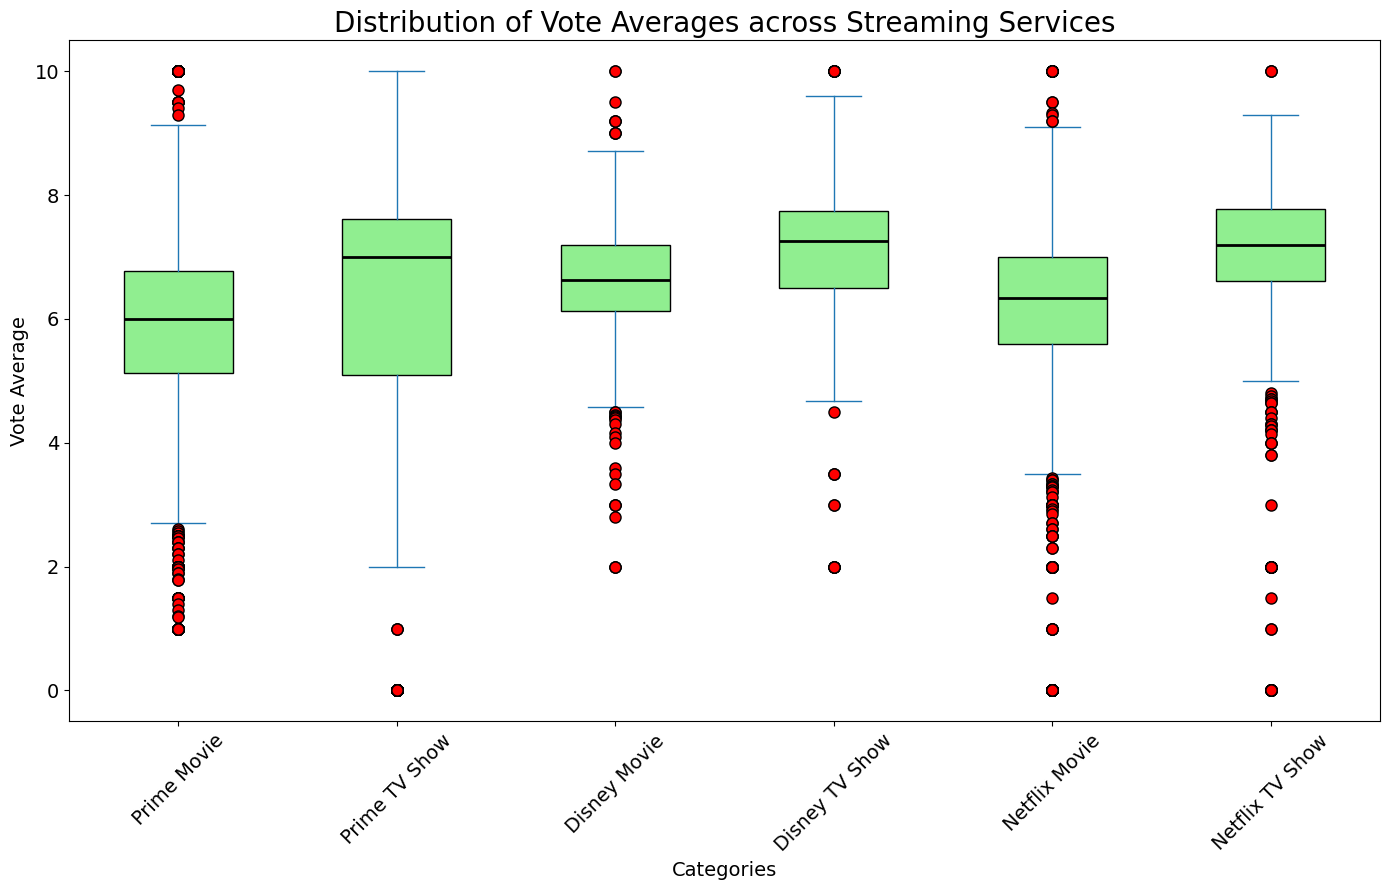

,Category,LowerQ,UpperQ,IQR,LowBnd,UpBnd,Min,Max,Median,Std Dev,LB Outlier Count,UB Outlier Count,Total Count,LB Outlier %,UB Outlier %
0,Prime Movie,5.134,6.7670,1.6330,2.68450,9.21650,1.0,10.0,6.0000,1.401284,167,108,6571,2.541470,1.643585
1,Prime TV Show,5.100,7.6225,2.5225,1.31625,11.40625,0.0,10.0,7.0000,2.961591,99,0,547,18.098720,0.000000
2,Disney Movie,6.134,7.1880,1.0540,4.55300,8.76900,2.0,10.0,6.6310,0.889080,21,9,1033,2.032914,0.871249
3,Disney TV Show,6.500,7.7490,1.2490,4.62650,9.62250,2.0,10.0,7.2615,1.283308,12,8,374,3.208556,2.139037
4,Netflix Movie,5.600,7.0000,1.4000,3.50000,9.10000,0.0,10.0,6.3430,1.737335,257,20,3775,6.807947,0.529801
5,Netflix TV Show,6.621,7.7810,1.1600,4.88100,9.52100,0.0,10.0,7.2000,1.738837,69,3,865,7.976879,0.346821


In [121]:
# Create a new DataFrame for box plot data, containing only 'Vote Average' for each category
box_plot_data = pd.DataFrame({
    "Prime Movie": prime_Movies_df["Vote Average"].dropna().reset_index(drop=True),
    "Prime TV Show": prime_TV_df["Vote Average"].dropna().reset_index(drop=True),
    "Disney Movie": disney_Movies_df["Vote Average"].dropna().reset_index(drop=True),
    "Disney TV Show": disney_TV_df["Vote Average"].dropna().reset_index(drop=True),
    "Netflix Movie": netflix_Movies_df["Vote Average"].dropna().reset_index(drop=True),
    "Netflix TV Show": netflix_TV_df["Vote Average"].dropna().reset_index(drop=True)
})

# Display DataFrame
#box_plot_data.head()

# Define the median line properties
medianprops = dict(linestyle="-", linewidth=2, color="black")

# Define the IQR box properties
boxprops = dict(facecolor="lightgreen", edgecolor="black")

# Format the outlier markers (i.e. fliers) with flierprops
flierprops = dict(marker="o", markerfacecolor="red", markersize=8, markeredgecolor="black")

# Plot the DataFrame using Pandas
ax = box_plot_data[["Prime Movie", "Prime TV Show", "Disney Movie", "Disney TV Show", "Netflix Movie", 
                    "Netflix TV Show" ]].plot(kind="box", figsize=(14,9), patch_artist=True, 
                    medianprops=medianprops, boxprops=boxprops, flierprops=flierprops)

# Add labels and a title
plt.title("Distribution of Vote Averages across Streaming Services", fontsize=20)
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Vote Average", fontsize=14)

# Adjust font size of x and y axis numbers (ticks)
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)


# Rotate the category names on x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

# Append the LB and UB outlier counts, total count, and LB and UB Outlier % to the all statistics DataFrame
all_stats_df["LB Outlier Count"] = all_AllContent_LBUB["LB Outlier Count"]
all_stats_df["UB Outlier Count"] = all_AllContent_LBUB["UB Outlier Count"]
all_stats_df["Total Count"] = all_AllContent["Total Count"]

# Calculate the LB and UB Outlier %s
all_stats_df["LB Outlier %"] = (all_stats_df["LB Outlier Count"] / all_stats_df["Total Count"]) * 100
all_stats_df["UB Outlier %"] = (all_stats_df["UB Outlier Count"] / all_stats_df["Total Count"]) * 100


# Display all statistics DataFrame
all_stats_df.head(10)

In [122]:
## Melanie Runser's code

In [199]:
#Reading in movie & tv data from Netflix & Disney+
DmoviesDF = pd.read_csv(r"..\Cleanish Data\By Country\Disney Movies(C).csv")
DtvDF = pd.read_csv(r"..\Cleanish Data\By Country\Disney TV(C).csv")
NetflixmoviesDF = pd.read_csv(r"..\Cleanish Data\By Country\Netflix Movies(C).csv")
NetflixtvDF = pd.read_csv(r"..\Cleanish Data\By Country\Netflix TV(C).csv")

#Hulu & Prime 
HuluDF = pd.read_csv("Libraries/hulu.csv")
PrimeDF = pd.read_csv("Libraries/primeVideo.csv")
PrimeDF.head(1)

,show_id,show_id.1,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,genre_1,genre_2,genre_3
0,0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,"Comedy, Drama, n/a",Comedy,Drama,NaN


In [200]:
# Added name of each service
DnameSeries = ("Disney")
DmoviesDF["Service"] = DnameSeries
DtvDF["Service"] = DnameSeries

NetflixnameSeries = ("Netflix")
NetflixmoviesDF["Service"] = NetflixnameSeries
NetflixtvDF["Service"] = NetflixnameSeries

PrimenameSeries = ("Prime video")
PrimeDF["Service"] = PrimenameSeries

HulunameSeries = ("Hulu")
HuluDF["Service"] = HulunameSeries

PrimeDF.head(1)
#HuluDF.head(1)

,show_id,show_id.1,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,genre_1,genre_2,genre_3,Service
0,0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,"Comedy, Drama, n/a",Comedy,Drama,NaN,Prime video


In [201]:
#Concatenate both datasets together
country_concatDF = pd.concat([DmoviesDF, DtvDF,  NetflixmoviesDF, NetflixtvDF], ignore_index=True)
#country_concatDF.to_csv('country_concat2.csv', index=True)

#Removed unnecessary columns
country_concatDF = country_concatDF[["Title", "Type", "Country", "Release Year", "Date Added", "Rating", "Vote Average", "Service"]]
country_concatDF.head(1)

,Title,Type,Country,Release Year,Date Added,Rating,Vote Average,Service
0,Far Away From Raven’s Home,Movie,Unknown,2021,"September 10, 2021",TV-G,10.0,Disney


In [202]:
#Read in the By Genre datasets:
DmoviesGDF = pd.read_csv(r"..\Cleanish Data\By Genre\Disney Movies(G).csv")
DtvGDF = pd.read_csv(r"..\Cleanish Data\By Genre\Disney TV(G).csv")

NetflixmoviesGDF = pd.read_csv(r"..\Cleanish Data\By Genre\Netflix Movies(G).csv")
NetflixtvGDF = pd.read_csv(r"..\Cleanish Data\By Genre\Netflix TV(G).csv")

In [203]:
# Added name of each service for the by Genre
DnameSeries = ("Disney")
DmoviesGDF["Service"] = DnameSeries
DtvGDF["Service"] = DnameSeries

NetflixnameSeries = ("Netflix")
NetflixmoviesGDF["Service"] = NetflixnameSeries
NetflixtvGDF["Service"] = NetflixnameSeries

DtvGDF.head(1)

,Unnamed: 0,Title,Type,Cast,Release Year,Date Added,Rating,Duration,Genre,Vote Average,Service
0,0,Disney Roll It Back (Shorts),TV Show,"Ramon Reed, Kaylin Hayman, Suzi Barrett, Tobie...",2019,"February 26, 2021",TV-Y7,1 Season,Comedy,10.0,Disney


In [204]:
#Concatenate genre datasets together
### COPY TO A CSV FILE

genre_concatDF = pd.concat([DmoviesGDF, DtvGDF,  NetflixmoviesGDF, NetflixtvGDF], ignore_index=True)
genre_concatDF.to_csv('genre_concat2.csv', index=True)

#Removed unnecessary columns
genre_concatDF = genre_concatDF[["Title", "Type", "Country", "Release Year", "Date Added", "Rating", "Vote Average", "Service", "Genre"]]
genre_concatDF.head(1)

#had to remove , "Genres"

,Title,Type,Country,Release Year,Date Added,Rating,Vote Average,Service,Genre
0,Far Away From Raven’s Home,Movie,NaN,2021,"September 10, 2021",TV-G,10.0,Disney,Comedy


In [205]:
#Adding columns for genre data to the country dataset
country_concatDF["Genre"] = ""
country_concatDF["Genres"] = ""
#country_concatDF.head(1)

In [206]:
# Merging both the country & genre datasets on the title column 
allDF = pd.merge(country_concatDF, genre_concatDF, on="Title")

#Removing unnecessary columns
allDF = allDF[["Title", "Type_x", "Country_x", "Release Year_x", "Date Added_x", "Service_x", "Genre_y"]]

#Renaming columns that were kept
allDF = allDF.rename(columns={"Country_x":"Country", "Type_x":"Type", "Release Year_x":"Release Year", "Date Added_x":"Date Added", "Service_x":"Service", "Genre_y":"Genre" })
allDF.head(1)

,Title,Type,Country,Release Year,Date Added,Service,Genre
0,Far Away From Raven’s Home,Movie,Unknown,2021,"September 10, 2021",Disney,Comedy


In [207]:
#Concat no. 2 since Hulu & Prime are different to standardize whole thing before another concat
HuluDF.columns = HuluDF.columns.astype(str)
HuluDF = HuluDF[["title", "type", "country", "release_year", "date_added", "Service", "genre_1"]]
#HuluDF = HuluDF.loc[HuluDF["title", "type", "country", "release_year", "date_added", "Service", "genre_1"]]
HuluDF = HuluDF.rename(columns={"title":"Title", "type":"Type", "country":"Country", "release_year":"Release Year", "date_added":"Date Added", "genre_1":"Genre"})
HuluDF.head(2)

,Title,Type,Country,Release Year,Date Added,Service,Genre
0,Ricky Velez: Here's Everything,Movie,NaN,2021,"October 24, 2021",Hulu,Comedy
1,Silent Night,Movie,NaN,2020,"October 23, 2021",Hulu,Crime


In [208]:
#### SAYS IT CAN'T FIND PRIME COLUMNS BY NAME - NOT IN INDEX


PrimeDF.columns = PrimeDF.columns.astype(str)
PrimeDF = PrimeDF[["title", "type", "country", "release_year", "date_added", "Service", "genre_1"]]
PrimeDF = PrimeDF.rename(columns={"title":"Title", "type":"Type", "country":"Country", "release_year":"Release Year", "date_added":"Date Added", "genre_1":"Genre"})
PrimeDF.head(2)

,Title,Type,Country,Release Year,Date Added,Service,Genre
0,The Grand Seduction,Movie,Canada,2014,"March 30, 2021",Prime video,Comedy
1,Take Care Good Night,Movie,India,2018,"March 30, 2021",Prime video,Drama


In [209]:
all4DF = pd.concat([allDF, HuluDF, PrimeDF], ignore_index=True)
#genre_concatDF = pd.concat([DmoviesGDF, DtvGDF,  NetflixmoviesGDF, NetflixtvGDF], ignore_index=True)
#all4DF.head(1)

#Revert to original name
allDF = all4DF
allDF.head()

,Title,Type,Country,Release Year,Date Added,Service,Genre
0,Far Away From Raven’s Home,Movie,Unknown,2021,"September 10, 2021",Disney,Comedy
1,Earth Live,Movie,United States,2017,"November 12, 2019",Disney,Animals & Nature
2,Earth Live,Movie,United States,2017,"November 12, 2019",Disney,Documentary
3,Earth Live,Movie,United States,2017,"November 12, 2019",Disney,Family
4,Women Of Impact: Changing The World,Movie,United States,2019,"June 5, 2020",Disney,Documentary


In [214]:
#Wrting the new combined data to a new csv file
allDF.to_csv('Mels allDF_final.csv', index=True)

In [215]:
#Writing file back in to make sure it all worked 
# MUST CHANGE BACK TO OTHER FILE PATH
allDF = pd.read_csv("Mels allDF_final.csv")

#Find original row count after data merge
len(allDF["Title"])

42675

In [216]:
#Trim function in python - all strings
strings = allDF.select_dtypes(['object'])
allDF[strings.columns] = strings.apply(lambda x: x.str.strip())

allDF.head()
allDF["Country"].unique()

array(['Unknown', 'United States', 'Canada', 'United Kingdom', 'France',
       'China', 'United Arab Emirates', 'Hong Kong', 'Germany',
       'Australia', 'New Zealand', 'India', 'Austria', 'South Africa',
       'Angola', 'Botswana', 'Namibia', 'Switzerland', 'Spain', 'Denmark',
       'Singapore', 'Thailand', 'Panama', 'Mexico', 'Taiwan', 'Tanzania',
       'Belgium', 'Brazil', 'Poland', 'Slovenia', 'Czech Republic',
       'Malaysia', 'Japan', 'South Korea', 'Russia', 'Kazakhstan',
       'Syria', 'Iran', 'Egypt', 'Pakistan', 'Ireland', 'Hungary',
       'Argentina', 'Philippines', 'Luxembourg', 'Guatemala', 'Chile',
       nan, 'Nigeria', 'Cambodia', 'Peru', 'Cayman Islands', 'Colombia',
       'Lebanon', 'Turkey', 'Italy', 'Netherlands', 'Vietnam', 'Norway',
       'Jordan', 'Qatar', 'Indonesia', 'Zimbabwe', 'Bangladesh',
       'Ukraine', 'Greece', 'Iceland', 'Sweden', 'Romania', 'Kenya',
       'Kuwait', 'Bulgaria', 'Serbia', 'Senegal', 'Finland', 'Israel',
       'Venezuela',

In [217]:
#Removing duplicate
allDF.drop_duplicates(subset=["Title", "Country", "Service"], keep="first", inplace=True)
len(allDF["Title"])

20258

In [218]:
#Value counts of titles by country → turned into DF to make easier to work with
titles_by_countryDF = pd.DataFrame(allDF["Country"].value_counts().reset_index().values, columns=["Country", "Title"])
titles_by_countryDF = titles_by_countryDF.sort_index(axis = 0, ascending=True)

#Ditch the "Unknown" country values
titles_by_countryDF = titles_by_countryDF.loc[titles_by_countryDF["Country"] != "Unknown"]
titles_by_countryDF.head(6)
top6 = pd.DataFrame(titles_by_countryDF.head(6).reset_index().values, columns=["", "Country", "Title"]) #wants 3 values
top6 = top6.drop(columns=[""]) #sometimes this works, sometimes it throws an error??
top6 = top6.sort_index(axis = 0, ascending=True) 

#Create DF of just the top6 to work with  → 12 is way too big
top6[["Country", "Title"]]
top6

,Country,Title
0,United States,4393
1,India,823
2,United Kingdom,666
3,Japan,428
4,Canada,371
5,France,252


In [219]:
allDF["Genre"].unique()

array(['Comedy', 'Animals & Nature', 'Documentary', 'Animation', 'Movies',
       'Drama', 'Family', 'Coming of Age', 'Fantasy', 'Action-Adventure',
       'Biographical', 'Crime', 'Concert Film', 'Lifestyle', 'Dance',
       'Anthology', 'Historical', 'Science Fiction', 'Sports', 'Musical',
       'Buddy', 'Variety', 'Reality', 'Docuseries', 'Series',
       'Game Show / Competition', 'Music', 'Kids', 'Talk Show',
       'Comedies', 'Dramas', 'Independent Movies', 'Stand-Up Comedy',
       'Action & Adventure', 'Horror Movies', 'Children & Family Movies',
       'Music & Musicals', 'Sports Movies', 'Documentaries',
       'Cult Movies', 'International Movies', 'Anime Features',
       'Thrillers', 'Classic Movies', 'Sci-Fi & Fantasy',
       'Romantic Movies', 'LGBTQ Movies', 'Anime Series',
       'International TV Shows', 'TV Horror', "Kids' TV",
       'Romantic TV Shows', 'Crime TV Shows', 'TV Action & Adventure',
       'TV Dramas', 'Classic & Cult TV', 'Reality TV', 'British TV 

In [220]:
genre_raw_count = len(allDF["Genre"].unique())
genre_raw_count

95

In [221]:
#1st pass of corrections
genre_corrections1 = {"Children & Family Movies": "1",
                     "Family": "2",
                     "Kids": "3",
                     "Kids' TV": "4",
                     "TV Action & Adventure": "5",
                     "Sci-Fi & Fantasy": "6"}


allDF["Genre"] = allDF["Genre"].replace(genre_corrections1)
allDF["Genre"].unique()

array(['Comedy', 'Animals & Nature', 'Documentary', 'Animation', 'Movies',
       'Drama', '2', 'Coming of Age', 'Fantasy', 'Action-Adventure',
       'Biographical', 'Crime', 'Concert Film', 'Lifestyle', 'Dance',
       'Anthology', 'Historical', 'Science Fiction', 'Sports', 'Musical',
       'Buddy', 'Variety', 'Reality', 'Docuseries', 'Series',
       'Game Show / Competition', 'Music', '3', 'Talk Show', 'Comedies',
       'Dramas', 'Independent Movies', 'Stand-Up Comedy',
       'Action & Adventure', 'Horror Movies', '1', 'Music & Musicals',
       'Sports Movies', 'Documentaries', 'Cult Movies',
       'International Movies', 'Anime Features', 'Thrillers',
       'Classic Movies', '6', 'Romantic Movies', 'LGBTQ Movies',
       'Anime Series', 'International TV Shows', 'TV Horror', '4',
       'Romantic TV Shows', 'Crime TV Shows', '5', 'TV Dramas',
       'Classic & Cult TV', 'Reality TV', 'British TV Shows',
       'TV Comedies', 'Stand-Up Comedy & Talk Shows', 'TV Shows',
      

In [222]:
#2nd pass of genre corrections
genre_corrections2 = {"Action-Adventure":"Action & Adventure",
                      "TV Comedy":"Comedy",
                      "TV Drama":"Drama",
                      "TV Horror": "Horror",
                    "Comedies": "Comedy",
                    "Dramas":"Drama",
                    "1": "Kids & Family",
                    "2": "Kids & Family",
                    "3": "Kids & Family",
                     "Docuseries": "Documentary",
                     "Documentaries": "Documentary",
                     "Fantasy": "Sci-Fi & Fantasy",
                     "6": "Sci-Fi & Fantasy"}
                    
allDF["Genre"] = allDF["Genre"].replace(genre_corrections2, regex=True)
allDF["Genre"].unique()

array(['Comedy', 'Animals & Nature', 'Documentary', 'Animation', 'Movies',
       'Drama', 'Kids & Family', 'Coming of Age', 'Sci-Fi & Fantasy',
       'Action & Adventure', 'Biographical', 'Crime', 'Concert Film',
       'Lifestyle', 'Dance', 'Anthology', 'Historical', 'Science Fiction',
       'Sports', 'Musical', 'Buddy', 'Variety', 'Reality', 'Series',
       'Game Show / Competition', 'Music', 'Talk Show',
       'Independent Movies', 'Stand-Up Comedy', 'Horror Movies',
       'Music & Musicals', 'Sports Movies', 'Cult Movies',
       'International Movies', 'Anime Features', 'Thrillers',
       'Classic Movies', 'Romantic Movies', 'LGBTQ Movies',
       'Anime Series', 'International TV Shows', 'Horror', '4',
       'Romantic TV Shows', 'Crime TV Shows', '5', 'Classic & Cult TV',
       'Reality TV', 'British TV Shows', 'TV Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Shows',
       'Spanish-Language TV Shows', 'Action', 'Cooking & Food', 'News',
       'History', 'Thrille

In [223]:
len(allDF["Genre"].unique())

85

In [224]:
#Decided where to split the top of the stack → chose > 400 
#Need to replace value 
genre_countsDF = pd.DataFrame(allDF[["Genre"]].value_counts().reset_index().values, columns=["Genre", "Title"])
genre_countsDF = genre_countsDF.loc[genre_countsDF["Title"] > 400]
genre_countsDF

,Genre,Title
0,Drama,4010
1,Comedy,3032
2,Action,2212
3,Documentary,2171
4,Action & Adventure,1341
5,Kids & Family,954
6,Animation,868
7,Horror,689
8,Arts Entertainment and Culture,457


In [225]:
genre_countsDF["Title"].sum()

15734

In [226]:
#Multiple groupby so I don't have to write so much - copy from above

#### HERE IS WHERE THE GROUPED DF BREAKS

groupedDF = allDF.groupby(["Country", "Service", "Genre"]).size().reset_index(name="Count") 
groupedDF = groupedDF.loc[(groupedDF["Country"] == "United States") | (groupedDF["Country"] == "United Kingdom") | (groupedDF["Country"] == "India") | (groupedDF["Country"] == "France") | (groupedDF["Country"] == "Canada") | (groupedDF["Country"] == "Japan")]
groupedDF = groupedDF.loc[(groupedDF["Genre"] == "Drama") | (groupedDF["Genre"] == "Comedy") | (groupedDF["Genre"] == "Action & Adventure") | (groupedDF["Genre"] == "Documentary") | (groupedDF["Genre"] == "Kids & Family")]
groupedDF.head(10)

,Country,Service,Genre,Count
106,Canada,Disney,Action & Adventure,31
111,Canada,Disney,Comedy,16
114,Canada,Disney,Documentary,3
115,Canada,Disney,Drama,3
120,Canada,Hulu,Comedy,7
122,Canada,Hulu,Documentary,3
123,Canada,Hulu,Drama,6
125,Canada,Hulu,Kids & Family,4
128,Canada,Netflix,Action & Adventure,32
132,Canada,Netflix,Comedy,21


In [227]:
canada_groupedDF = groupedDF.loc[groupedDF["Country"] == "Canada"]
all_canada_groupedDF = canada_groupedDF.groupby(["Country", "Genre"]).sum()
all_canada_groupedDF = all_canada_groupedDF.drop(columns=["Service"])
all_canada_groupedDF = all_canada_groupedDF.reset_index()

japan_groupedDF = groupedDF.loc[groupedDF["Country"] == "Japan"]
all_japan_groupedDF = japan_groupedDF.groupby(["Country", "Genre"]).sum()
all_japan_groupedDF = all_japan_groupedDF.drop(columns=["Service"])
all_japan_groupedDF = all_japan_groupedDF.reset_index()


US_groupedDF = groupedDF.loc[groupedDF["Country"] == "United States"]
all_US_groupedDF = US_groupedDF.groupby(["Country", "Genre"]).sum()
all_US_groupedDF = all_US_groupedDF.drop(columns=["Service"])
all_US_groupedDF = all_US_groupedDF.reset_index()


UK_groupedDF = groupedDF.loc[groupedDF["Country"] == "United Kingdom"]
all_UK_groupedDF = UK_groupedDF.groupby(["Country", "Genre"]).sum()
all_UK_groupedDF = all_UK_groupedDF.drop(columns=["Service"])
all_UK_groupedDF = all_UK_groupedDF.reset_index()


france_groupedDF = groupedDF.loc[groupedDF["Country"] == "France"]
all_france_groupedDF = france_groupedDF.groupby(["Country", "Genre"]).sum()
all_france_groupedDF = all_france_groupedDF.drop(columns=["Service"])
all_france_groupedDF = all_france_groupedDF.reset_index()


india_groupedDF = groupedDF.loc[groupedDF["Country"] == "India"]
all_india_groupedDF = india_groupedDF.groupby(["Country", "Genre"]).sum()
all_india_groupedDF = all_india_groupedDF.drop(columns=["Service"])
all_india_groupedDF = all_india_groupedDF.reset_index()


all_india_groupedDF

,Country,Genre,Count
0,India,Action & Adventure,76
1,India,Comedy,224
2,India,Documentary,17
3,India,Drama,314
4,India,Kids & Family,17


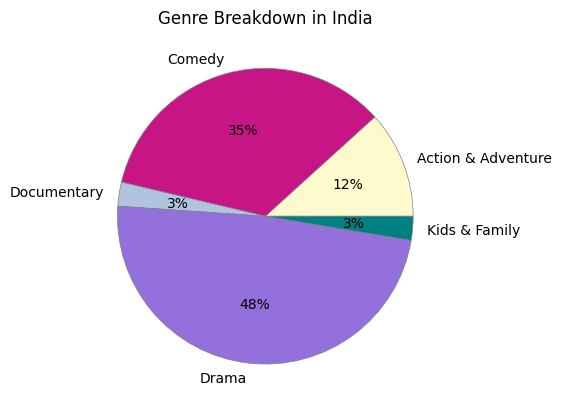

<Figure size 640x480 with 0 Axes>

In [228]:
#GENRE BY COUNTRY - INDIA
genres = all_india_groupedDF["Genre"]
counts = all_india_groupedDF["Count"]
labels = all_india_groupedDF["Genre"]
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

plt.pie(counts, labels=labels, colors=colors, autopct="%1.f%%", 
        wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': .5, 
                      'antialiased': True}) 
plt.title("Genre Breakdown in India") 
plt.show()
plt.savefig("Genre Breakdown in India.png") 


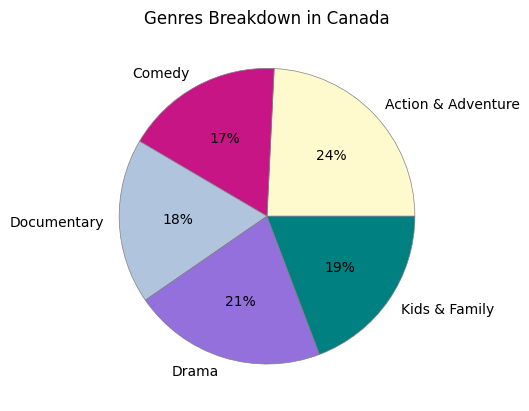

<Figure size 640x480 with 0 Axes>

In [229]:
#GENRE BY COUNTRY
genres = all_canada_groupedDF["Genre"]
counts = all_canada_groupedDF["Count"]
labels = all_canada_groupedDF["Genre"]
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

plt.pie(counts, labels=labels, colors=colors, autopct="%1.f%%", wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': .5, 
                      'antialiased': True})
plt.title("Genres Breakdown in Canada") 
plt.show()
plt.savefig("Genre Breakdown in Canada.png") 

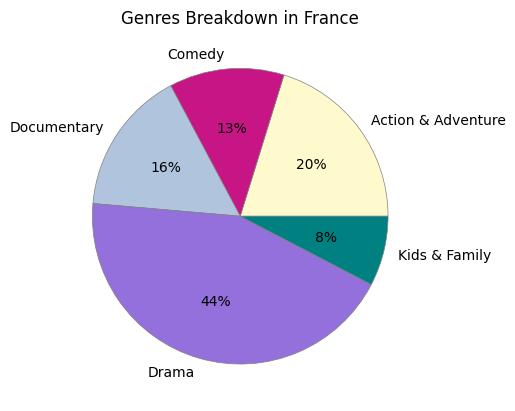

<Figure size 640x480 with 0 Axes>

In [230]:
#GENRE BY COUNTRY
genres = all_france_groupedDF["Genre"] 
counts = all_france_groupedDF["Count"]
labels = all_france_groupedDF["Genre"]
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

plt.pie(counts, labels=labels, colors=colors, autopct="%1.f%%", wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': .5, 
                      'antialiased': True})
plt.title("Genres Breakdown in France") 
plt.show()
plt.savefig("Genre Breakdown in France.png") 

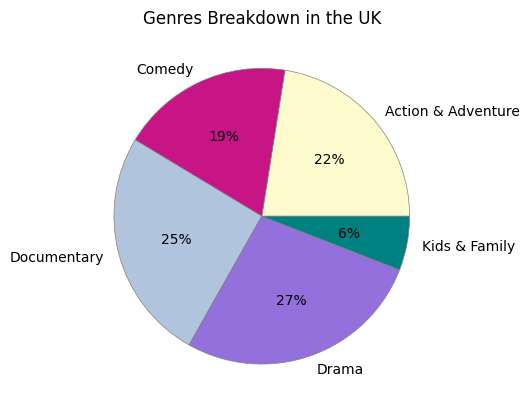

<Figure size 640x480 with 0 Axes>

In [231]:
#GENRE BY COUNTRY
genres = all_UK_groupedDF["Genre"] 
counts = all_UK_groupedDF["Count"]
labels = all_UK_groupedDF["Genre"]
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

plt.pie(counts, labels=labels, colors=colors, autopct="%1.f%%", wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': .5, 
                      'antialiased': True}) 
plt.title("Genres Breakdown in the UK") 
plt.show()
plt.savefig("Genre Breakdown in the UK.png") 


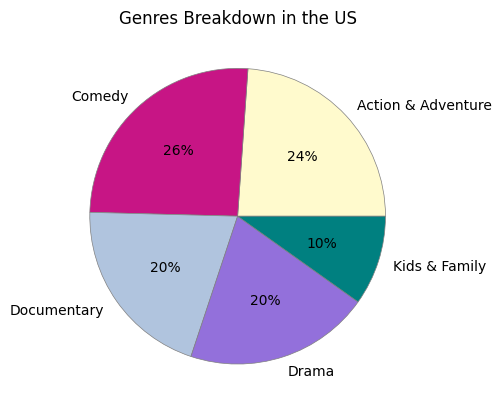

<Figure size 640x480 with 0 Axes>

In [232]:
#GENRE BY COUNTRY
genres = all_US_groupedDF["Genre"] 
counts = all_US_groupedDF["Count"]
labels = all_US_groupedDF["Genre"]
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

plt.pie(counts, labels=labels, colors=colors, autopct="%1.f%%", wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': .5, 
                      'antialiased': True}) 
plt.title("Genres Breakdown in the US") 
plt.show()
plt.savefig("Genre Breakdown in the US.png") 

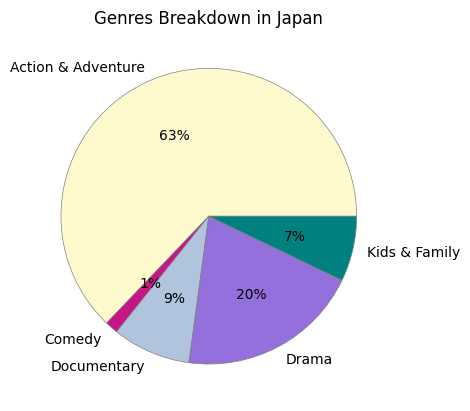

<Figure size 640x480 with 0 Axes>

In [233]:
#GENRE BY COUNTRY
genres = all_japan_groupedDF["Genre"] 
counts = all_japan_groupedDF["Count"]
labels = all_japan_groupedDF["Genre"]
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

plt.pie(counts, labels=labels, colors=colors, autopct="%1.f%%", wedgeprops = {"edgecolor" : "gray", 
                      'linewidth': .5, 
                      'antialiased': True})
plt.title("Genres Breakdown in Japan") 
plt.show()
plt.savefig("Genre Breakdown in Japan.png") 

In [234]:
#Find percentages to load them into a stacked bar chart

total_count = all_japan_groupedDF["Count"].sum()
all_japan_groupedDF["Ratio"] = (all_japan_groupedDF["Count"] / total_count) * 100
all_japan_groupedDF["Ratio"] = all_japan_groupedDF["Ratio"].round(2)

total_count = all_canada_groupedDF["Count"].sum()
all_canada_groupedDF["Ratio"] = (all_canada_groupedDF["Count"] / total_count) * 100
all_canada_groupedDF["Ratio"] = all_canada_groupedDF["Ratio"].round(2)

total_count = all_UK_groupedDF["Count"].sum()
all_UK_groupedDF["Ratio"] = (all_UK_groupedDF["Count"] / total_count) * 100
all_UK_groupedDF["Ratio"] = all_UK_groupedDF["Ratio"].round(2)

total_count = all_US_groupedDF["Count"].sum()
all_US_groupedDF["Ratio"] = (all_US_groupedDF["Count"] / total_count) * 100
all_US_groupedDF["Ratio"] = all_US_groupedDF["Ratio"].round(2)

total_count = all_france_groupedDF["Count"].sum()
all_france_groupedDF["Ratio"] = (all_france_groupedDF["Count"] / total_count) * 100
all_france_groupedDF["Ratio"] = all_france_groupedDF["Ratio"].round(2)

all_france_groupedDF

,Country,Genre,Count,Ratio
0,France,Action & Adventure,37,20.22
1,France,Comedy,23,12.57
2,France,Documentary,29,15.85
3,France,Drama,80,43.72
4,France,Kids & Family,14,7.65


In [235]:
import functools

In [236]:
#Merge all the countries back together
remergedDF = pd.concat([all_france_groupedDF, all_canada_groupedDF, all_UK_groupedDF, 
                       all_US_groupedDF, all_japan_groupedDF], axis=0, ignore_index=True)

remergedDF.head()

,Country,Genre,Count,Ratio
0,France,Action & Adventure,37,20.22
1,France,Comedy,23,12.57
2,France,Documentary,29,15.85
3,France,Drama,80,43.72
4,France,Kids & Family,14,7.65


In [237]:
#Stacked bar
remergedDF = remergedDF.groupby(["Country", "Genre"])["Ratio"].sum()

#Unstack to get genre as columns
unstacked_df = remergedDF.unstack().fillna(0)

unstacked_df

Genre,Action & Adventure,Comedy,Documentary,Drama,Kids & Family
Country,,,,,
Canada,24.23,17.31,18.08,21.15,19.23
France,20.22,12.57,15.85,43.72,7.65
Japan,62.86,1.43,8.57,20.00,7.14
United Kingdom,22.50,18.86,25.45,27.27,5.91
United States,23.89,25.70,20.30,20.27,9.84


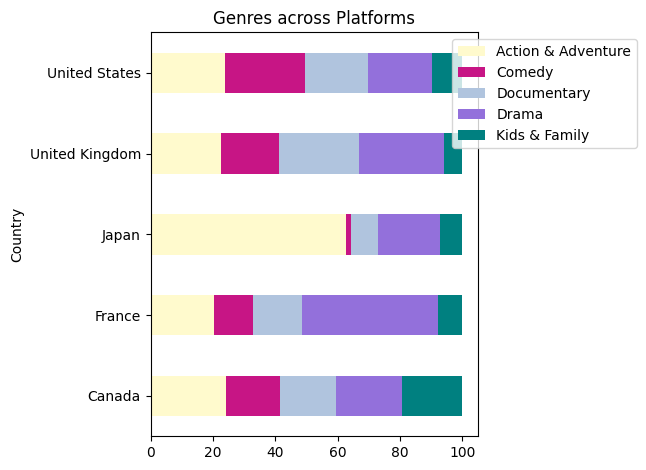

<Figure size 640x480 with 0 Axes>

In [238]:
colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

unstacked_df.plot(kind="barh", stacked=True, color=colors)

plt.title("Genres across Platforms") 
#plt.xlabel("Country") 
#plt.ylabel("# of Titles") 
plt.legend(bbox_to_anchor=(.9, 1.0), loc="upper left")
plt.tight_layout()

plt.show()
plt.savefig("Genre Across Platforms.png") 


In [239]:
groupedDF.head()
netflix_groupedDF = groupedDF.loc[groupedDF["Service"] == "Netflix"]
disney_groupedDF = groupedDF.loc[groupedDF["Service"] == "Disney"]

netflix_groupedDF.head()

,Country,Service,Genre,Count
128,Canada,Netflix,Action & Adventure,32
132,Canada,Netflix,Comedy,21
134,Canada,Netflix,Documentary,34
135,Canada,Netflix,Drama,43
141,Canada,Netflix,Kids & Family,46


In [240]:
netflix_canada_groupedDF = netflix_groupedDF.loc[netflix_groupedDF["Country"] == "Canada"]
netflix_all_canada_groupedDF = netflix_canada_groupedDF.groupby(["Country", "Count"]).sum()
netflix_all_canada_groupedDF = netflix_all_canada_groupedDF.drop(columns=["Service"])
netflix_all_canada_groupedDF = netflix_all_canada_groupedDF.reset_index()
total_count = netflix_all_canada_groupedDF["Count"].sum()
netflix_all_canada_groupedDF["Ratio"] = (netflix_all_canada_groupedDF["Count"] / total_count) * 100
netflix_all_canada_groupedDF["Ratio"] = netflix_all_canada_groupedDF["Ratio"].round(2)
#

netflix_france_groupedDF = netflix_groupedDF.loc[netflix_groupedDF["Country"] == "France"]
netflix_all_france_groupedDF = netflix_france_groupedDF.groupby(["Country", "Count"]).sum()
netflix_all_france_groupedDF = netflix_all_france_groupedDF.drop(columns=["Service"])
netflix_all_france_groupedDF = netflix_all_france_groupedDF.reset_index()
total_count = netflix_all_france_groupedDF["Count"].sum()
netflix_all_france_groupedDF["Ratio"] = (netflix_all_france_groupedDF["Count"] / total_count) * 100
netflix_all_france_groupedDF["Ratio"] = netflix_all_france_groupedDF["Ratio"].round(2)
#

netflix_UK_groupedDF = netflix_groupedDF.loc[netflix_groupedDF["Country"] == "United Kingdom"]
netflix_all_UK_groupedDF = netflix_UK_groupedDF.groupby(["Country", "Count"]).sum()
netflix_all_UK_groupedDF = netflix_all_UK_groupedDF.drop(columns=["Service"])
netflix_all_UK_groupedDF = netflix_all_UK_groupedDF.reset_index()
total_count = netflix_all_UK_groupedDF["Count"].sum()
netflix_all_UK_groupedDF["Ratio"] = (netflix_all_UK_groupedDF["Count"] / total_count) * 100
netflix_all_UK_groupedDF["Ratio"] = netflix_all_UK_groupedDF["Ratio"].round(2)
#

netflix_US_groupedDF = netflix_groupedDF.loc[netflix_groupedDF["Country"] == "United States"]
netflix_all_US_groupedDF = netflix_US_groupedDF.groupby(["Country", "Count"]).sum()
netflix_all_US_groupedDF = netflix_all_US_groupedDF.drop(columns=["Service"])
netflix_all_US_groupedDF = netflix_all_US_groupedDF.reset_index()
total_count = netflix_all_US_groupedDF["Count"].sum()
netflix_all_US_groupedDF["Ratio"] = (netflix_all_US_groupedDF["Count"] / total_count) * 100
netflix_all_US_groupedDF["Ratio"] = netflix_all_US_groupedDF["Ratio"].round(2)
#

netflix_japan_groupedDF = netflix_groupedDF.loc[netflix_groupedDF["Country"] == "Japan"]
netflix_all_japan_groupedDF = netflix_japan_groupedDF.groupby(["Country", "Count"]).sum()
netflix_all_japan_groupedDF = netflix_all_japan_groupedDF.drop(columns=["Service"])
netflix_all_japan_groupedDF = netflix_all_japan_groupedDF.reset_index()
total_count = netflix_all_japan_groupedDF["Count"].sum()
netflix_all_japan_groupedDF["Ratio"] = (netflix_all_japan_groupedDF["Count"] / total_count) * 100
netflix_all_japan_groupedDF["Ratio"] = netflix_all_japan_groupedDF["Ratio"].round(2)


netflix_all_japan_groupedDF = netflix_all_japan_groupedDF.loc[netflix_all_japan_groupedDF["Genre"] != "DocumentaryKids & Family"]
netflix_all_canada_groupedDF

,Country,Count,Genre,Ratio
0,Canada,21,Comedy,11.93
1,Canada,32,Action & Adventure,18.18
2,Canada,34,Documentary,19.32
3,Canada,43,Drama,24.43
4,Canada,46,Kids & Family,26.14


In [241]:
#Merge all the countries with Netflix back together
netflix_remergedDF = pd.concat([netflix_all_france_groupedDF, netflix_all_canada_groupedDF, netflix_all_UK_groupedDF, 
                       netflix_all_US_groupedDF, netflix_all_japan_groupedDF], axis=0, ignore_index=True)

netflix_remergedDF.head(1)

,Country,Count,Genre,Ratio
0,France,14,Kids & Family,8.38


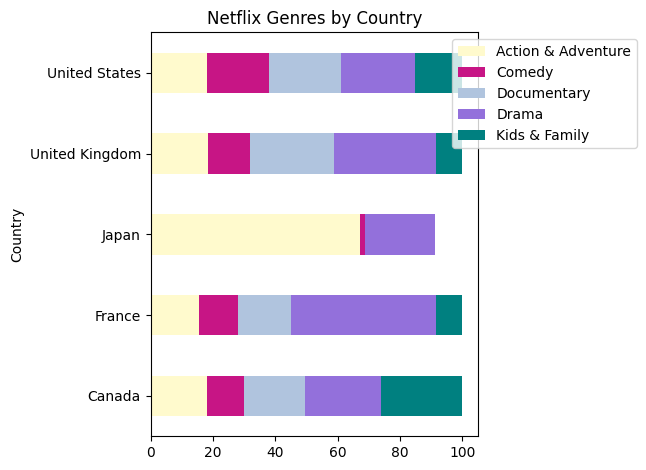

<Figure size 640x480 with 0 Axes>

In [242]:
#Stacked bar - Netflix
netflix_remergedDF = netflix_remergedDF.groupby(["Country", "Genre"])["Ratio"].sum()

#Unstack to get genre as columns
netflix_unstacked_df = netflix_remergedDF.unstack().fillna(0)

colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

netflix_unstacked_df.plot(kind="barh", stacked=True, color=colors)

plt.title("Netflix Genres by Country") 
plt.legend(bbox_to_anchor=(.9, 1.0), loc="upper left")
plt.tight_layout()

plt.show()
plt.savefig("Netflix Genres by Country.png") 

In [243]:
disney_canada_groupedDF = disney_groupedDF.loc[disney_groupedDF["Country"] == "Canada"]
disney_all_canada_groupedDF = disney_canada_groupedDF.groupby(["Country", "Count"]).sum()
disney_all_canada_groupedDF = disney_all_canada_groupedDF.drop(columns=["Service"])
disney_all_canada_groupedDF = disney_all_canada_groupedDF.reset_index()
total_count = disney_all_canada_groupedDF["Count"].sum()
disney_all_canada_groupedDF["Ratio"] = (disney_all_canada_groupedDF["Count"] / total_count) * 100
disney_all_canada_groupedDF["Ratio"] = disney_all_canada_groupedDF["Ratio"].round(2)
#

disney_france_groupedDF = disney_groupedDF.loc[disney_groupedDF["Country"] == "France"]
disney_all_france_groupedDF = disney_france_groupedDF.groupby(["Country", "Count"]).sum()
disney_all_france_groupedDF = disney_all_france_groupedDF.drop(columns=["Service"])
disney_all_france_groupedDF = disney_all_france_groupedDF.reset_index()
disney_all_france_groupedDF = disney_all_france_groupedDF.loc[disney_all_france_groupedDF["Genre"] != "ComedyDocumentary"] #

total_count = disney_all_france_groupedDF["Count"].sum()
disney_all_france_groupedDF["Ratio"] = (disney_all_france_groupedDF["Count"] / total_count) * 100
disney_all_france_groupedDF["Ratio"] = disney_all_france_groupedDF["Ratio"].round(2)
#

disney_UK_groupedDF = disney_groupedDF.loc[disney_groupedDF["Country"] == "United Kingdom"]
disney_all_UK_groupedDF = disney_UK_groupedDF.groupby(["Country", "Count"]).sum()
disney_all_UK_groupedDF = disney_all_UK_groupedDF.drop(columns=["Service"])
disney_all_UK_groupedDF = disney_all_UK_groupedDF.reset_index()
total_count = disney_all_UK_groupedDF["Count"].sum()
disney_all_UK_groupedDF["Ratio"] = (disney_all_UK_groupedDF["Count"] / total_count) * 100
disney_all_UK_groupedDF["Ratio"] = disney_all_UK_groupedDF["Ratio"].round(2)
#

disney_US_groupedDF = disney_groupedDF.loc[disney_groupedDF["Country"] == "United States"]
disney_all_US_groupedDF = disney_US_groupedDF.groupby(["Country", "Count"]).sum()
disney_all_US_groupedDF = disney_all_US_groupedDF.drop(columns=["Service"])
disney_all_US_groupedDF = disney_all_US_groupedDF.reset_index()
total_count = disney_all_US_groupedDF["Count"].sum()
disney_all_US_groupedDF["Ratio"] = (disney_all_US_groupedDF["Count"] / total_count) * 100
disney_all_US_groupedDF["Ratio"] = disney_all_US_groupedDF["Ratio"].round(2)
#

disney_japan_groupedDF = disney_groupedDF.loc[disney_groupedDF["Country"] == "Japan"]
disney_all_japan_groupedDF = disney_japan_groupedDF.groupby(["Country", "Count"]).sum()
disney_all_japan_groupedDF = disney_all_japan_groupedDF.drop(columns=["Service"])
disney_all_japan_groupedDF = disney_all_japan_groupedDF.reset_index()
total_count = disney_all_japan_groupedDF["Count"].sum()
disney_all_japan_groupedDF["Ratio"] = (disney_all_japan_groupedDF["Count"] / total_count) * 100
disney_all_japan_groupedDF["Ratio"] = disney_all_japan_groupedDF["Ratio"].round(2)

disney_all_france_groupedDF

,Country,Count,Genre,Ratio
1,France,11,Action & Adventure,100.0


In [244]:
#Merge all the countries with Disney back together
disney_remergedDF = pd.concat([disney_all_france_groupedDF, disney_all_canada_groupedDF, disney_all_UK_groupedDF, 
                       disney_all_US_groupedDF, disney_all_japan_groupedDF], axis=0, ignore_index=True)

disney_remergedDF = disney_remergedDF.loc[disney_remergedDF["Genre"] != "ComedyDocumentary"]  
disney_remergedDF = disney_remergedDF.loc[disney_remergedDF["Genre"] != "DocumentaryDrama"]
disney_remergedDF = disney_remergedDF.loc[disney_remergedDF["Genre"] != "DramaKids & Family"]
disney_remergedDF

,Country,Count,Genre,Ratio
0,France,11,Action & Adventure,100.00
2,Canada,16,Comedy,32.00
3,Canada,31,Action & Adventure,62.00
5,United Kingdom,8,Comedy,11.27
6,United Kingdom,16,Documentary,22.54
7,United Kingdom,46,Action & Adventure,64.79
8,United States,15,Kids & Family,2.22
9,United States,23,Drama,3.41
10,United States,60,Documentary,8.89
11,United States,179,Comedy,26.52


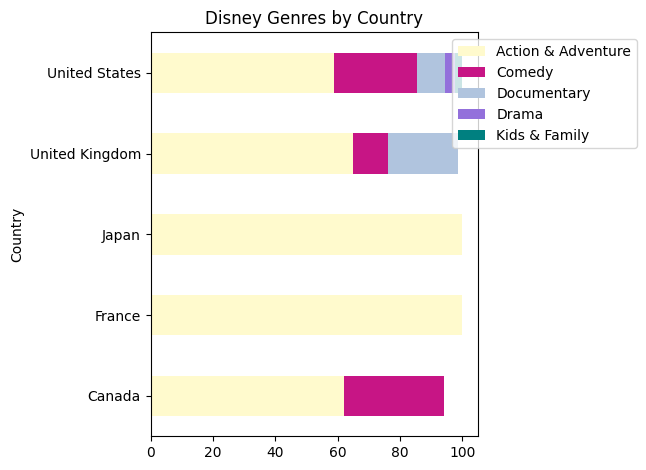

<Figure size 640x480 with 0 Axes>

In [245]:
#Stacked bar - Disney
disney_remergedDF = disney_remergedDF.groupby(["Country", "Genre"])["Ratio"].sum()

#Unstack to get genre as columns
disney_unstacked_df = disney_remergedDF.unstack().fillna(0)

colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

disney_unstacked_df.plot(kind="barh", stacked=True, color=colors)

plt.title("Disney Genres by Country") 
plt.legend(bbox_to_anchor=(.9, 1.0), loc="upper left")
plt.tight_layout()

plt.show()
plt.savefig("Disney Genres by Country.png") 

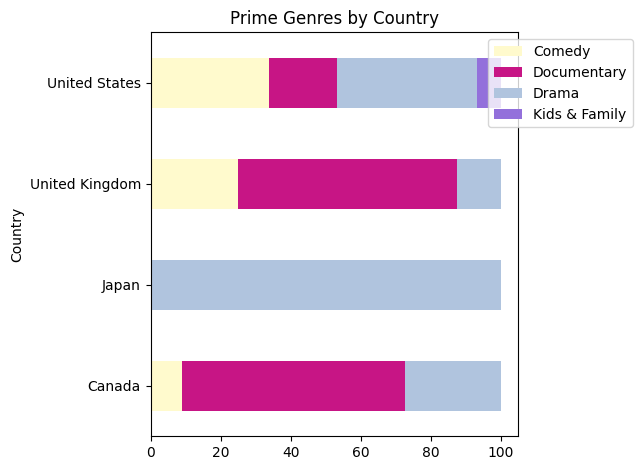

<Figure size 640x480 with 0 Axes>

In [246]:
Prime_groupedDF = groupedDF.loc[groupedDF["Service"] == "Prime video"]

Prime_canada_groupedDF = Prime_groupedDF.loc[Prime_groupedDF["Country"] == "Canada"]
Prime_all_canada_groupedDF = Prime_canada_groupedDF.groupby(["Country", "Count"]).sum()
Prime_all_canada_groupedDF = Prime_all_canada_groupedDF.drop(columns=["Service"])
Prime_all_canada_groupedDF = Prime_all_canada_groupedDF.reset_index()
total_count = Prime_all_canada_groupedDF["Count"].sum()
Prime_all_canada_groupedDF["Ratio"] = (Prime_all_canada_groupedDF["Count"] / total_count) * 100
Prime_all_canada_groupedDF["Ratio"] = Prime_all_canada_groupedDF["Ratio"].round(2)
#

Prime_france_groupedDF = Prime_groupedDF.loc[Prime_groupedDF["Country"] == "France"]
Prime_all_france_groupedDF = Prime_france_groupedDF.groupby(["Country", "Count"]).sum()
Prime_all_france_groupedDF = Prime_all_france_groupedDF.drop(columns=["Service"])
Prime_all_france_groupedDF = Prime_all_france_groupedDF.reset_index()
Prime_all_france_groupedDF = Prime_all_france_groupedDF.loc[Prime_all_france_groupedDF["Genre"] != "ComedyDocumentary"] #

total_count = Prime_all_france_groupedDF["Count"].sum()
Prime_all_france_groupedDF["Ratio"] = (Prime_all_france_groupedDF["Count"] / total_count) * 100
Prime_all_france_groupedDF["Ratio"] = Prime_all_france_groupedDF["Ratio"].round(2)
#

Prime_UK_groupedDF = Prime_groupedDF.loc[Prime_groupedDF["Country"] == "United Kingdom"]
Prime_all_UK_groupedDF = Prime_UK_groupedDF.groupby(["Country", "Count"]).sum()
Prime_all_UK_groupedDF = Prime_all_UK_groupedDF.drop(columns=["Service"])
Prime_all_UK_groupedDF = Prime_all_UK_groupedDF.reset_index()
total_count = Prime_all_UK_groupedDF["Count"].sum()
Prime_all_UK_groupedDF["Ratio"] = (Prime_all_UK_groupedDF["Count"] / total_count) * 100
Prime_all_UK_groupedDF["Ratio"] = Prime_all_UK_groupedDF["Ratio"].round(2)
#

Prime_US_groupedDF = Prime_groupedDF.loc[Prime_groupedDF["Country"] == "United States"]
Prime_all_US_groupedDF = Prime_US_groupedDF.groupby(["Country", "Count"]).sum()
Prime_all_US_groupedDF = Prime_all_US_groupedDF.drop(columns=["Service"])
Prime_all_US_groupedDF = Prime_all_US_groupedDF.reset_index()
total_count = Prime_all_US_groupedDF["Count"].sum()
Prime_all_US_groupedDF["Ratio"] = (Prime_all_US_groupedDF["Count"] / total_count) * 100
Prime_all_US_groupedDF["Ratio"] = Prime_all_US_groupedDF["Ratio"].round(2)
#

Prime_japan_groupedDF = Prime_groupedDF.loc[Prime_groupedDF["Country"] == "Japan"]
Prime_all_japan_groupedDF = Prime_japan_groupedDF.groupby(["Country", "Count"]).sum()
Prime_all_japan_groupedDF = Prime_all_japan_groupedDF.drop(columns=["Service"])
Prime_all_japan_groupedDF = Prime_all_japan_groupedDF.reset_index()
total_count = Prime_all_japan_groupedDF["Count"].sum()
Prime_all_japan_groupedDF["Ratio"] = (Prime_all_japan_groupedDF["Count"] / total_count) * 100
Prime_all_japan_groupedDF["Ratio"] = Prime_all_japan_groupedDF["Ratio"].round(2)

#Merge all the countries with Prime back together
Prime_remergedDF = pd.concat([Prime_all_france_groupedDF, Prime_all_canada_groupedDF, Prime_all_UK_groupedDF, 
                       Prime_all_US_groupedDF, Prime_all_japan_groupedDF], axis=0, ignore_index=True)

Prime_remergedDF = Prime_remergedDF.loc[Prime_remergedDF["Genre"] != "ComedyDocumentary"]  
Prime_remergedDF = Prime_remergedDF.loc[Prime_remergedDF["Genre"] != "DocumentaryDrama"]
Prime_remergedDF = Prime_remergedDF.loc[Prime_remergedDF["Genre"] != "DramaKids & Family"]
Prime_remergedDF = Prime_remergedDF.loc[Prime_remergedDF["Genre"] != "ComedyDrama"]


#Stacked bar - Prime
Prime_remergedDF = Prime_remergedDF.groupby(["Country", "Genre"])["Ratio"].sum()

#Unstack to get genre as columns
Prime_unstacked_df = Prime_remergedDF.unstack().fillna(0)

colors = ["lemonchiffon", "mediumvioletred", "lightsteelblue", "mediumpurple", "teal", "hotpink", "cornflowerblue"]

Prime_unstacked_df.plot(kind="barh", stacked=True, color=colors)

plt.title("Prime Genres by Country") 
plt.legend(bbox_to_anchor=(.9, 1.0), loc="upper left")
plt.tight_layout()

plt.show()
plt.savefig("Prime Genres by Country.png") 
